In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics import regressionplots as smg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import plotly.plotly as py
from plotly.graph_objs import *
from sklearn.preprocessing import scale, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import linear_model, svm, metrics
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression, chi2
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline

In [167]:
df =pd.read_excel('zephyr_no_outl.xlsx')

In [168]:
df.head(3)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,2701 Broadway St,Pacific Heights,7,7.00,2,16400,1890.243902,05/15/15,0.0,100,39000000,31000000,79.487179,1,0,7
1,2250 Vallejo,Pacific Heights,7,7.00,2,9095,2396.921385,10/14/16,0.0,213,28000000,21800000,77.857143,1,0,7
2,2950 Vallejo St,Pacific Heights,8,5.75,2,6244,2684.176810,06/15/15,0.0,0,16995000,16760000,98.617240,1,0,7


In [169]:
df.count()


address               4339
district              4339
bedroom               4339
bath                  4339
parking               4339
sqft                  4339
dollar_sqft           4339
sold                  4339
home_own_ass          4339
day_on_market         4339
list_price            4339
sale_price            4339
sale_to_list_ratio    4339
single_f_h            4339
condo                 4339
dist_no               4339
dtype: int64

In [170]:
df.describe()

,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4.339000e+03,4.339000e+03,4339.000000,4339.000000,4339.000000,4339.000000
mean,2.333487,1.891219,1.231851,1498.730122,923.312493,398.147944,36.997004,1.431594e+06,1.471454e+06,106.524001,0.421065,0.578935,8.493432
std,1.188779,1.008725,0.709996,991.933981,408.113680,740.422013,42.229540,1.781861e+06,1.652144e+06,12.550323,0.493787,0.493787,1.245792
min,0.000000,1.000000,0.000000,210.000000,125.000000,0.000000,0.000000,1.395000e+05,1.399000e+05,57.368421,0.000000,0.000000,7.000000
25%,2.000000,1.000000,1.000000,949.500000,621.381479,0.000000,13.000000,6.480000e+05,6.900000e+05,100.000000,0.000000,0.000000,7.000000
50%,2.000000,2.000000,1.000000,1249.000000,889.884763,278.150000,25.000000,8.490000e+05,9.010000e+05,104.838710,0.000000,1.000000,8.000000
75%,3.000000,2.000000,2.000000,1728.500000,1133.058558,584.730000,47.000000,1.450000e+06,1.500000e+06,113.463053,1.000000,1.000000,10.000000
max,9.000000,8.000000,7.000000,16400.000000,5597.014925,31356.770000,609.000000,3.900000e+07,3.100000e+07,192.093023,1.000000,1.000000,10.000000


In [171]:
print df.columns

Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')


In [172]:
sold_dt = pd.to_datetime(df.sold, infer_datetime_format=True)

In [173]:
sold_dt.head(3)

0   2015-05-15
1   2016-10-14
2   2015-06-15
Name: sold, dtype: datetime64[ns]

In [174]:
df.sold = sold_dt

In [175]:
df.sold.head(3)


0   2015-05-15
1   2016-10-14
2   2015-06-15
Name: sold, dtype: datetime64[ns]

In [176]:
df.head(3)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,2701 Broadway St,Pacific Heights,7,7.00,2,16400,1890.243902,2015-05-15,0.0,100,39000000,31000000,79.487179,1,0,7
1,2250 Vallejo,Pacific Heights,7,7.00,2,9095,2396.921385,2016-10-14,0.0,213,28000000,21800000,77.857143,1,0,7
2,2950 Vallejo St,Pacific Heights,8,5.75,2,6244,2684.176810,2015-06-15,0.0,0,16995000,16760000,98.617240,1,0,7


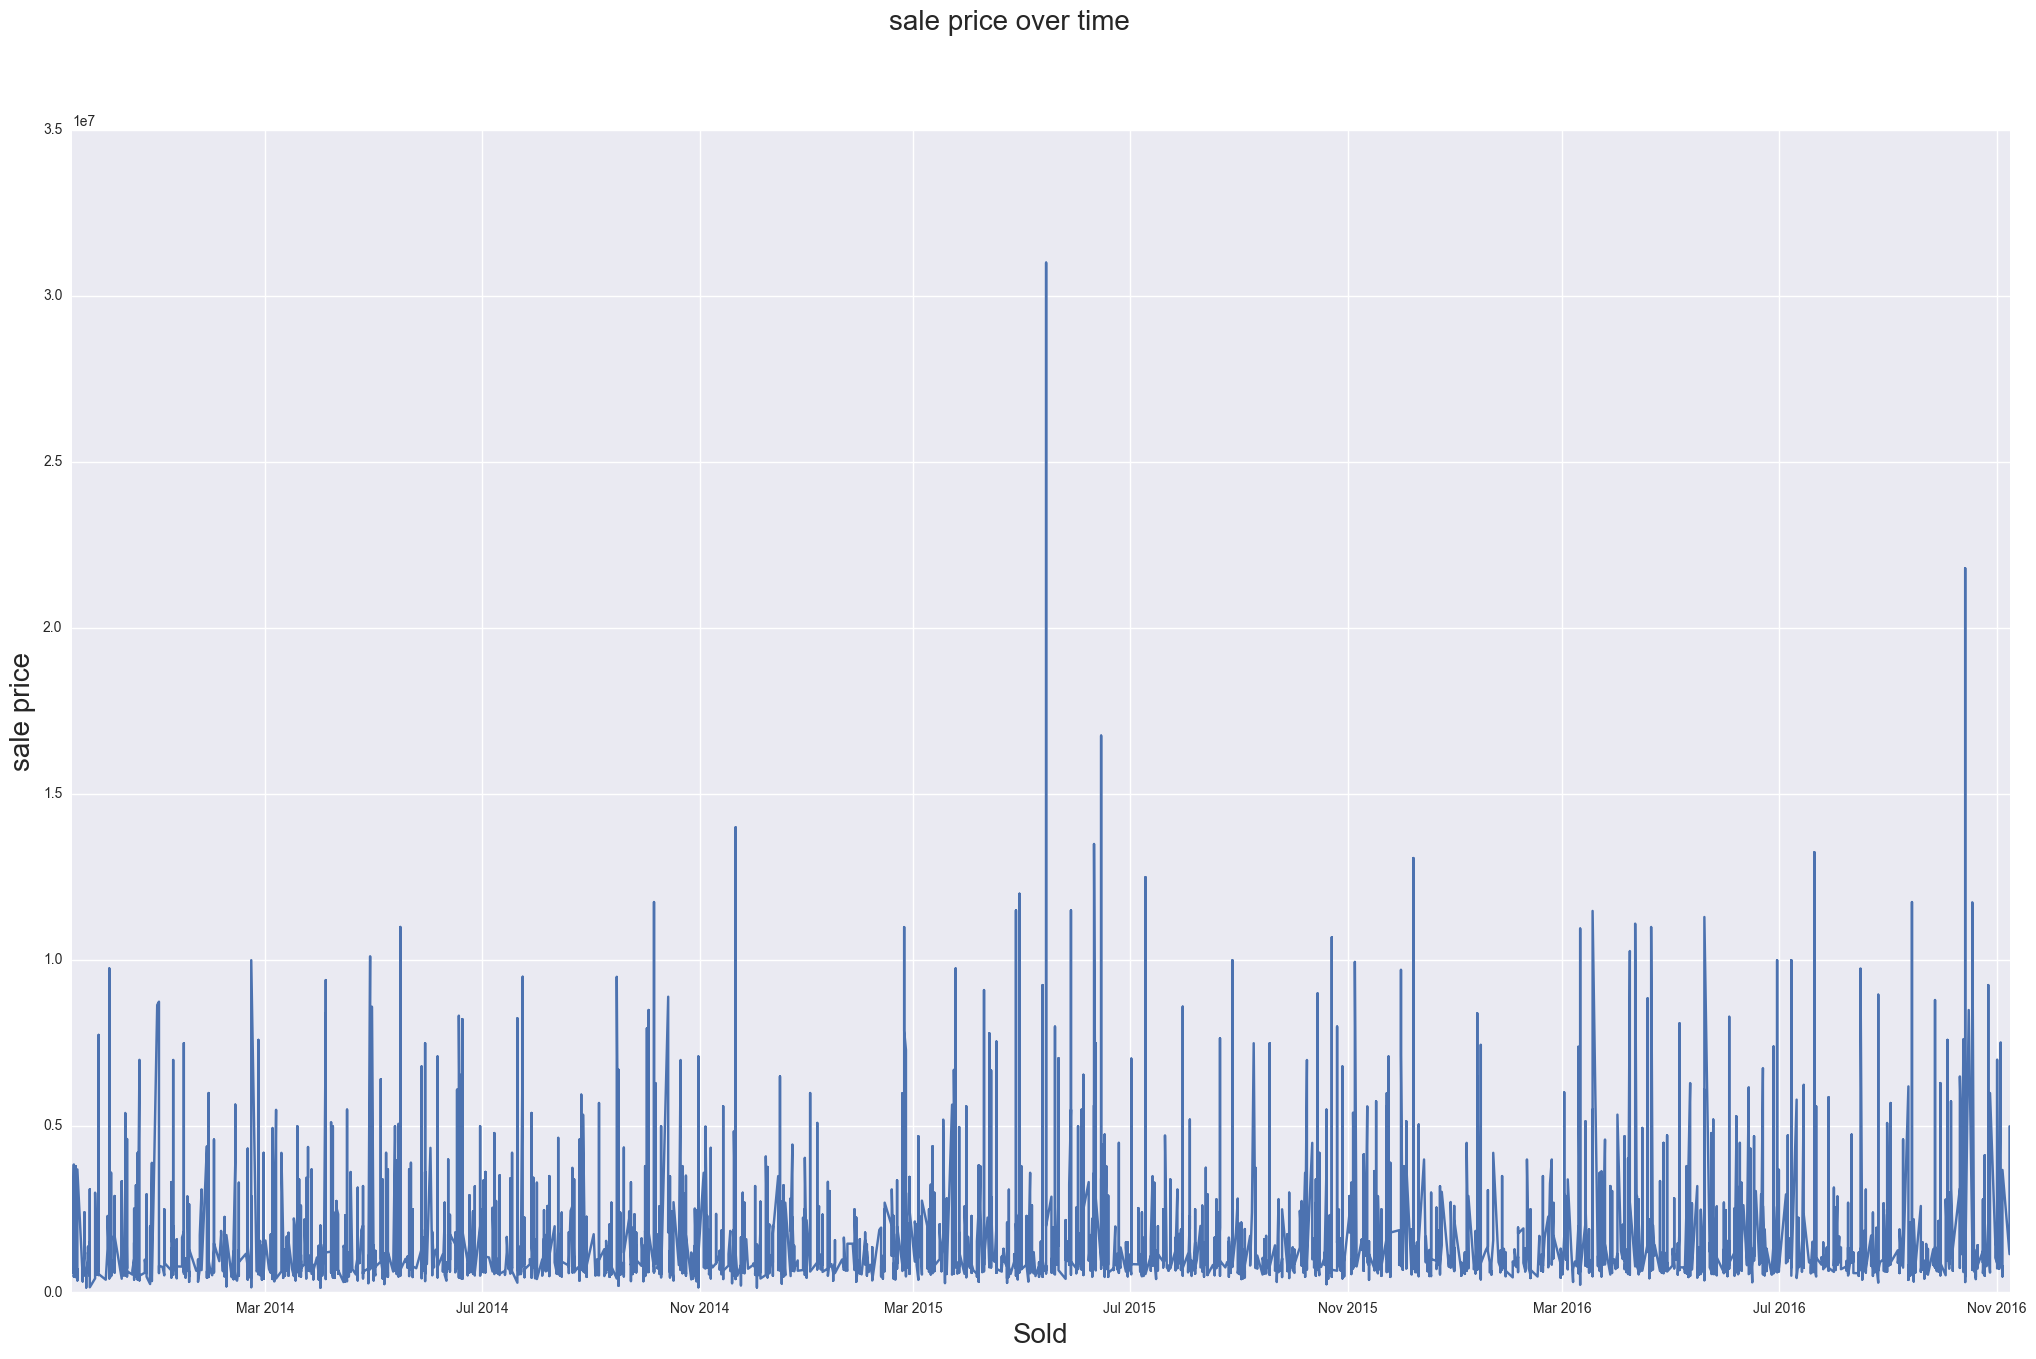

In [177]:
fig = plt.figure(figsize=(25,15))
plt.plot(df.sort_values('sold').sold, df.sort_values('sold').sale_price)
fig.suptitle('sale price over time', fontsize=20)
plt.xlabel('Sold', fontsize=20)
plt.ylabel('sale price', fontsize=20)
plt.show()


In [178]:
sp_log = np.log10(df.sort_values('sold').sale_price)

In [179]:
sp_log.head(3)

1620    6.053078
3774    5.774517
3697    5.785330
Name: sale_price, dtype: float64

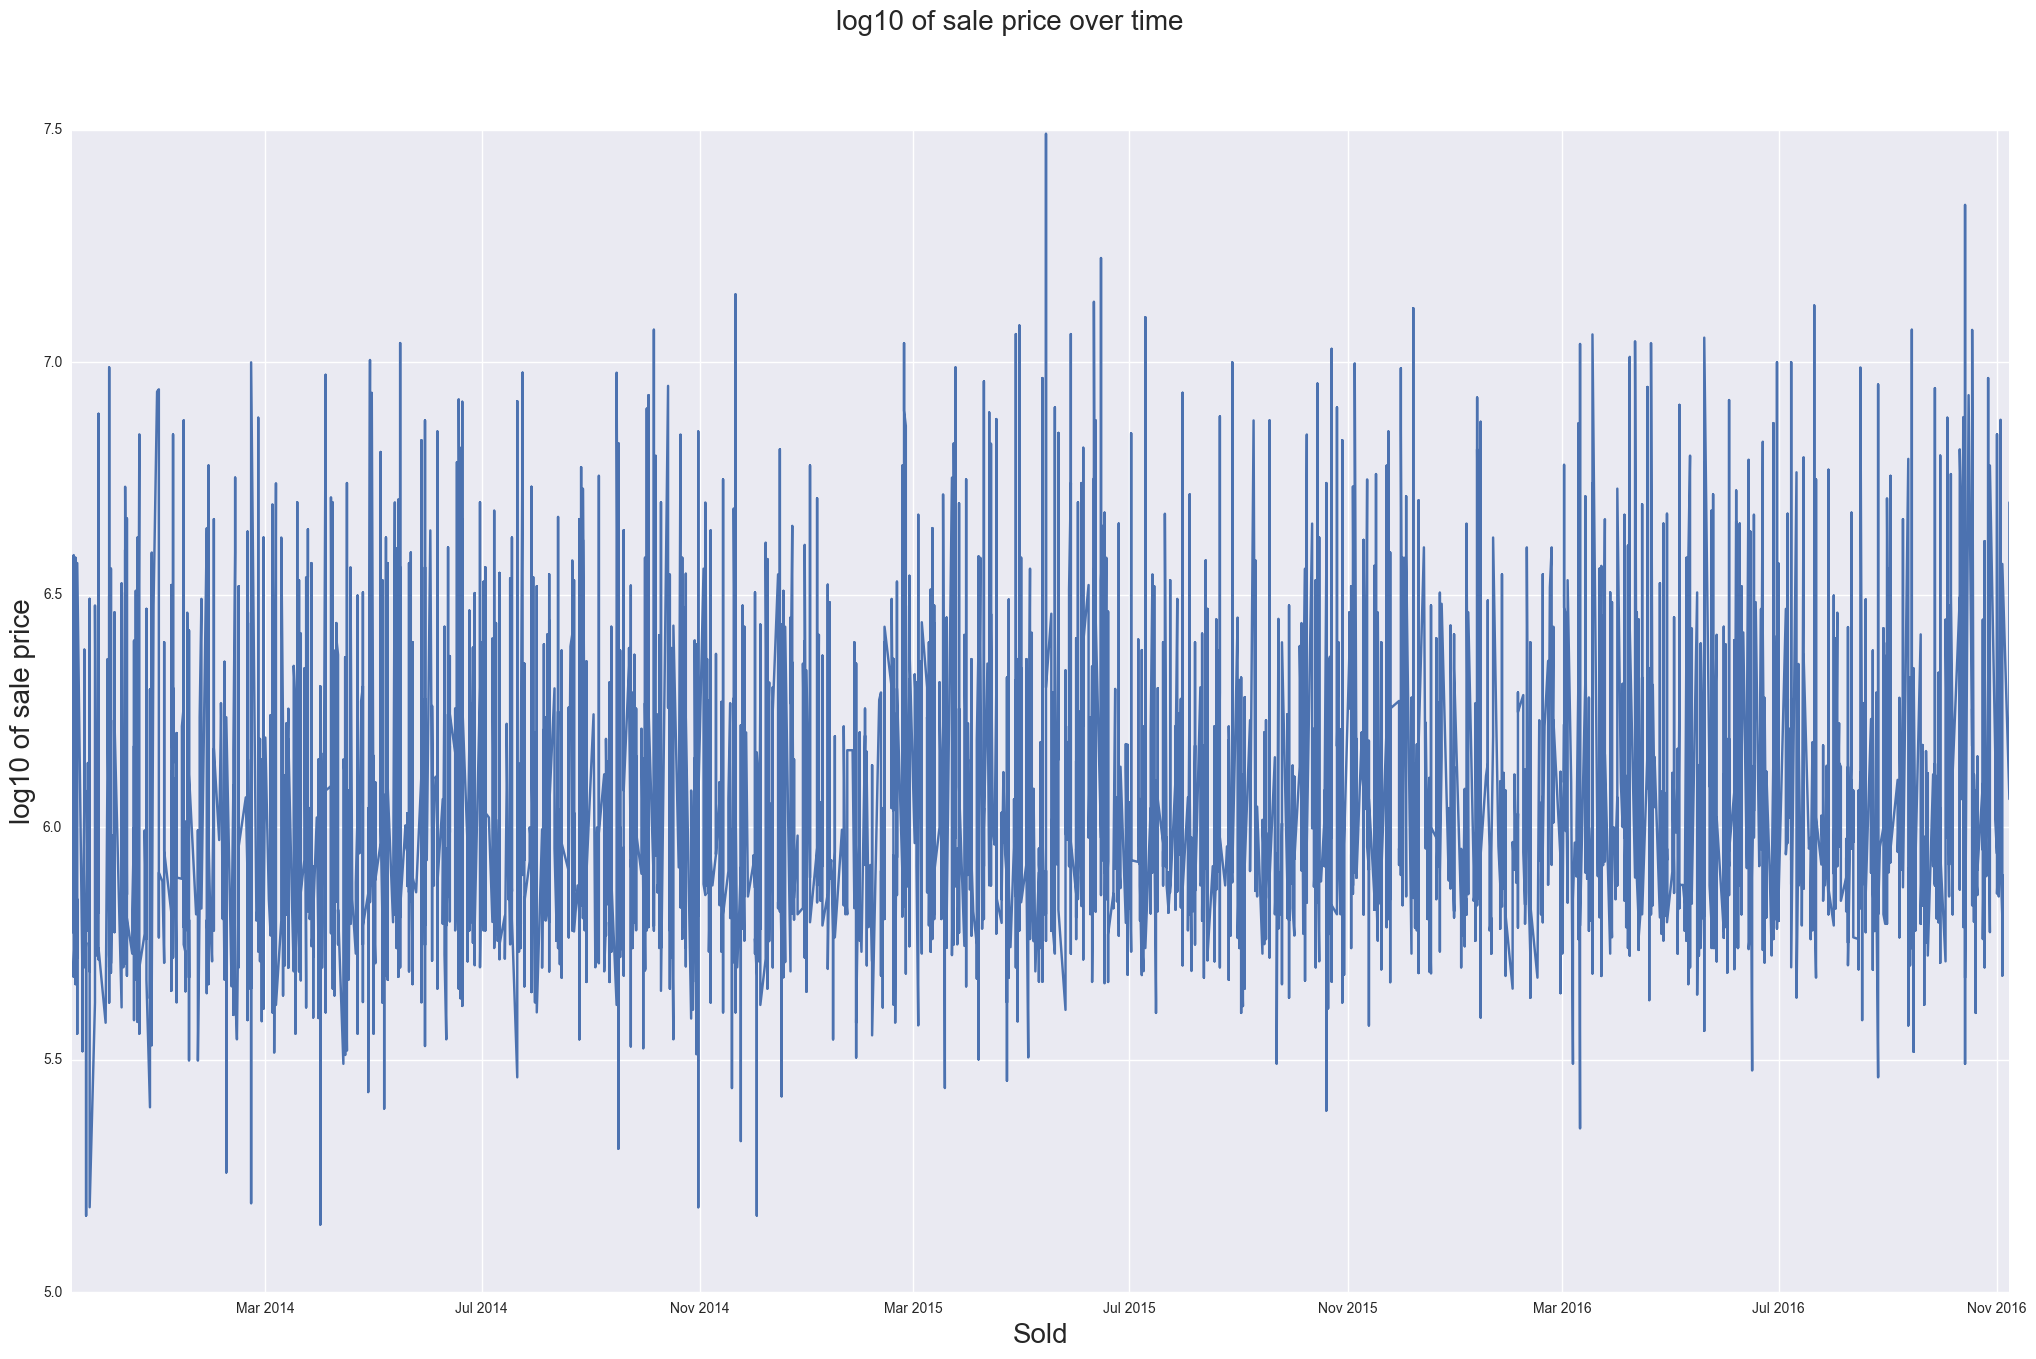

In [180]:
fig = plt.figure(figsize=(25,15))
plt.plot(df.sort_values('sold').sold, sp_log)
fig.suptitle('log10 of sale price over time', fontsize=20)
plt.xlabel('Sold', fontsize=20)
plt.ylabel('log10 of sale price', fontsize=20)
plt.show()

In [181]:
format = lambda x: x.year
df.sold_year = df.sold.map(format)
df['sold_year'] = pd.Series(df.sold_year, index=df.index)

In [182]:
df.sold_year.head(3)

0    2015
1    2016
2    2015
Name: sold, dtype: int64

In [183]:
format2 = lambda x: x.month
df.sold_month = df.sold.map(format2)
df['sold_month'] = pd.Series(df.sold_month, index=df.index)

In [184]:
df.sold_month.head(3)

0     5
1    10
2     6
Name: sold, dtype: int64

In [185]:
df.head(3)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
0,2701 Broadway St,Pacific Heights,7,7.00,2,16400,1890.243902,2015-05-15,0.0,100,39000000,31000000,79.487179,1,0,7,2015,5
1,2250 Vallejo,Pacific Heights,7,7.00,2,9095,2396.921385,2016-10-14,0.0,213,28000000,21800000,77.857143,1,0,7,2016,10
2,2950 Vallejo St,Pacific Heights,8,5.75,2,6244,2684.176810,2015-06-15,0.0,0,16995000,16760000,98.617240,1,0,7,2015,6


In [186]:
print '\nmodel with year month columns, no log10: \n'
model_y_m = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no + sold_year + sold_month', data=df)
linreg_no_log = model_y_m.fit()
print linreg_no_log.summary()


model with year month columns, no log10: 

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     5900.
Date:                Mon, 28 Nov 2016   Prob (F-statistic):               0.00
Time:                        01:57:41   Log-Likelihood:                -59963.
No. Observations:                4339   AIC:                         1.200e+05
Df Residuals:                    4305   BIC:                         1.202e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------

In [187]:
df_sold = df.sort_values('sold')
df_sold = df_sold.set_index('sold')

In [188]:
df_sold.head(3)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2013-11-12,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,565.00,38,1195000,1130000,94.560669,0,1,8,2013,11
2013-11-12,946 Stockton St #14A,Financial District,2,1.5,0,744,799.731183,556.00,8,500000,595000,119.000000,0,1,8,2013,11
2013-11-12,930 Pine #211,Downtown,1,1.0,1,700,871.428571,511.14,35,599000,610000,101.836394,0,1,8,2013,11


In [189]:
df_sold.index[0:20]

DatetimeIndex(['2013-11-12', '2013-11-12', '2013-11-12', '2013-11-13',
               '2013-11-13', '2013-11-13', '2013-11-13', '2013-11-13',
               '2013-11-13', '2013-11-13', '2013-11-13', '2013-11-13',
               '2013-11-13', '2013-11-13', '2013-11-13', '2013-11-14',
               '2013-11-14', '2013-11-14', '2013-11-14', '2013-11-14'],
              dtype='datetime64[ns]', name=u'sold', freq=None)

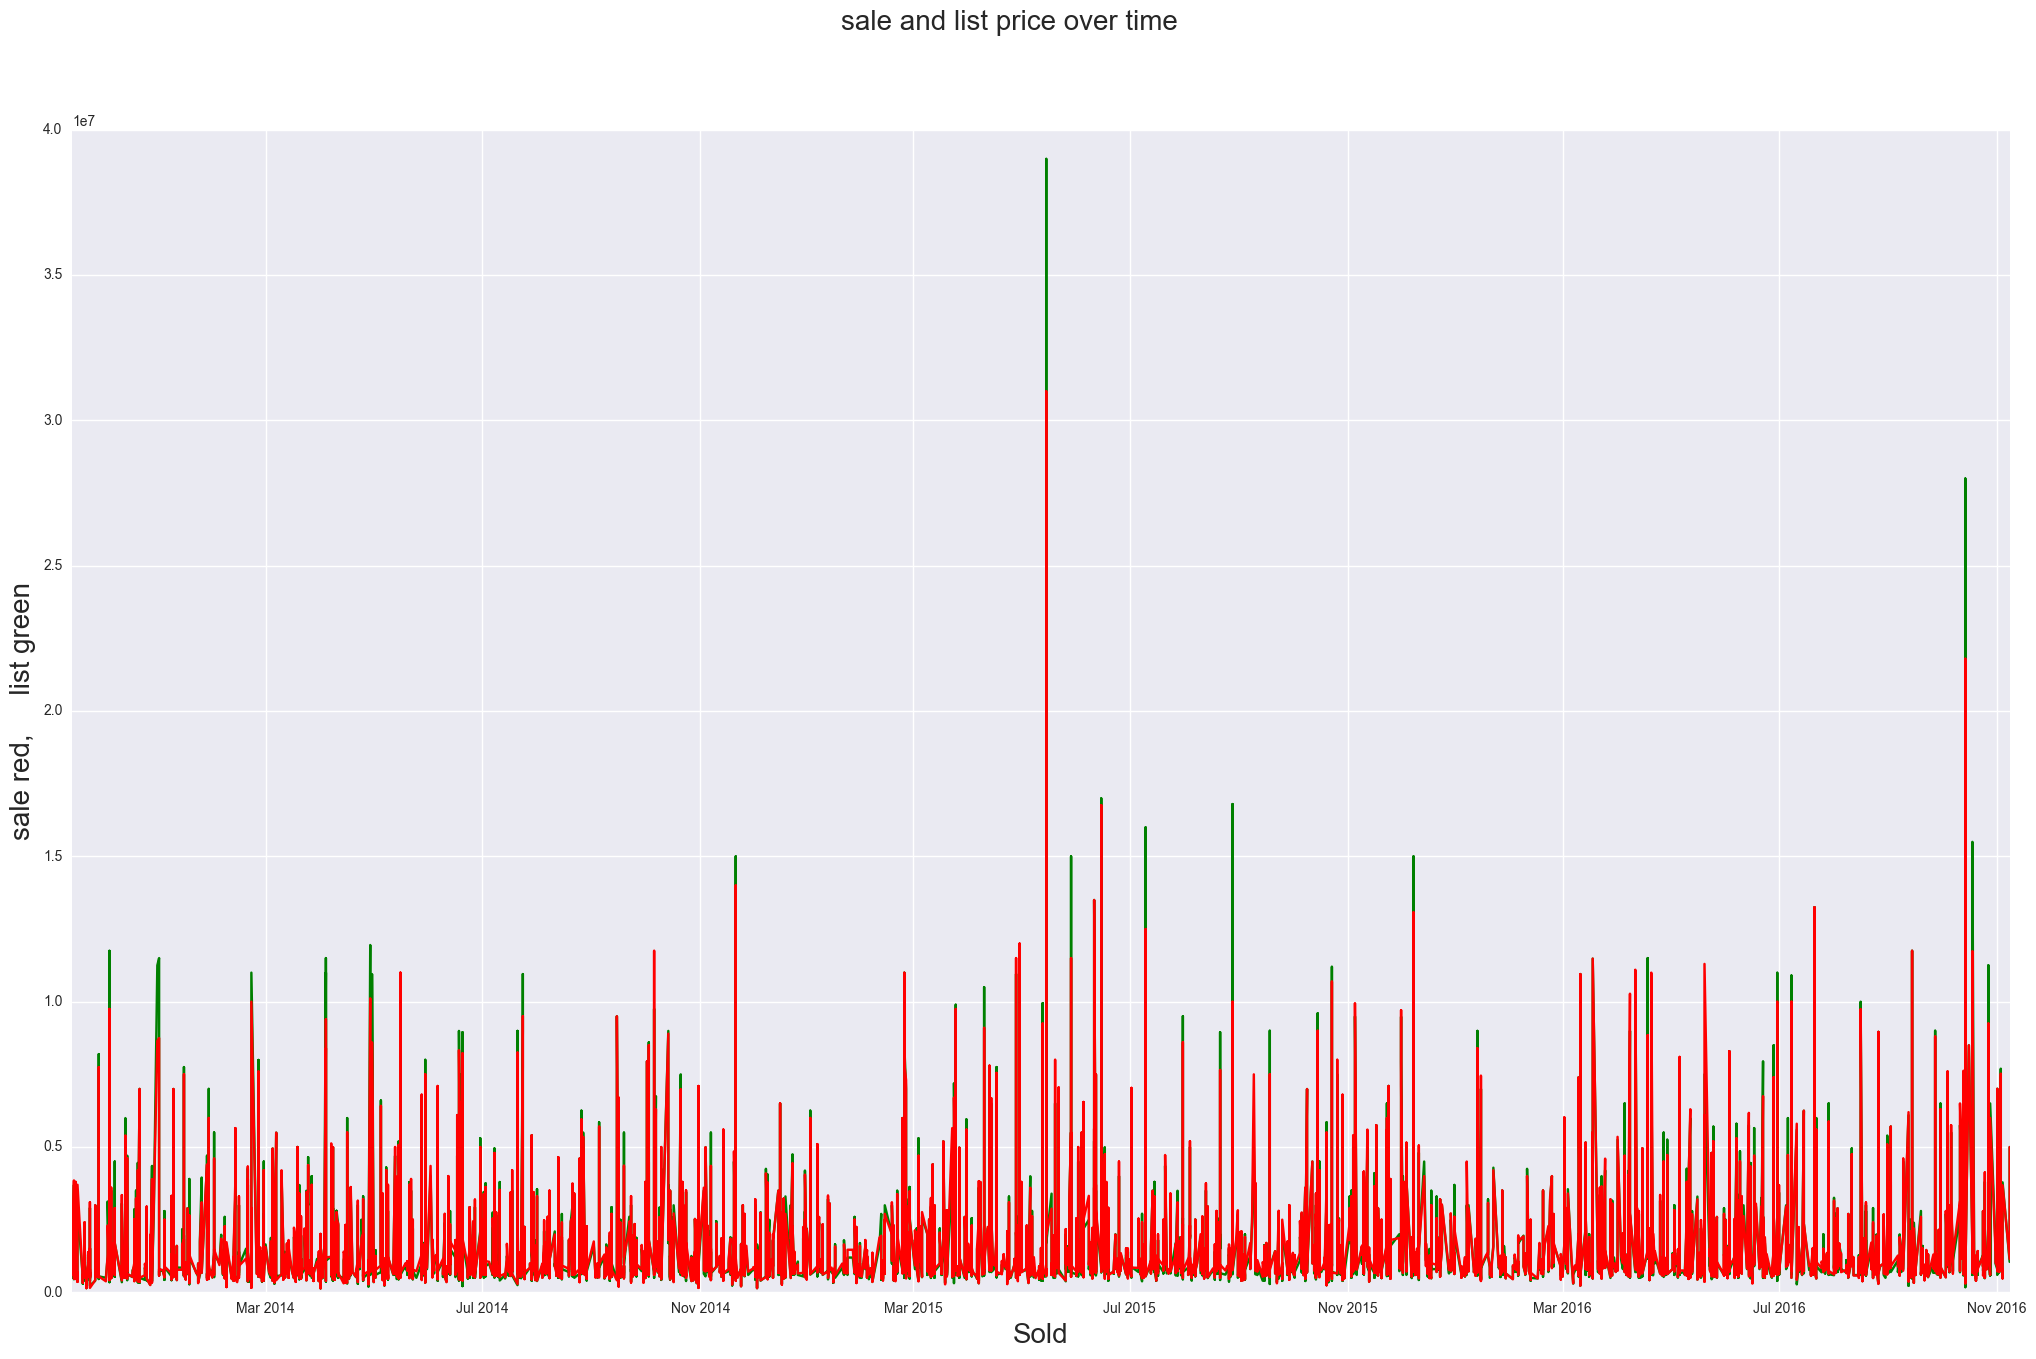

In [190]:

fig = plt.figure(figsize=(25,15))
plt.plot(df_sold[['list_price']], color = 'green')
plt.plot(df_sold[['sale_price']], color = 'red')
plt.xlabel('Sold', fontsize=20)
fig.suptitle('sale and list price over time', fontsize=20)
plt.ylabel('sale red,     list green', fontsize=20)
plt.show()

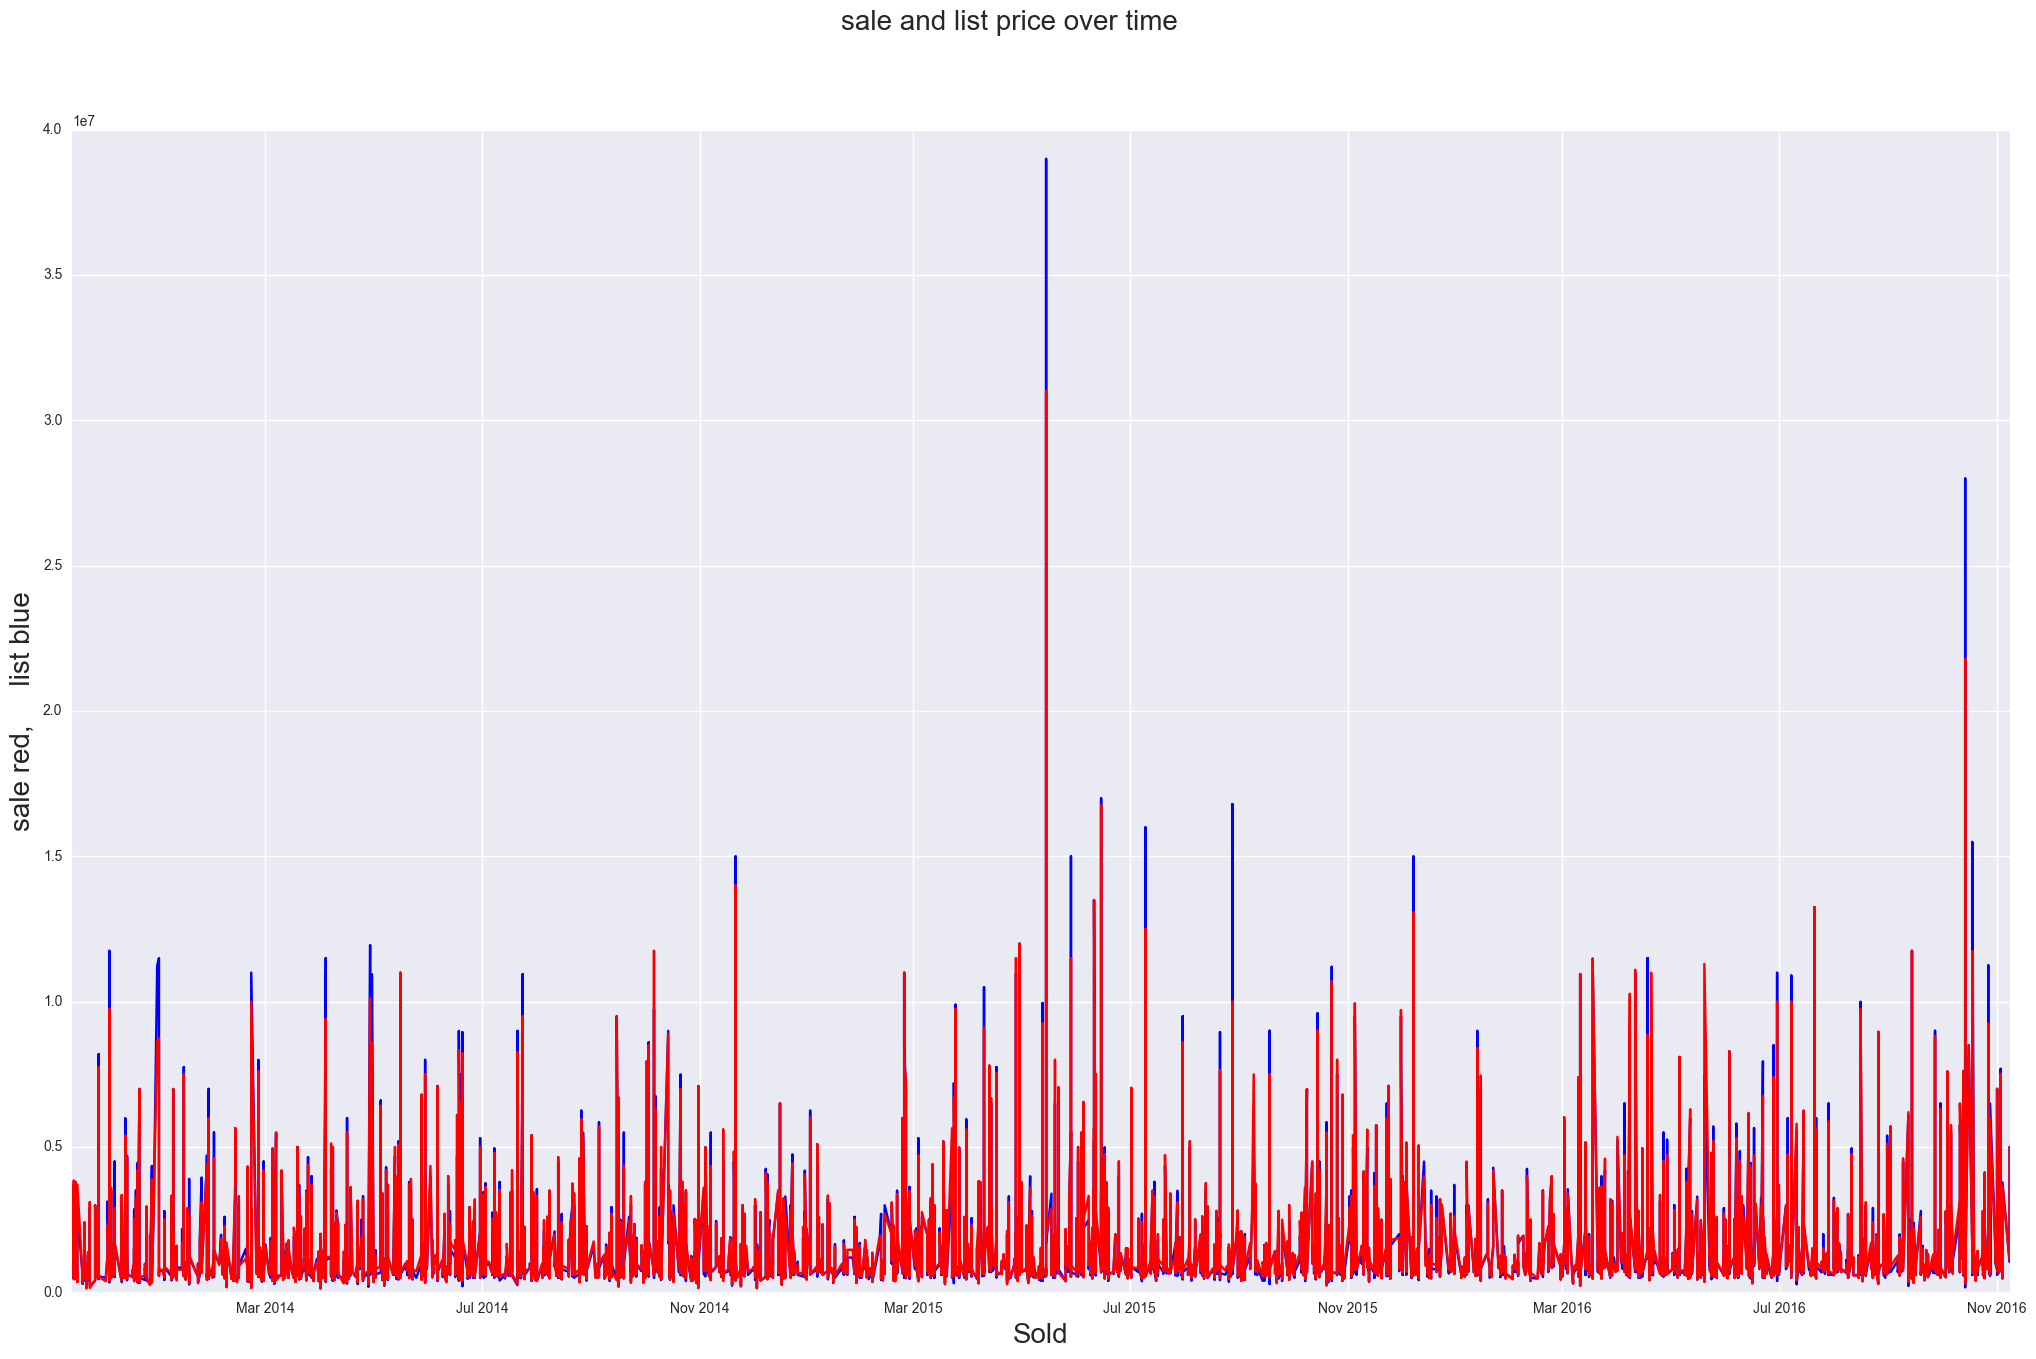

In [191]:
fig = plt.figure(figsize=(25,15))
plt.plot(df_sold[['list_price']], color = 'blue')
plt.plot(df_sold[['sale_price']], color = 'red')
plt.xlabel('Sold', fontsize=20)
fig.suptitle('sale and list price over time', fontsize=20)
plt.ylabel('sale red,     list blue', fontsize=20)
plt.show()

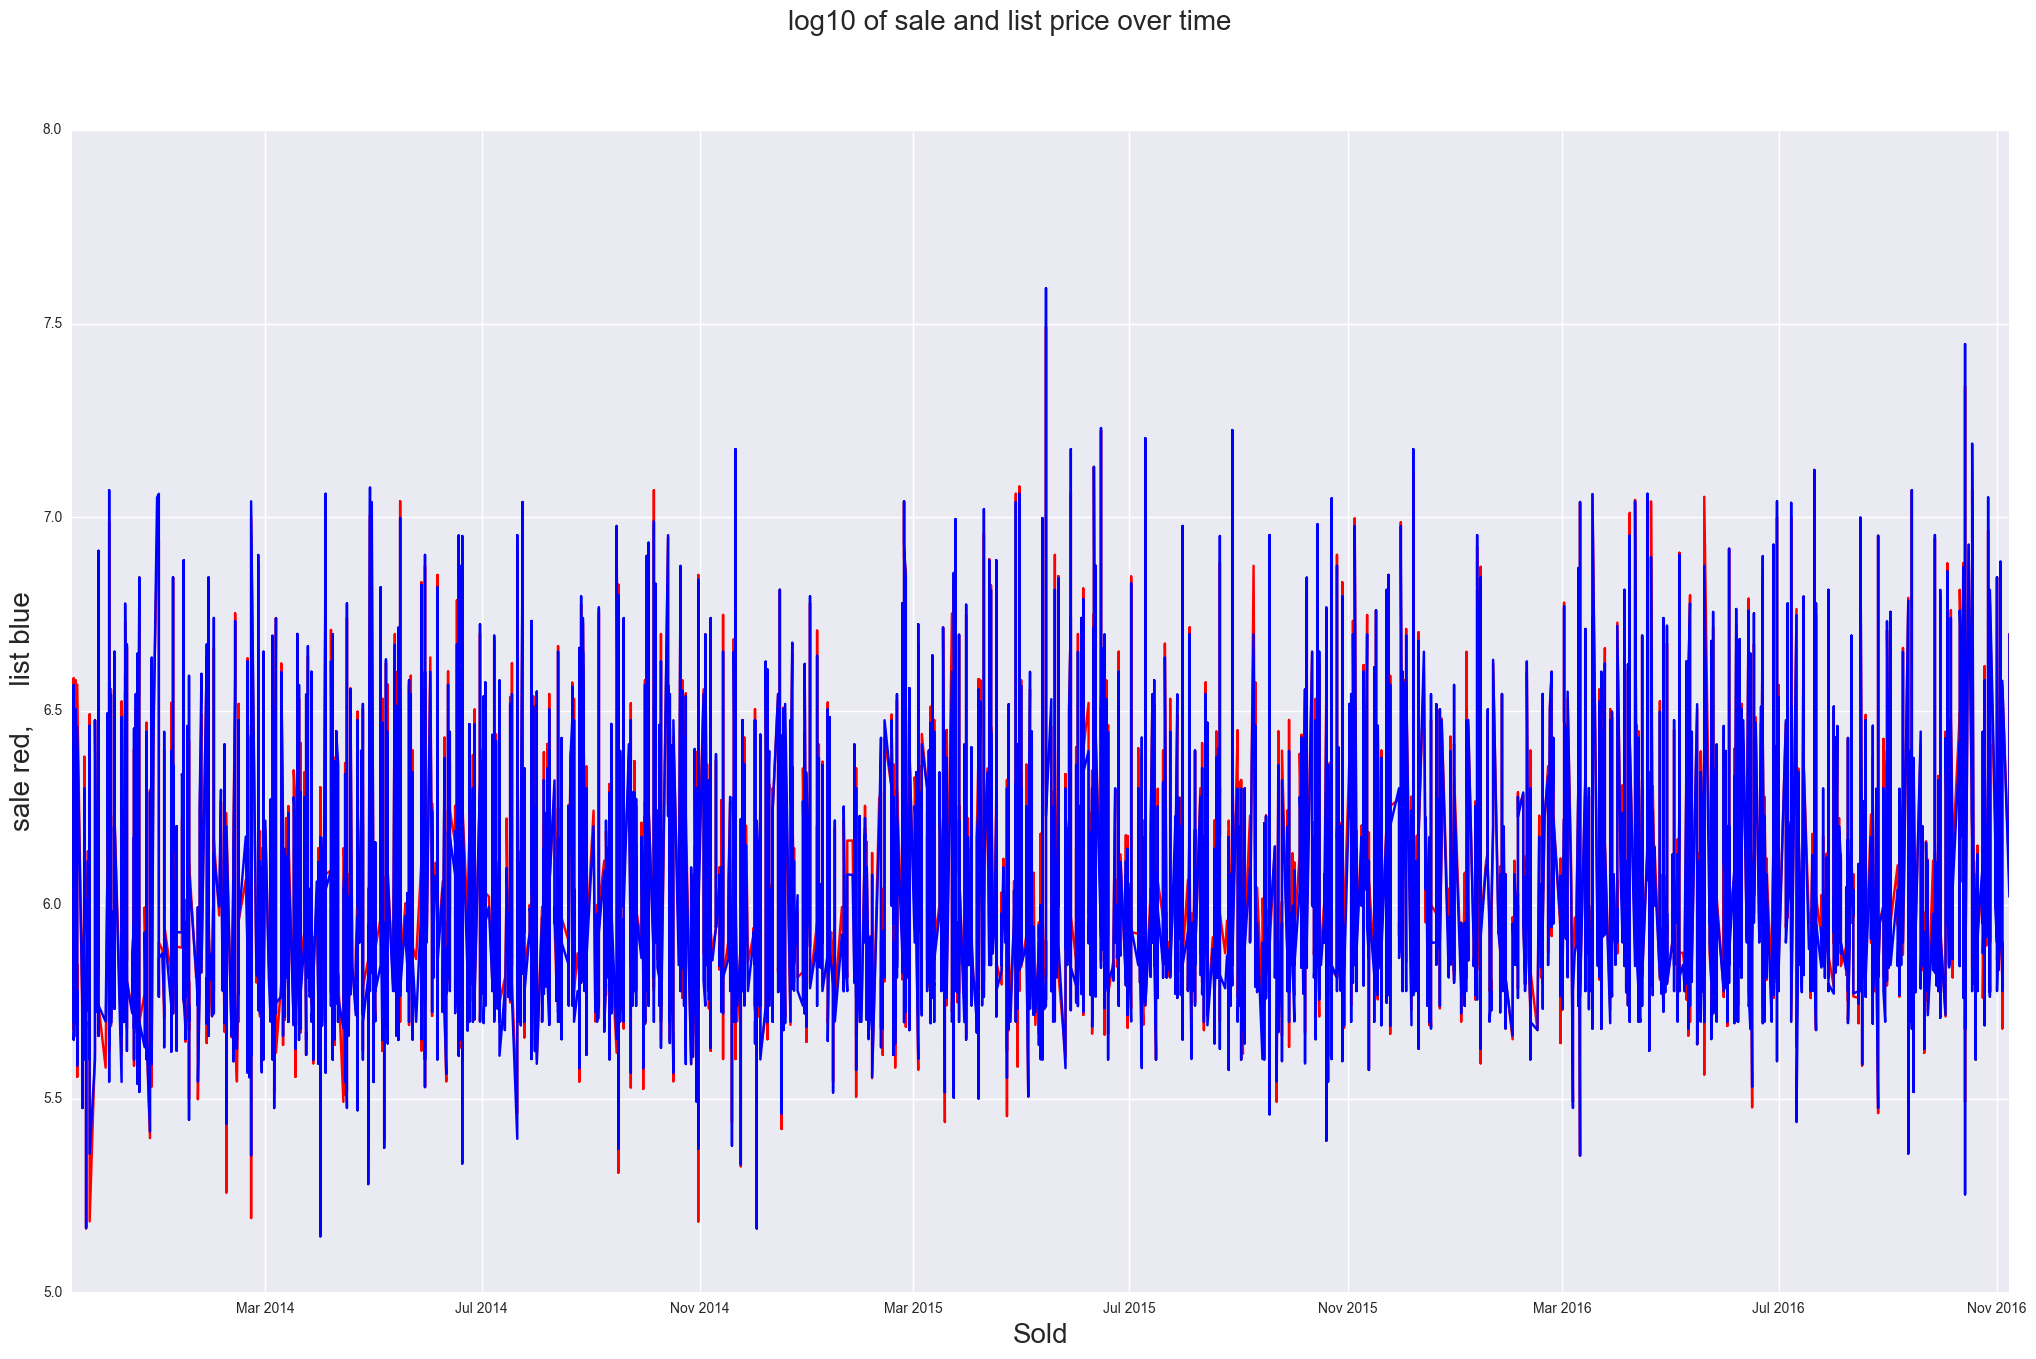

In [192]:
fig = plt.figure(figsize=(25,15))
plt.plot(np.log10(df_sold.sale_price), color='red')
plt.plot(np.log10(df_sold.list_price), color = 'blue')
plt.xlabel('Sold', fontsize=20)
fig.suptitle('log10 of sale and list price over time', fontsize=20)
plt.ylabel('sale red,     list blue', fontsize=20)
plt.show()

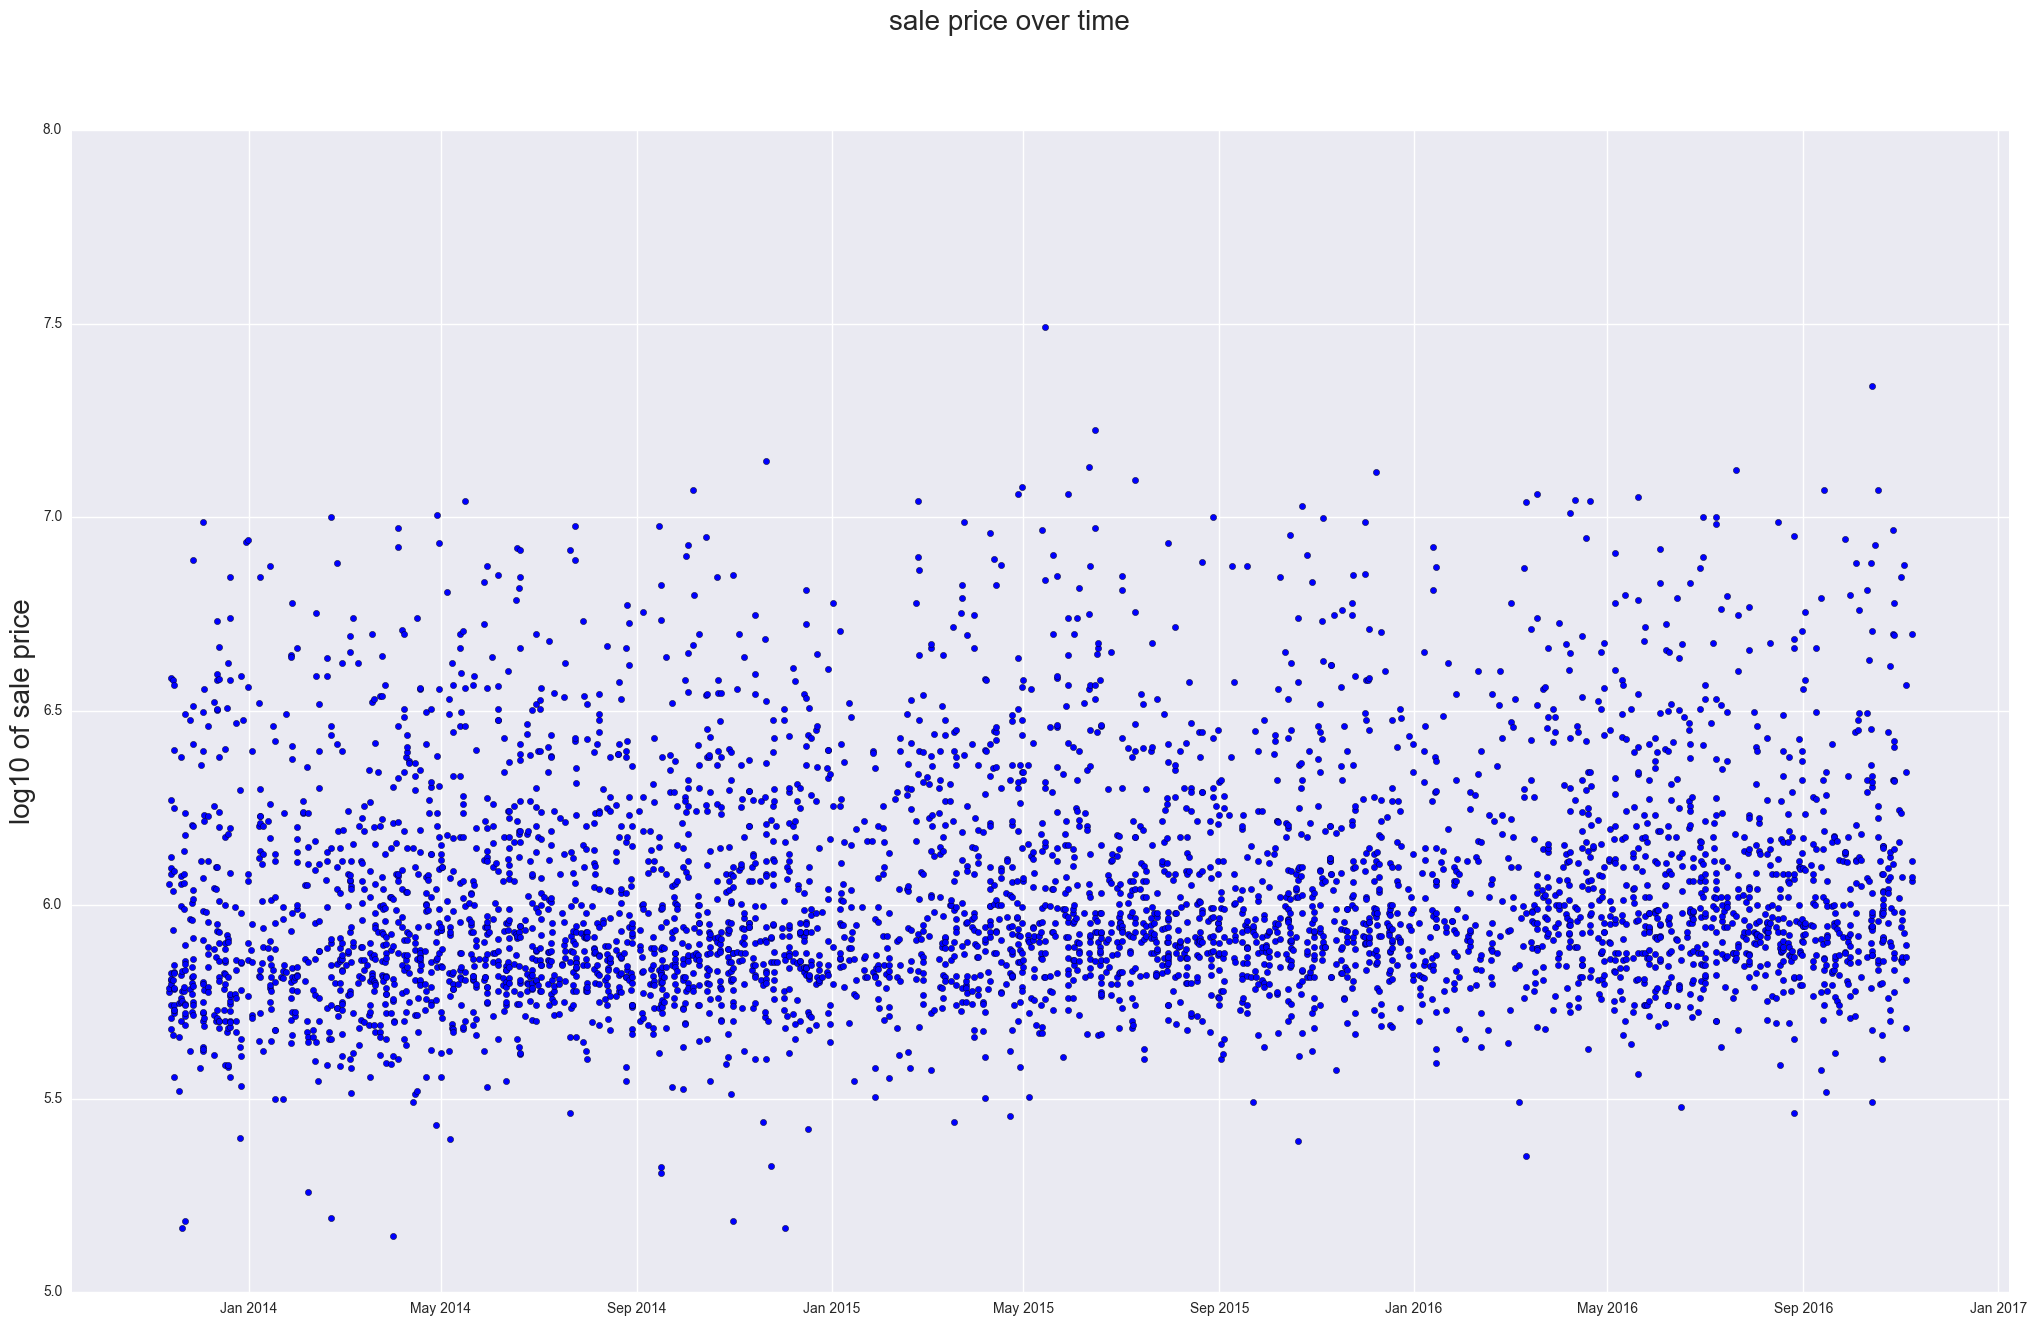

In [193]:
fig = plt.figure(figsize=(25,15))
plt.scatter(df_sold.index, np.log10(df_sold.sale_price))
fig.suptitle('sale price over time', fontsize=20)
plt.ylabel('log10 of sale price', fontsize=20)
plt.show()

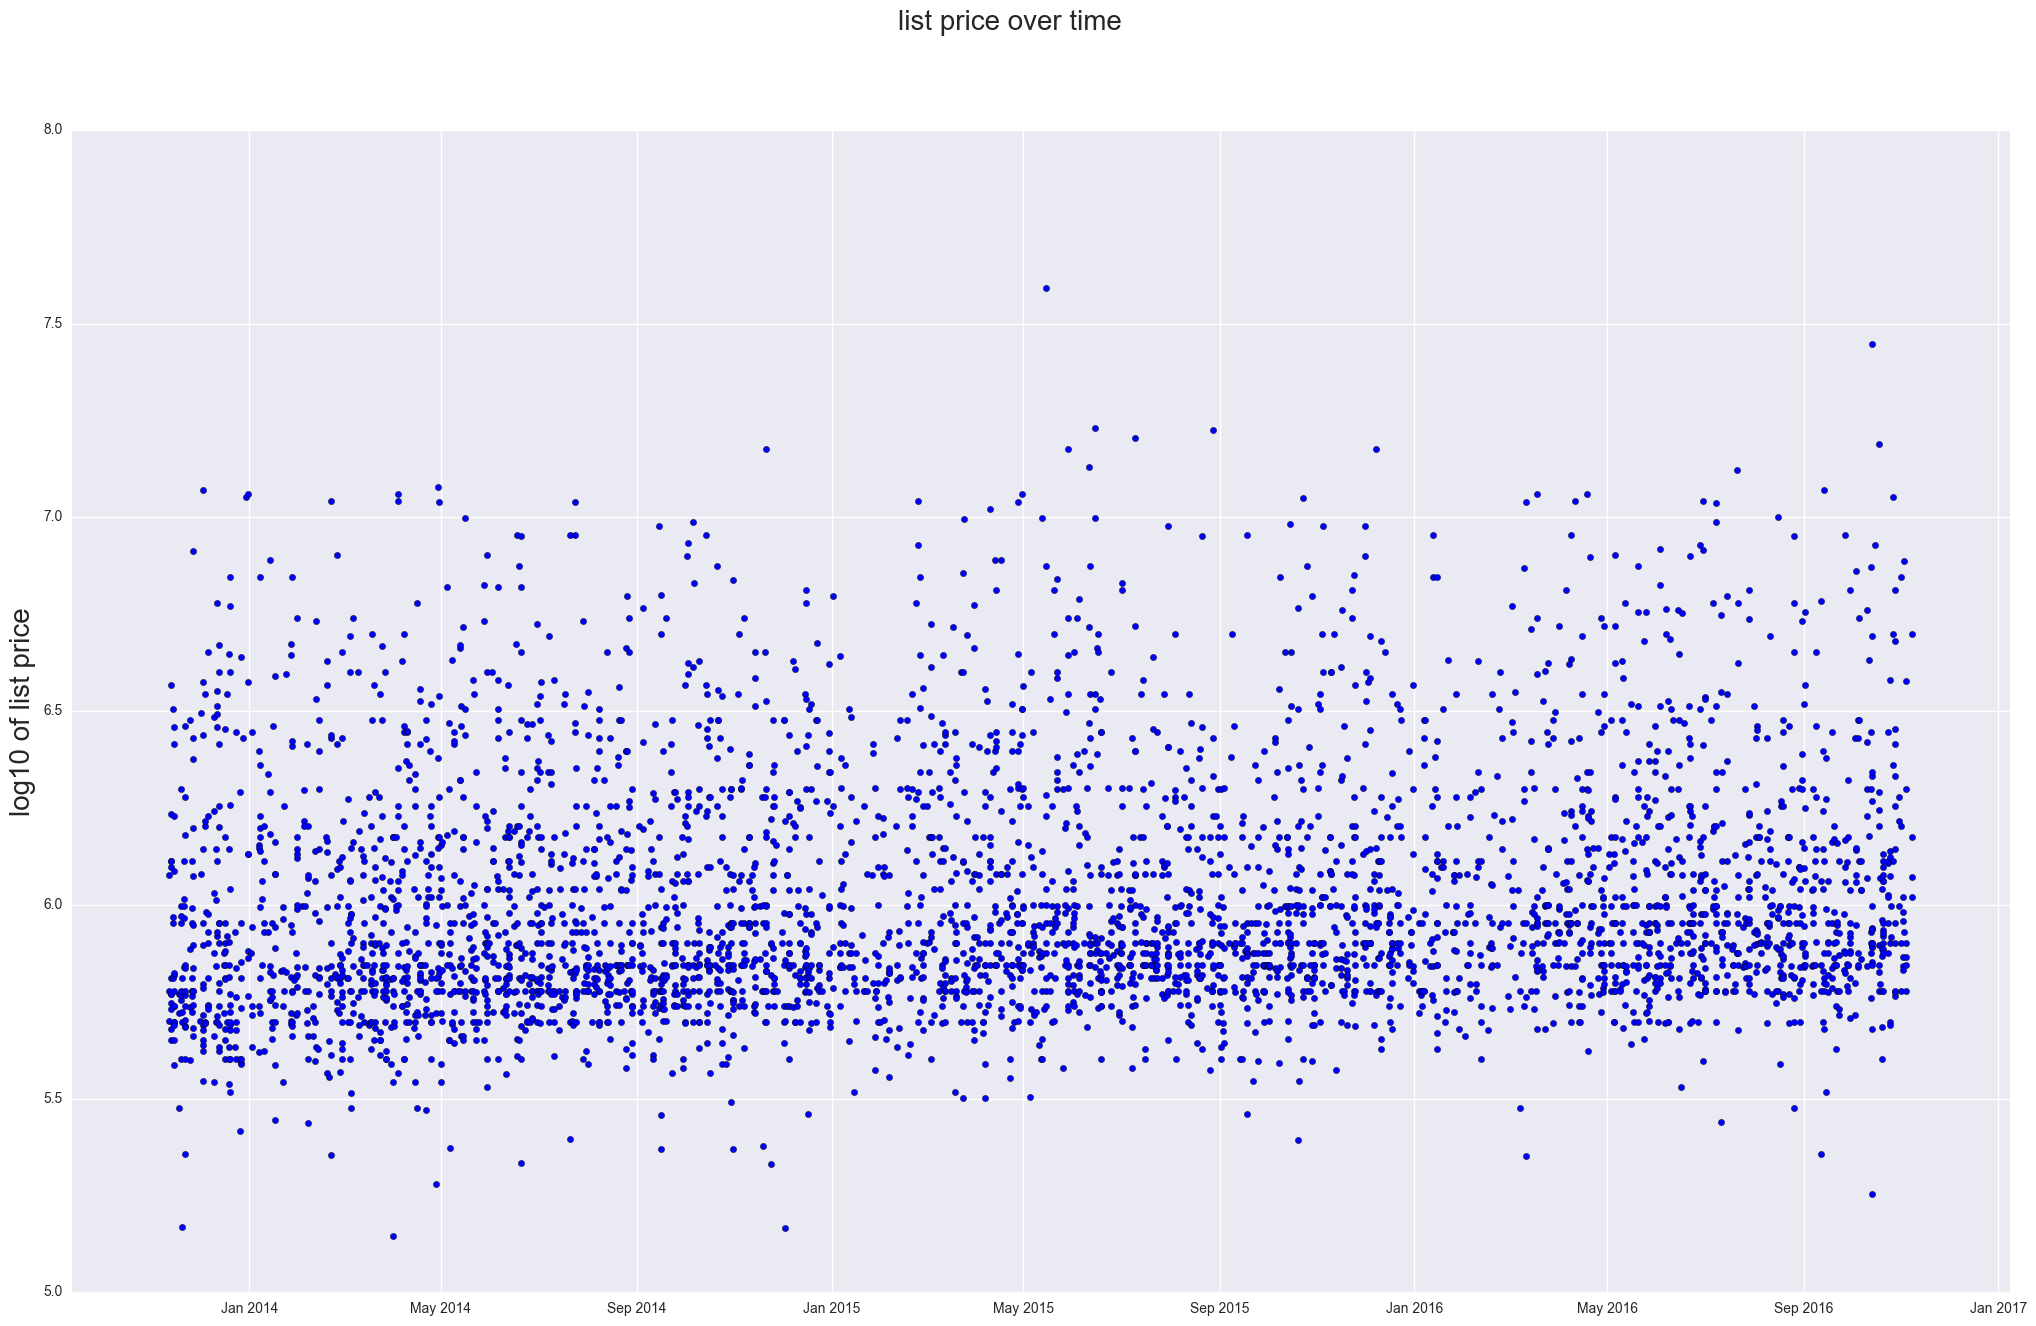

In [194]:
fig = plt.figure(figsize=(25,15))
plt.scatter(df_sold.index, np.log10(df_sold.list_price))
fig.suptitle('list price over time', fontsize=20)
plt.ylabel('log10 of list price', fontsize=20)
plt.show()

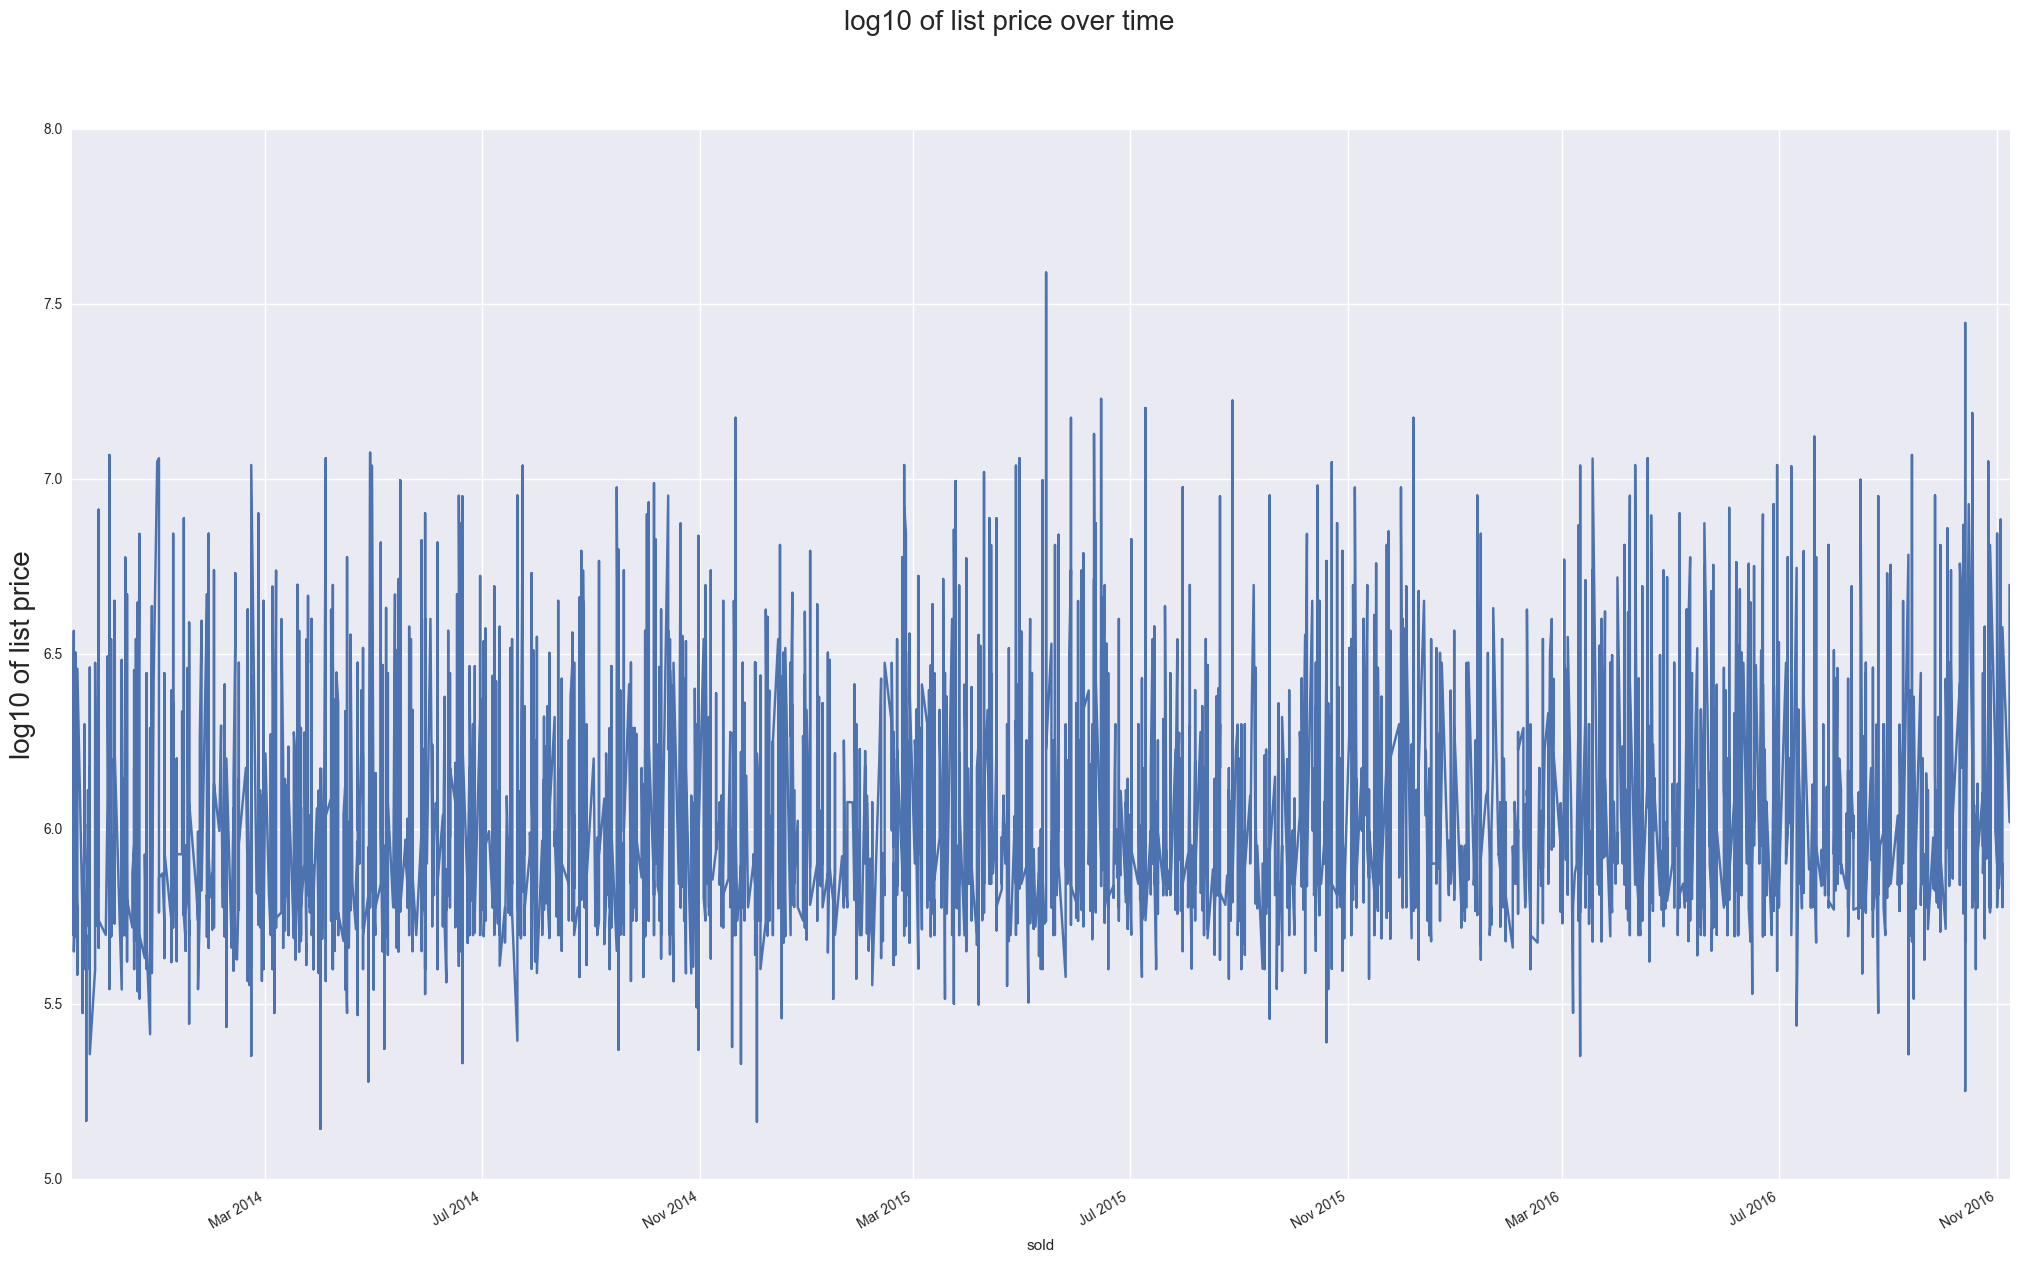

In [195]:
fig = plt.figure(figsize=(25,15))
np.log10(df_sold.list_price).plot()
fig.suptitle('log10 of list price over time', fontsize=20)
plt.ylabel('log10 of list price', fontsize=20)
plt.show()

In [196]:
model_sold_list = smf.ols(formula='np.log10(sale_price) ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + np.log10(list_price) + single_f_h + condo + dist_no + sold_year + sold_month', data=df_sold)
linreg3 = model_sold_list.fit()
print '\nmodel with log10 list price: ', linreg3.summary()



model with log10 list price:                               OLS Regression Results                             
Dep. Variable:     np.log10(sale_price)   R-squared:                       0.980
Model:                              OLS   Adj. R-squared:                  0.980
Method:                   Least Squares   F-statistic:                     6299.
Date:                  Mon, 28 Nov 2016   Prob (F-statistic):               0.00
Time:                          01:58:20   Log-Likelihood:                 7568.8
No. Observations:                  4339   AIC:                        -1.507e+04
Df Residuals:                      4305   BIC:                        -1.485e+04
Df Model:                            33                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------

In [197]:
model_sold_no_list= smf.ols(formula='np.log10(sale_price) ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + single_f_h + condo + dist_no + sold_year + sold_month', data=df_sold)
linreg4 = model_sold_no_list.fit()
print '\nmodel without list price: ', linreg4.summary()


model without list price:                               OLS Regression Results                             
Dep. Variable:     np.log10(sale_price)   R-squared:                       0.858
Model:                              OLS   Adj. R-squared:                  0.856
Method:                   Least Squares   F-statistic:                     810.1
Date:                  Mon, 28 Nov 2016   Prob (F-statistic):               0.00
Time:                          01:58:27   Log-Likelihood:                 3340.7
No. Observations:                  4339   AIC:                            -6615.
Df Residuals:                      4306   BIC:                            -6405.
Df Model:                            32                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

In [198]:
print linreg4.fittedvalues[4000:4031]

sold
2016-08-16    6.076725
2016-08-16    5.832863
2016-08-16    5.797175
2016-08-16    6.121360
2016-08-16    6.789407
2016-08-17    6.118716
2016-08-17    5.969873
2016-08-17    5.804895
2016-08-17    6.043624
2016-08-17    5.552061
2016-08-17    5.810634
2016-08-18    5.933694
2016-08-18    6.261910
2016-08-18    5.983631
2016-08-18    6.191124
2016-08-19    6.177897
2016-08-19    5.721197
2016-08-19    5.882037
2016-08-19    5.832333
2016-08-19    5.871756
2016-08-19    6.263388
2016-08-19    6.315339
2016-08-19    6.169405
2016-08-19    5.856410
2016-08-19    6.391274
2016-08-19    6.057712
2016-08-19    5.998529
2016-08-19    5.907762
2016-08-22    6.167572
2016-08-22    6.143602
2016-08-22    5.858712
dtype: float64


In [199]:
print 'Date        Sale price  Pred. with list p    W/o list p     W and W/o diff'
for i in xrange(30):
    print df_sold.index[4000+i].date(), '    ', df_sold.sale_price[4000+i], '    ', np.around(np.power(10, linreg3.fittedvalues[4000+i]), decimals = 2), '     ', np.around(np.power(10, linreg4.fittedvalues[4000+i]), decimals = 2), '    ',np.around(np.power(10,linreg3.fittedvalues[4000+i])-np.power(10,linreg4.fittedvalues[4000+i]), decimals = 2)

Date        Sale price  Pred. with list p    W/o list p     W and W/o diff
2016-08-16      917500      1025959.83       1193233.28      -167273.44
2016-08-16      850000      834018.92       680554.19      153464.73
2016-08-16      670000      653762.02       626866.74      26895.29
2016-08-16      980000      1040460.76       1322391.78      -281931.02
2016-08-16      9750000      9770958.09       6157536.68      3613421.42
2016-08-17      1100000      1065411.54       1314364.55      -248953.01
2016-08-17      1050000      1136881.33       932981.43      203899.9
2016-08-17      775000      806083.35       638109.24      167974.12
2016-08-17      699000      802734.47       1105665.1      -302930.62
2016-08-17      385000      366568.29       356501.1      10067.19
2016-08-17      790000      726309.25       646598.11      79711.14
2016-08-18      755000      726028.55       858409.46      -132380.9
2016-08-18      1850000      1846804.93       1827720.88      19084.05
2016-08-18    

In [200]:
df_district = pd.get_dummies(df_sold.district)
df_sold_dum = pd.concat( [df_sold, df_district], axis=1)

In [201]:
df_sold_dum.head(1)


,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,565.0,38,1195000,...,0,0,0,0,0,0,0,0,0,0


In [202]:
df_sold_dum.pop('district')
df_sold_dum.pop('address')

sold
2013-11-12            20 Vandewater St
2013-11-12        946 Stockton St #14A
2013-11-12               930 Pine #211
2013-11-13             2921 Jackson St
2013-11-13           1299 Bush St #604
2013-11-13          3417 Divisadero St
2013-11-13               873 Meade Ave
2013-11-13      2466 Francisco St #102
2013-11-13     2211 California St #407
2013-11-13             2469 Vallejo St
2013-11-13               779 Sweeny St
2013-11-13    1626 North Point St #202
2013-11-13         2821 Buchanan St #2
2013-11-13             2055 Thomas Ave
2013-11-13        950 Stockton St #201
2013-11-14               2 Robinson Dr
2013-11-14               129 Pixley St
2013-11-14        1177 California #225
2013-11-14            2813 Buchanan St
2013-11-14           2775 Greenwich St
2013-11-15             1418 Ingalls St
2013-11-15    1 Daniel Burnham Ct #216
2013-11-15         62-62 Bridgeview Dr
2013-11-15           1001 Pine St #312
2013-11-15                3228 Clay St
2013-11-15          

In [203]:
df_sold_dum.head(1)

,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,2,2.0,1,1456,776.098901,565.0,38,1195000,1130000,94.560669,...,0,0,0,0,0,0,0,0,0,0


In [204]:
y_sold = df_sold_dum.pop('sale_price')
#y_sold = np.log10(y_sold)

X_sold = df_sold_dum
X_sold.pop('dollar_sqft')
X_sold.pop('sale_to_list_ratio')

sold
2013-11-12     94.560669
2013-11-12    119.000000
2013-11-12    101.836394
2013-11-13    104.194858
2013-11-13    112.903226
2013-11-13     95.783252
2013-11-13     99.582463
2013-11-13     98.401387
2013-11-13    106.112054
2013-11-13    108.488372
2013-11-13    114.758497
2013-11-13     96.000000
2013-11-13    102.307692
2013-11-13    102.040816
2013-11-13    113.839286
2013-11-14     98.690293
2013-11-14    117.007535
2013-11-14     92.929293
2013-11-14    118.750000
2013-11-14     95.661846
2013-11-15    110.200364
2013-11-15    105.210421
2013-11-15    116.861436
2013-11-15     93.533703
2013-11-15    105.014749
2013-11-15    107.214429
2013-11-15    112.474438
2013-11-15    101.522843
2013-11-15    119.153675
2013-11-15    100.000000
                 ...    
2016-10-28    116.991643
2016-10-28     97.116279
2016-10-28    103.753910
2016-10-28    121.869783
2016-10-28     92.307692
2016-10-31     87.932080
2016-10-31     92.465753
2016-10-31    104.522613
2016-11-01    109.88

In [205]:
X_sold.head(3)

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,list_price,single_f_h,condo,dist_no,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,2,2.0,1,1456,565.00,38,1195000,0,1,8,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,1.5,0,744,556.00,8,500000,0,1,8,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,1,1.0,1,700,511.14,35,599000,0,1,8,...,0,0,0,0,0,0,0,0,0,0


In [206]:
y_sold.head(3)

sold
2013-11-12    1130000
2013-11-12     595000
2013-11-12     610000
Name: sale_price, dtype: int64

In [207]:
X_train = X_sold[:3500]
X_test = X_sold[3500:4000]
X_val = X_sold[4000:]

y_train = y_sold[:3500]
y_test = y_sold[3500:4000]
y_val = y_sold[4000:]


In [208]:
X_train.shape

(3500, 36)

In [209]:
y_train.shape

(3500,)

In [210]:
X_test.shape

(500, 36)

In [211]:
y_test.shape

(500,)

In [212]:
lr1 = linear_model.LinearRegression(normalize = True)
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [213]:
print 'lr1 no log10 Train Coefficients: \n', np.around(lr1.coef_, decimals = 4)

lr1 no log10 Train Coefficients: 
[  2.03919217e+04   4.90872730e+04   2.03304411e+04   7.00660000e+00
   1.88518000e+01  -2.05751970e+03   8.51200000e-01   2.55031253e+18
   2.55031253e+18  -1.01260409e+18   2.95200533e+04   3.57788200e+02
   5.92995450e+18   5.92995450e+18   5.92995450e+18   2.89214222e+18
   5.92995450e+18   3.90474632e+18   5.92995450e+18   3.90474632e+18
   5.92995450e+18   5.92995450e+18   2.89214222e+18   5.92995450e+18
   3.90474632e+18   3.90474632e+18   3.90474632e+18   5.92995450e+18
   2.89214222e+18   5.92995450e+18   2.89214222e+18   3.90474632e+18
   5.92995450e+18   3.90474632e+18   3.90474632e+18   5.92995450e+18]


In [214]:
len(lr1.coef_)

36

In [215]:
for i in range(len(lr1.coef_)):
    print np.round(lr1.coef_[i], 4)


20391.9217
49087.273
20330.4411
7.0066
18.8518
-2057.5197
0.8512
2.55031252625e+18
2.55031252625e+18
-1.01260409376e+18
29520.0533
357.7882
5.92995450329e+18
5.92995450329e+18
5.92995450329e+18
2.89214222201e+18
5.92995450329e+18
3.90474631577e+18
5.92995450329e+18
3.90474631577e+18
5.92995450329e+18
5.92995450329e+18
2.89214222201e+18
5.92995450329e+18
3.90474631577e+18
3.90474631577e+18
3.90474631577e+18
5.92995450329e+18
2.89214222201e+18
5.92995450329e+18
2.89214222201e+18
3.90474631577e+18
5.92995450329e+18
3.90474631577e+18
3.90474631577e+18
5.92995450329e+18


In [216]:
print('lr1 no log10 Train Variance score: %.2f' % lr1.score(X_train, y_train))

lr1 no log10 Train Variance score: 0.98


In [217]:
predicted_t1 = cross_val_predict(lr1, X_train, y_train, cv=10)

In [218]:
predicted_t1[0:20]

array([ 1194496.,   626176.,   601216.,  3871616.,   617600.,  1253376.,
         398976.,   702080.,   725632.,  1844096.,   592000.,  1331200.,
        1371264.,   582016.,   474496.,   667008.,  1120512.,   483072.,
        3416192.,   945280.])

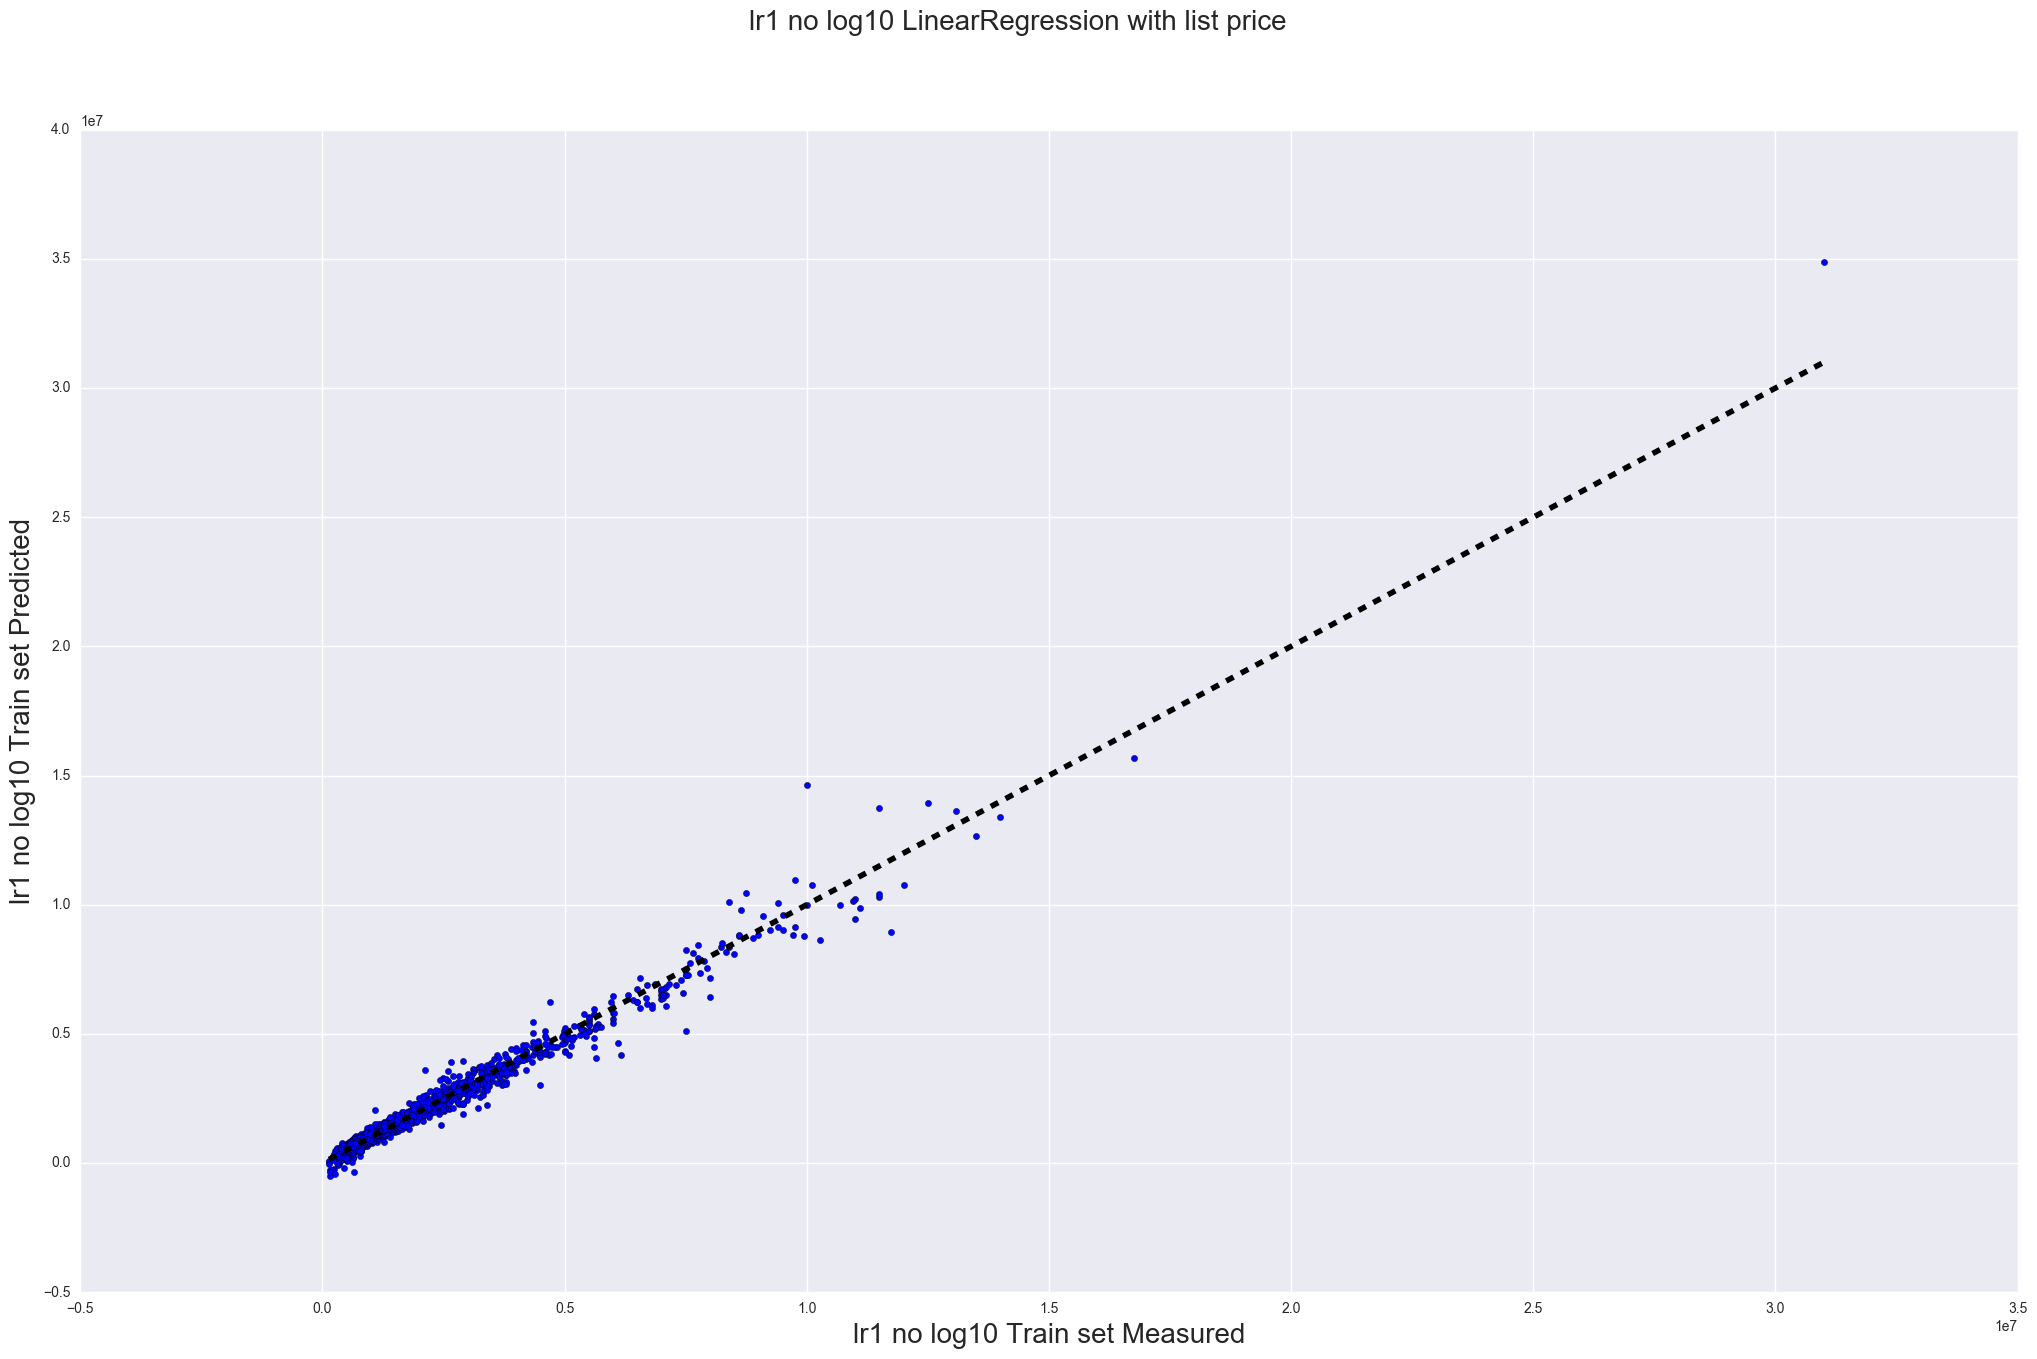

In [219]:
fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr1 no log10 LinearRegression with list price', fontsize=20)
ax.scatter(y_train, predicted_t1)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('lr1 no log10 Train set Measured', fontsize=20)
ax.set_ylabel('lr1 no log10 Train set Predicted', fontsize=20)
plt.show()

In [220]:
print('lr1 no log10 Test Variance score: %.2f' % lr1.score(X_test, y_test))

lr1 no log10 Test Variance score: 0.96


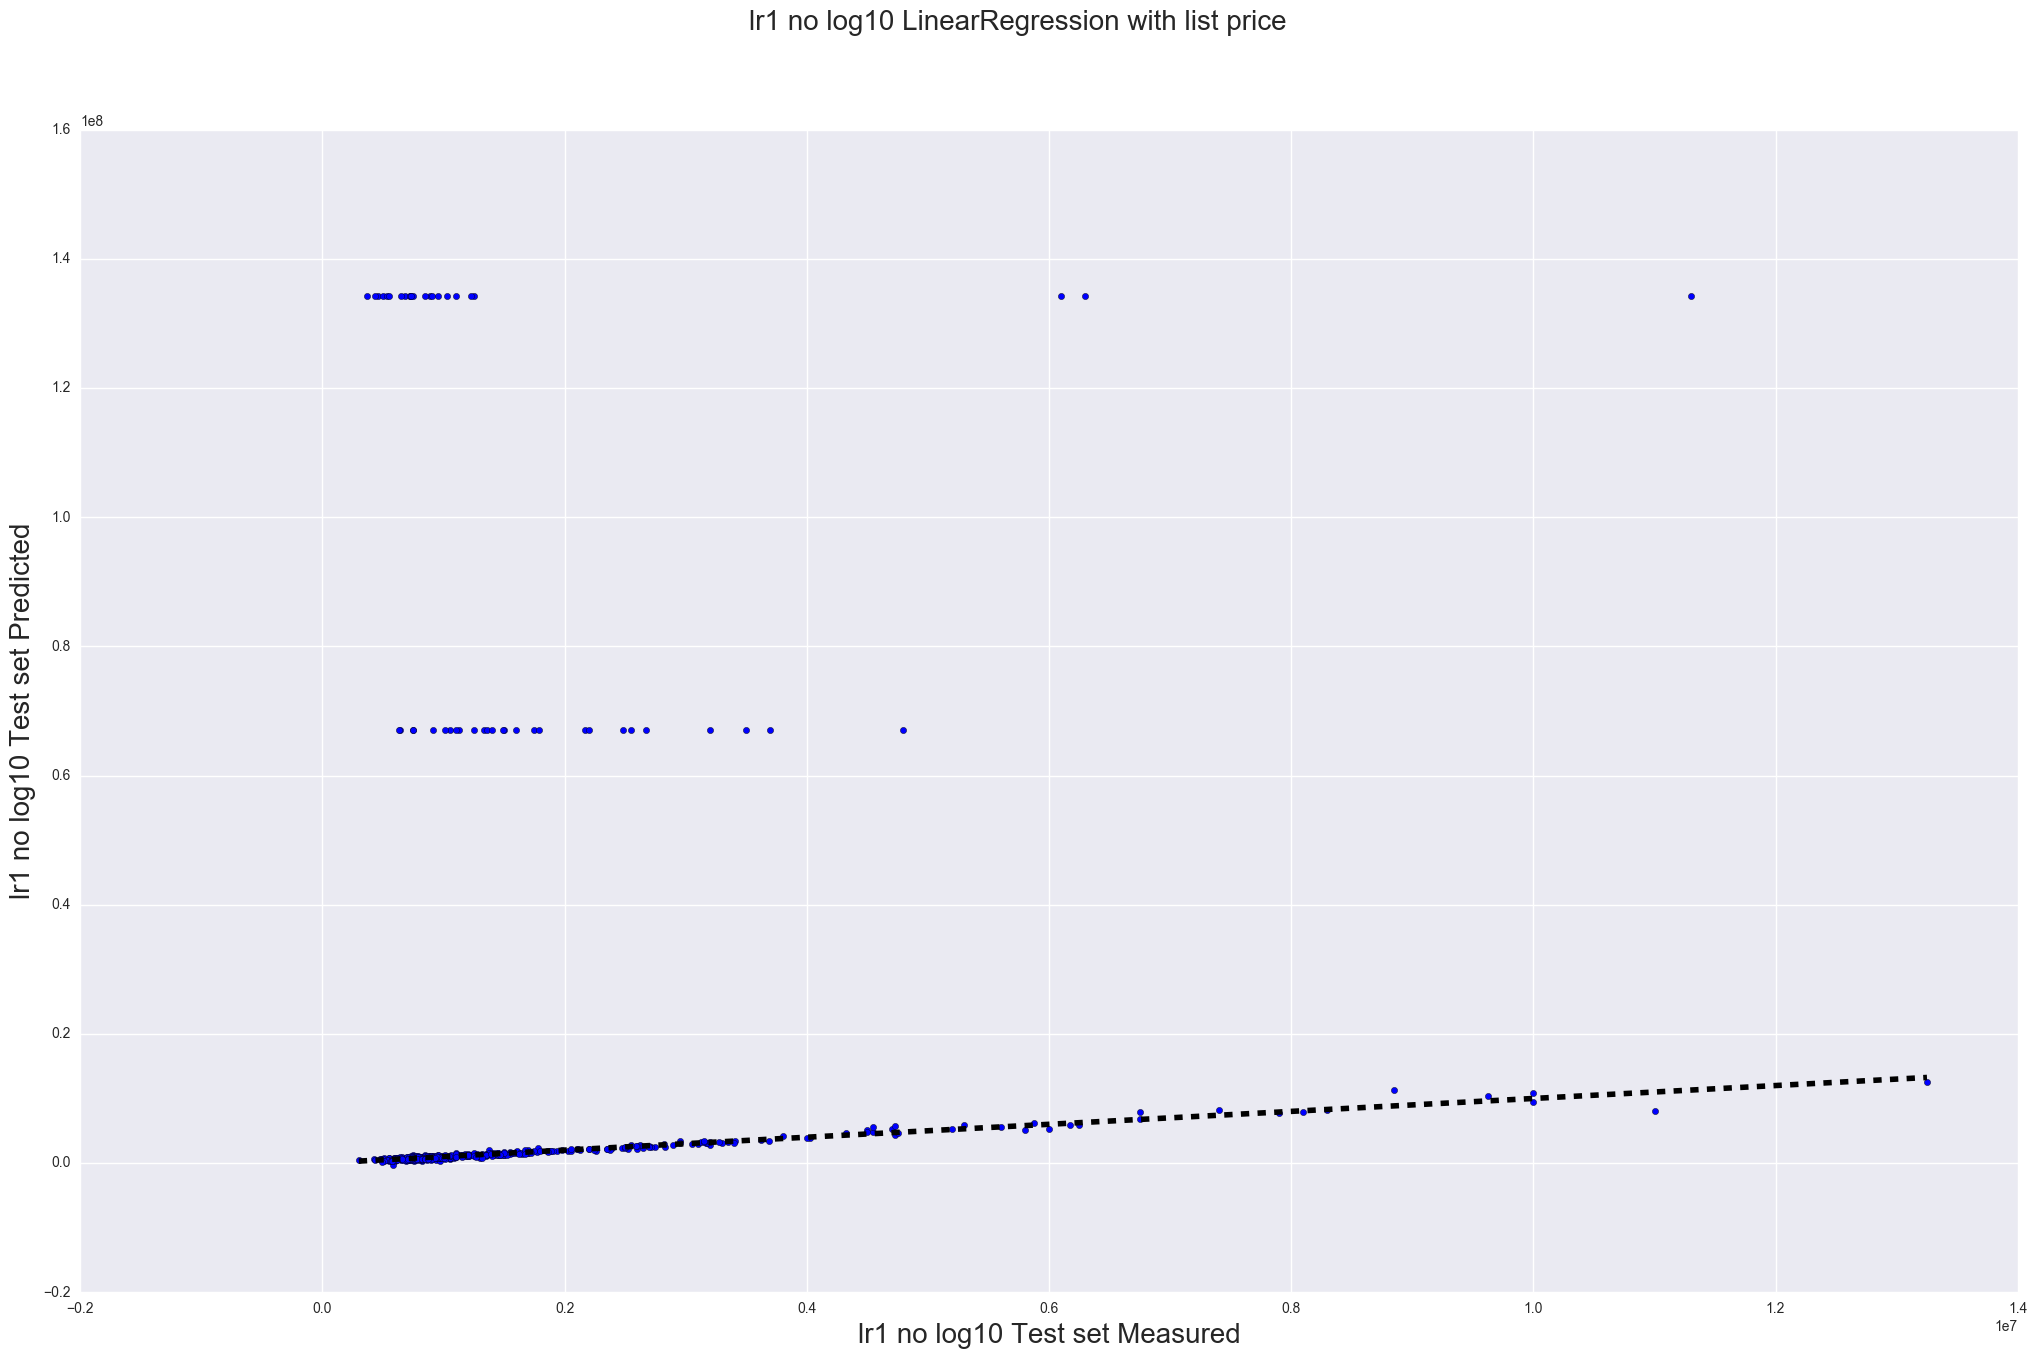

In [221]:
predicted_test1 = cross_val_predict(lr1, X_test, y_test, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr1 no log10 LinearRegression with list price', fontsize=20)
ax.scatter(y_test, predicted_test1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('lr1 no log10 Test set Measured', fontsize=20)
ax.set_ylabel('lr1 no log10 Test set Predicted', fontsize=20)
plt.show()

lr1 no log10 Validation Variance score: 0.98


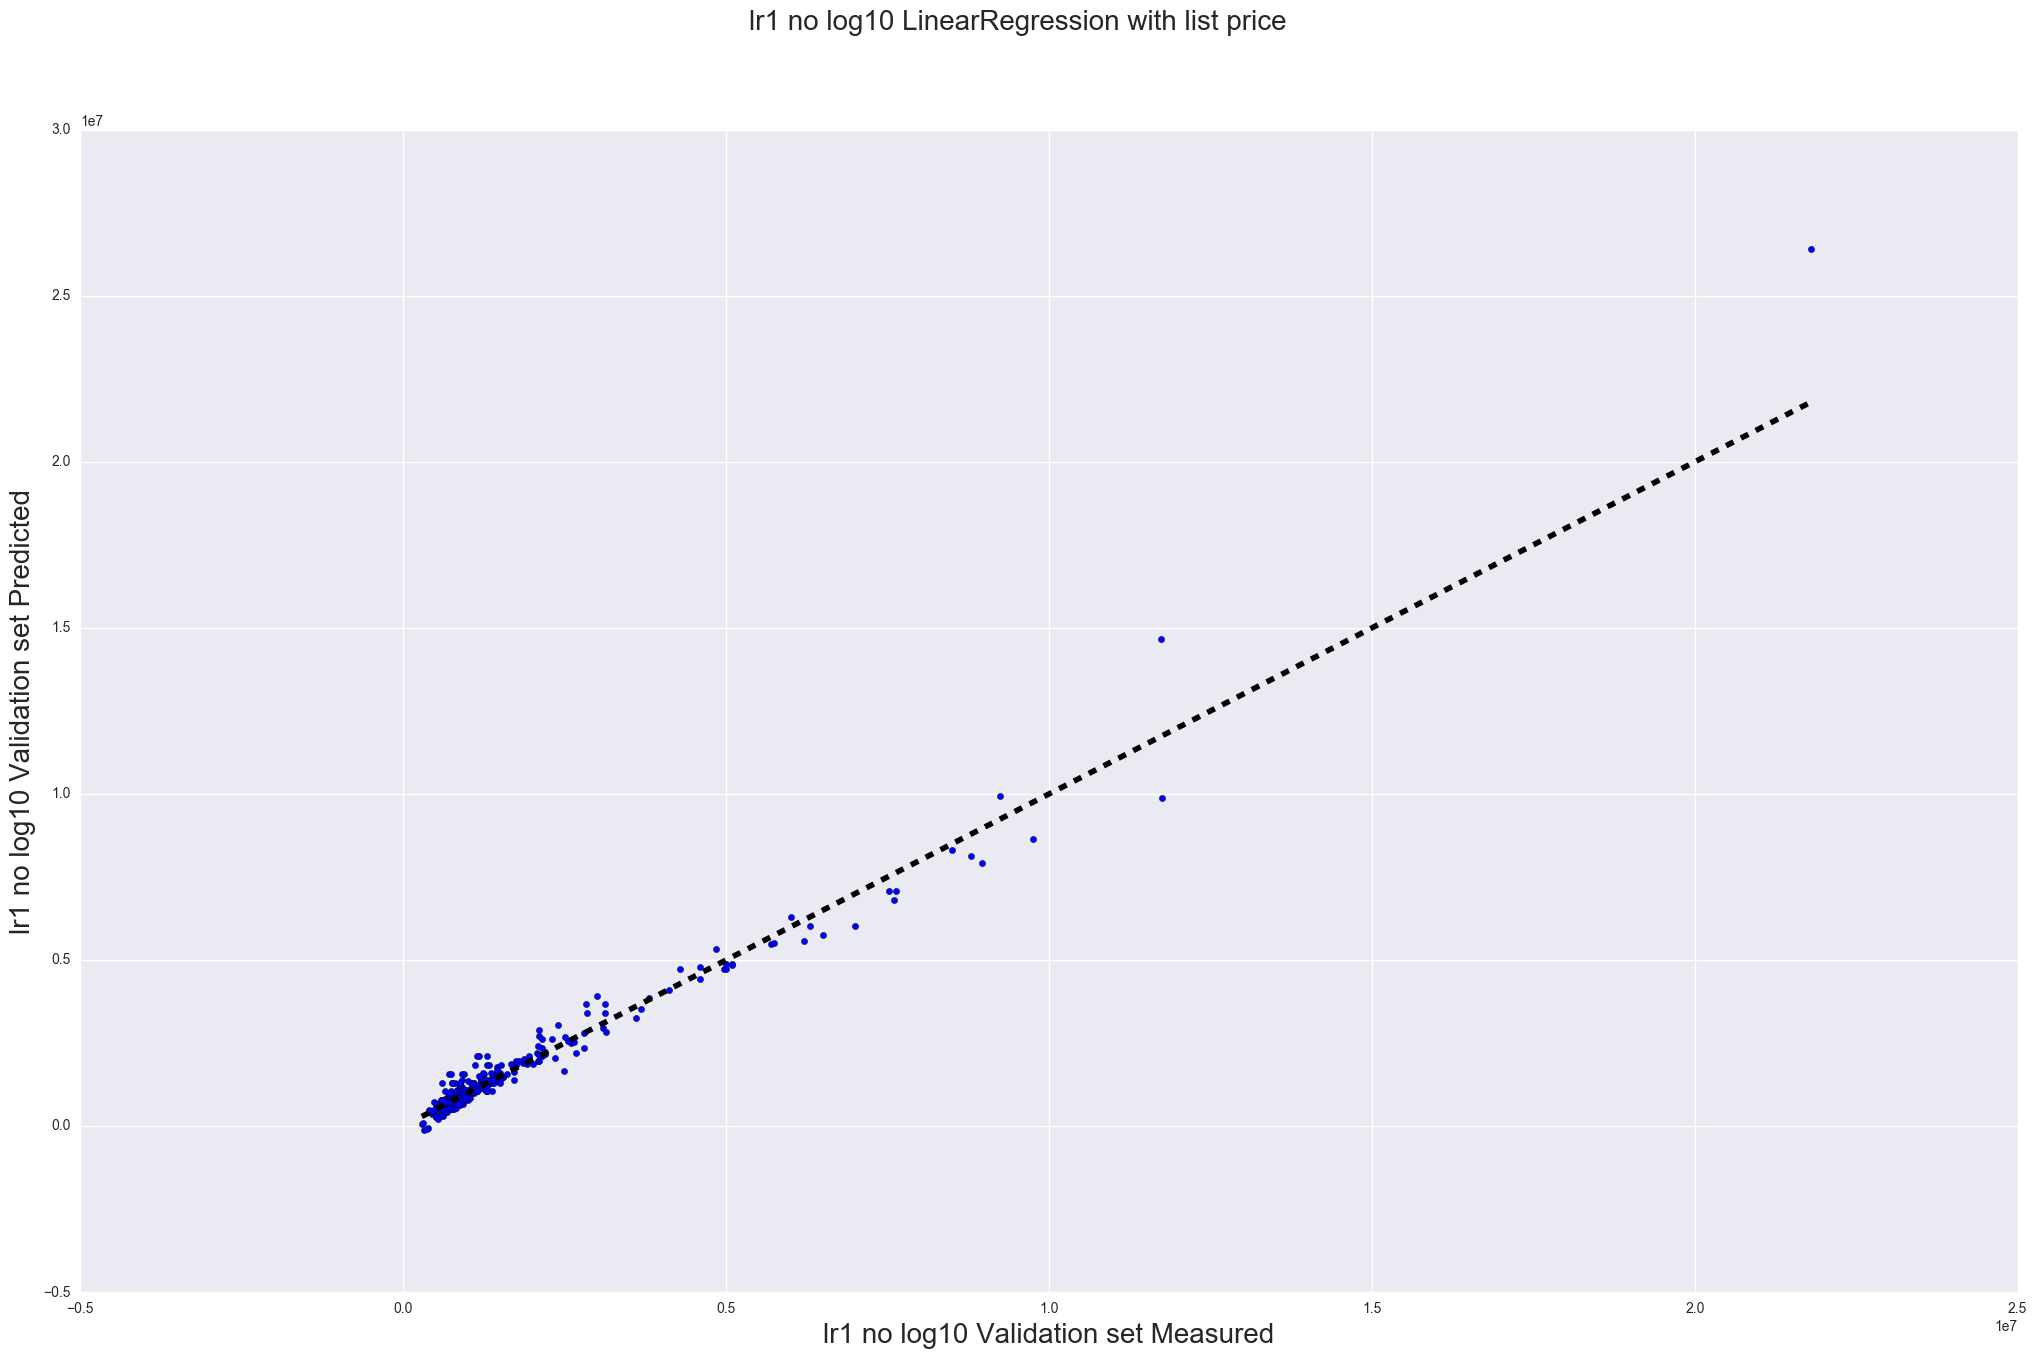

In [222]:
print('lr1 no log10 Validation Variance score: %.2f' % lr1.score(X_val, y_val))

# Train
predicted_val = cross_val_predict(lr1, X_val, y_val, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr1 no log10 LinearRegression with list price', fontsize=20)
ax.scatter(y_val, predicted_val)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('lr1 no log10 Validation set Measured', fontsize=20)
ax.set_ylabel('lr1 no log10 Validation set Predicted', fontsize=20)
plt.show()

In [223]:
X_train = X_sold[:4000]
X_test = X_sold[4000:]

y_train = y_sold[:4000]
y_test = y_sold[4000:]

In [224]:
lr2 = linear_model.LinearRegression()
lr2.fit(X_train, y_train)

# The coefficients
print 'lr2 Train Coefficients: \n', lr2.coef_
# Explained variance score: 1 is perfect prediction
print('lr2 Train Variance score: %.2f' % lr2.score(X_train, y_train))


lr2 Train Coefficients: 
[  1.16185167e+04   4.41667839e+04   1.96791378e+04   2.34391535e+01
   1.59532405e+01  -2.17406187e+03   8.54372046e-01   7.75127025e+04
  -7.75127025e+04  -9.16886767e+04   1.67346270e+04  -7.81616833e+02
  -1.44450654e+04  -1.17945798e+04   6.21583681e+04  -1.18467388e+04
  -1.81826921e+04  -4.18111110e+04  -1.71830688e+04  -9.78973161e+03
   8.62340382e+04   9.74125463e+03  -2.87488132e+04   3.34895188e+04
   1.42611352e+04  -2.68252046e+04  -5.35007288e+04  -2.29430330e+04
  -4.80792945e+03  -2.11459869e+04   1.24742320e+05   6.50372314e+04
  -3.75370728e+04   9.23744679e+03  -2.97729562e+04  -5.45666002e+04]
lr2 Train Variance score: 0.98


In [225]:
lr2 = linear_model.LinearRegression(normalize=True)
lr2.fit(X_train, y_train)

# The coefficients
print 'lr2 Train Coefficients: \n', lr2.coef_
# Explained variance score: 1 is perfect prediction
print('lr2 Train Variance score: %.2f' % lr2.score(X_train, y_train))


lr2 Train Coefficients: 
[  1.15304506e+04   4.42094188e+04   1.96575265e+04   2.34595466e+01
   1.59578545e+01  -2.17405560e+03   8.54373847e-01  -1.31658642e+15
  -1.31658642e+15   5.07022611e+16   1.67530136e+04  -7.79218954e+02
  -3.09563683e+16  -3.09563683e+16  -3.09563683e+16   1.21150415e+17
  -3.09563683e+16   7.04481540e+16  -3.09563683e+16   7.04481540e+16
  -3.09563683e+16  -3.09563683e+16   1.21150415e+17  -3.09563683e+16
   7.04481540e+16   7.04481540e+16   7.04481540e+16  -3.09563683e+16
   1.21150415e+17  -3.09563683e+16   1.21150415e+17   7.04481540e+16
  -3.09563683e+16   7.04481540e+16   7.04481540e+16  -3.09563683e+16]
lr2 Train Variance score: 0.98


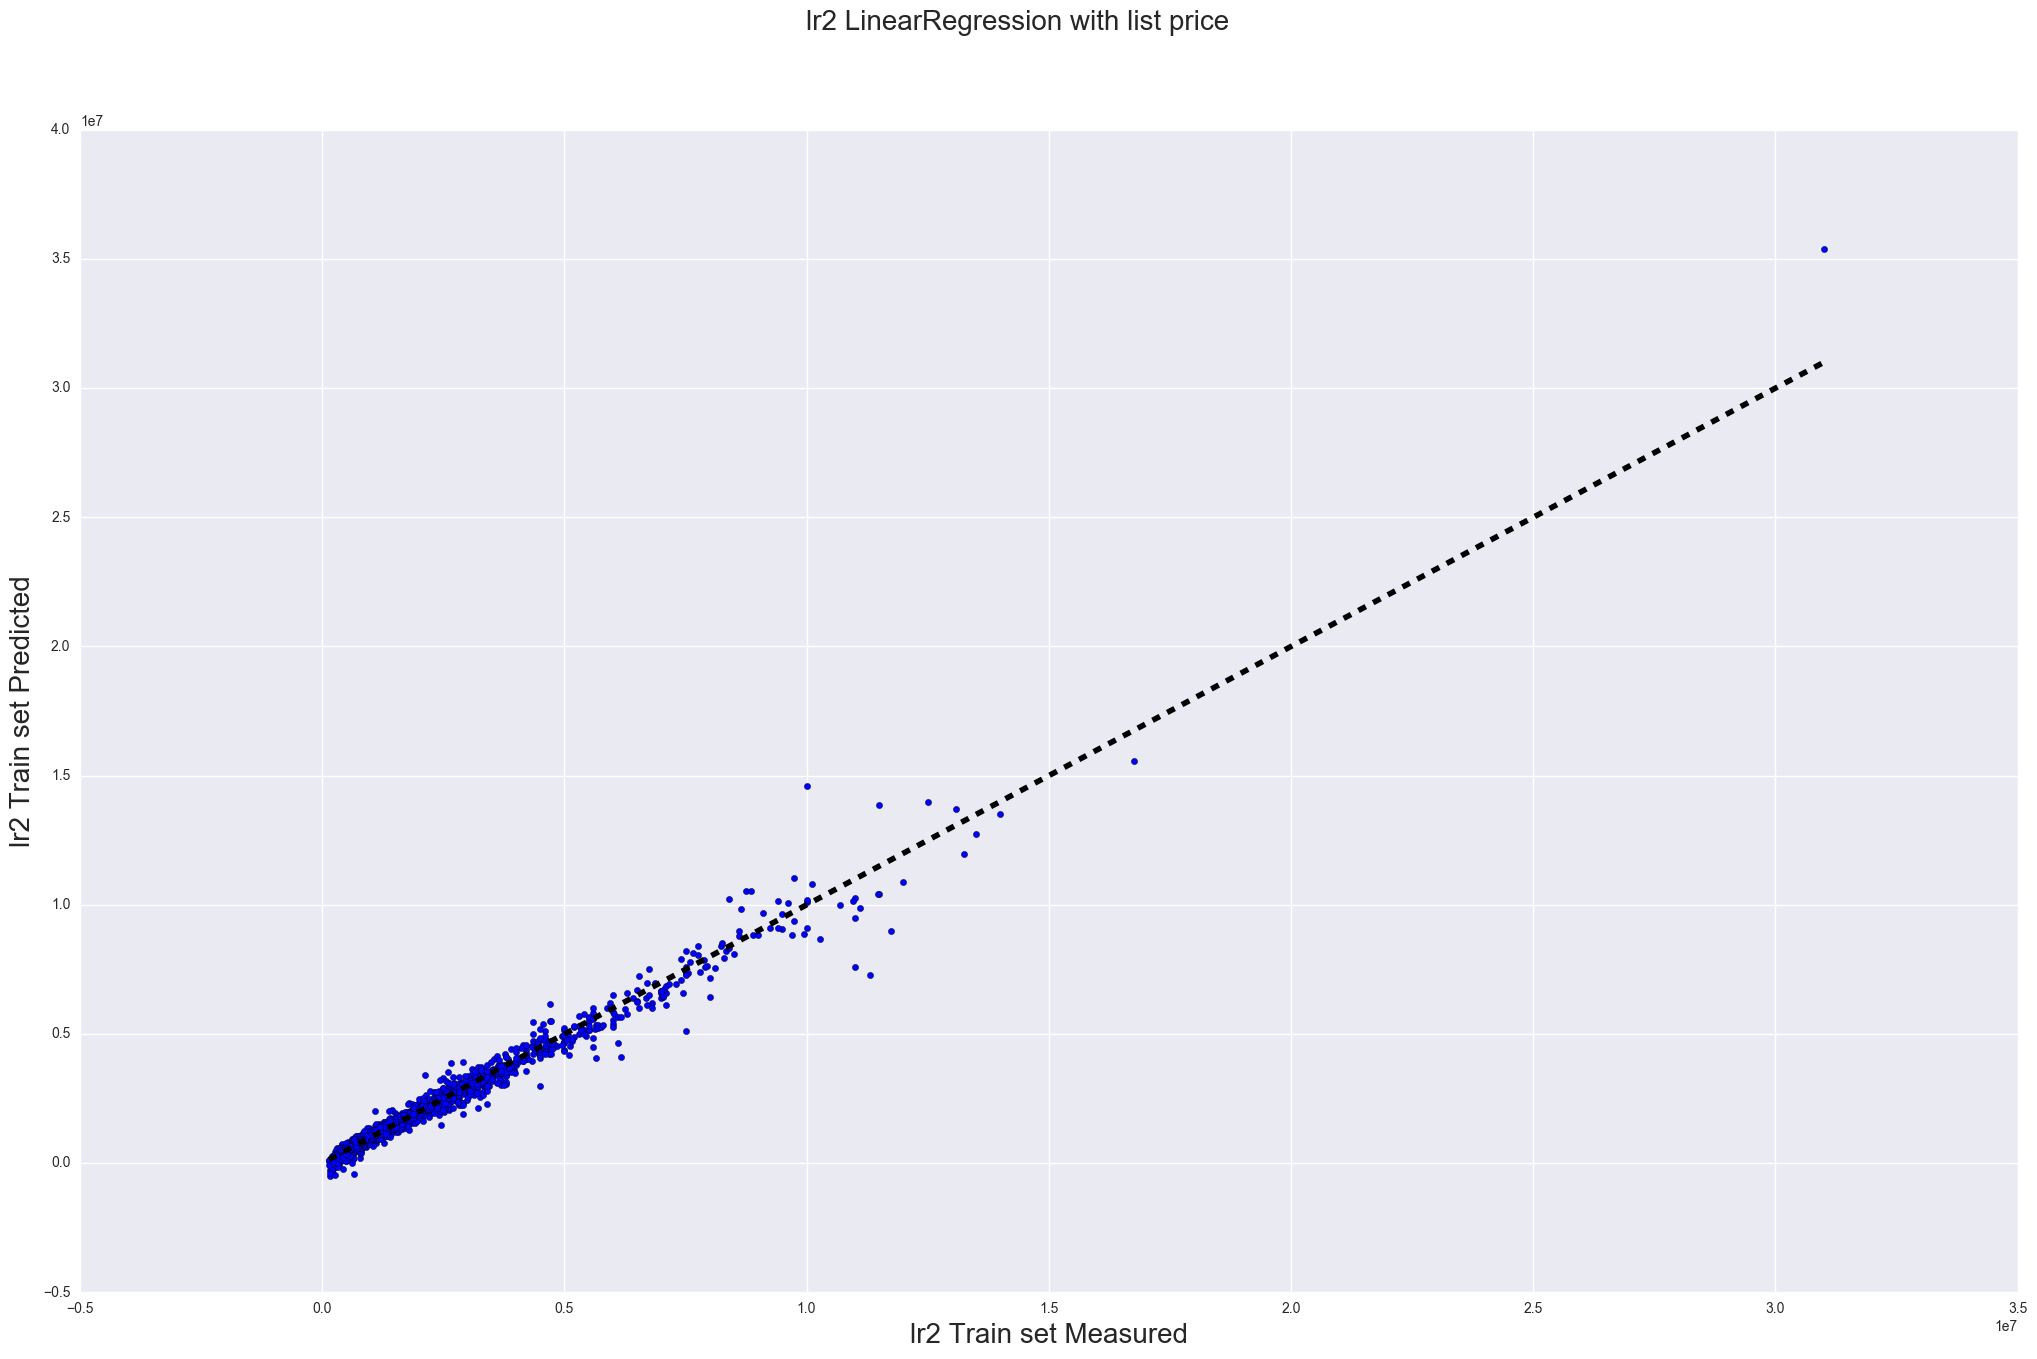

In [226]:
predicted_train2 = cross_val_predict(lr2, X_train, y_train, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr2 LinearRegression with list price', fontsize=20)
ax.scatter(y_train, predicted_train2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('lr2 Train set Measured', fontsize=20)
ax.set_ylabel('lr2 Train set Predicted', fontsize=20)
plt.show()

lr2 Test Variance score: 0.98


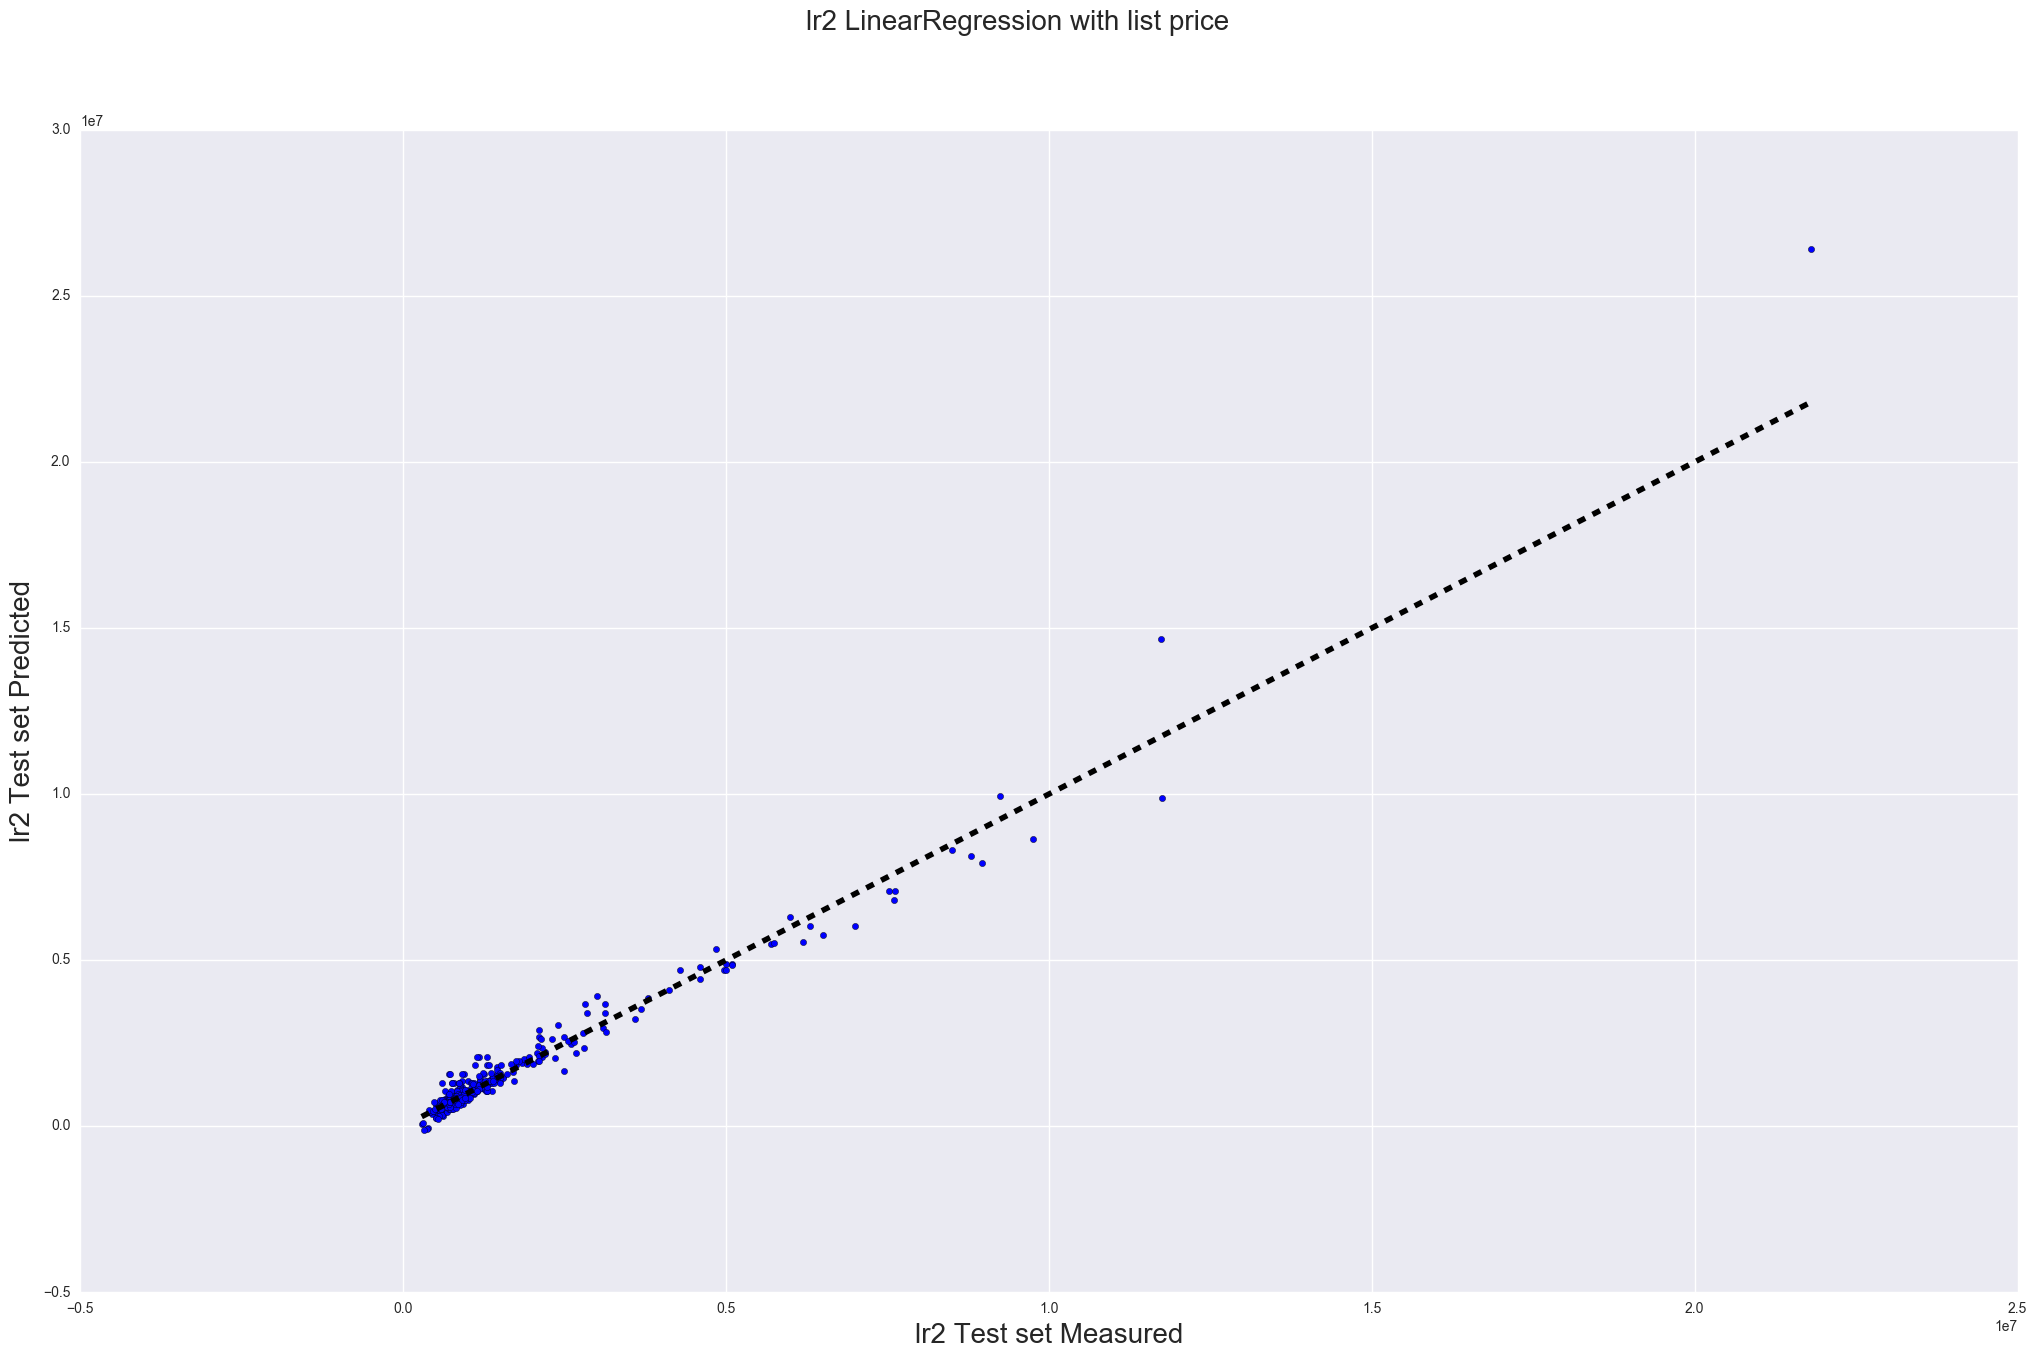

In [227]:
print('lr2 Test Variance score: %.2f' % lr2.score(X_test, y_test))

# Train
predicted_test2 = cross_val_predict(lr2, X_test, y_test, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr2 LinearRegression with list price', fontsize=20)
ax.scatter(y_test, predicted_test2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('lr2 Test set Measured', fontsize=20)
ax.set_ylabel('lr2 Test set Predicted', fontsize=20)
plt.show()


no list price Train Coefficients: 
[ -1.96389358e+05   1.77720604e+05   8.25418320e+04   1.16667942e+03
   1.47177831e+02  -9.30055334e+02   3.57559691e+05  -3.57559691e+05
  -4.40609801e+05   1.28491004e+05   3.88247759e+03  -1.97681688e+05
  -1.21765809e+05   3.67265952e+05  -5.51013030e+04  -1.66581094e+05
   2.86474889e+04  -1.24925038e+05   1.43997708e+05   3.63462876e+05
   9.52852310e+04  -2.71812304e+05  -7.81295352e+04   1.17697564e+05
   4.75252650e+04  -1.06855041e+05  -1.69882071e+05  -9.77697374e+04
  -1.37905854e+05  -2.97841550e+04   3.89365240e+05  -1.16946868e+05
   3.16572515e+05  -3.49445916e+04  -1.59734751e+05]
no list price Train Variance score: 0.81


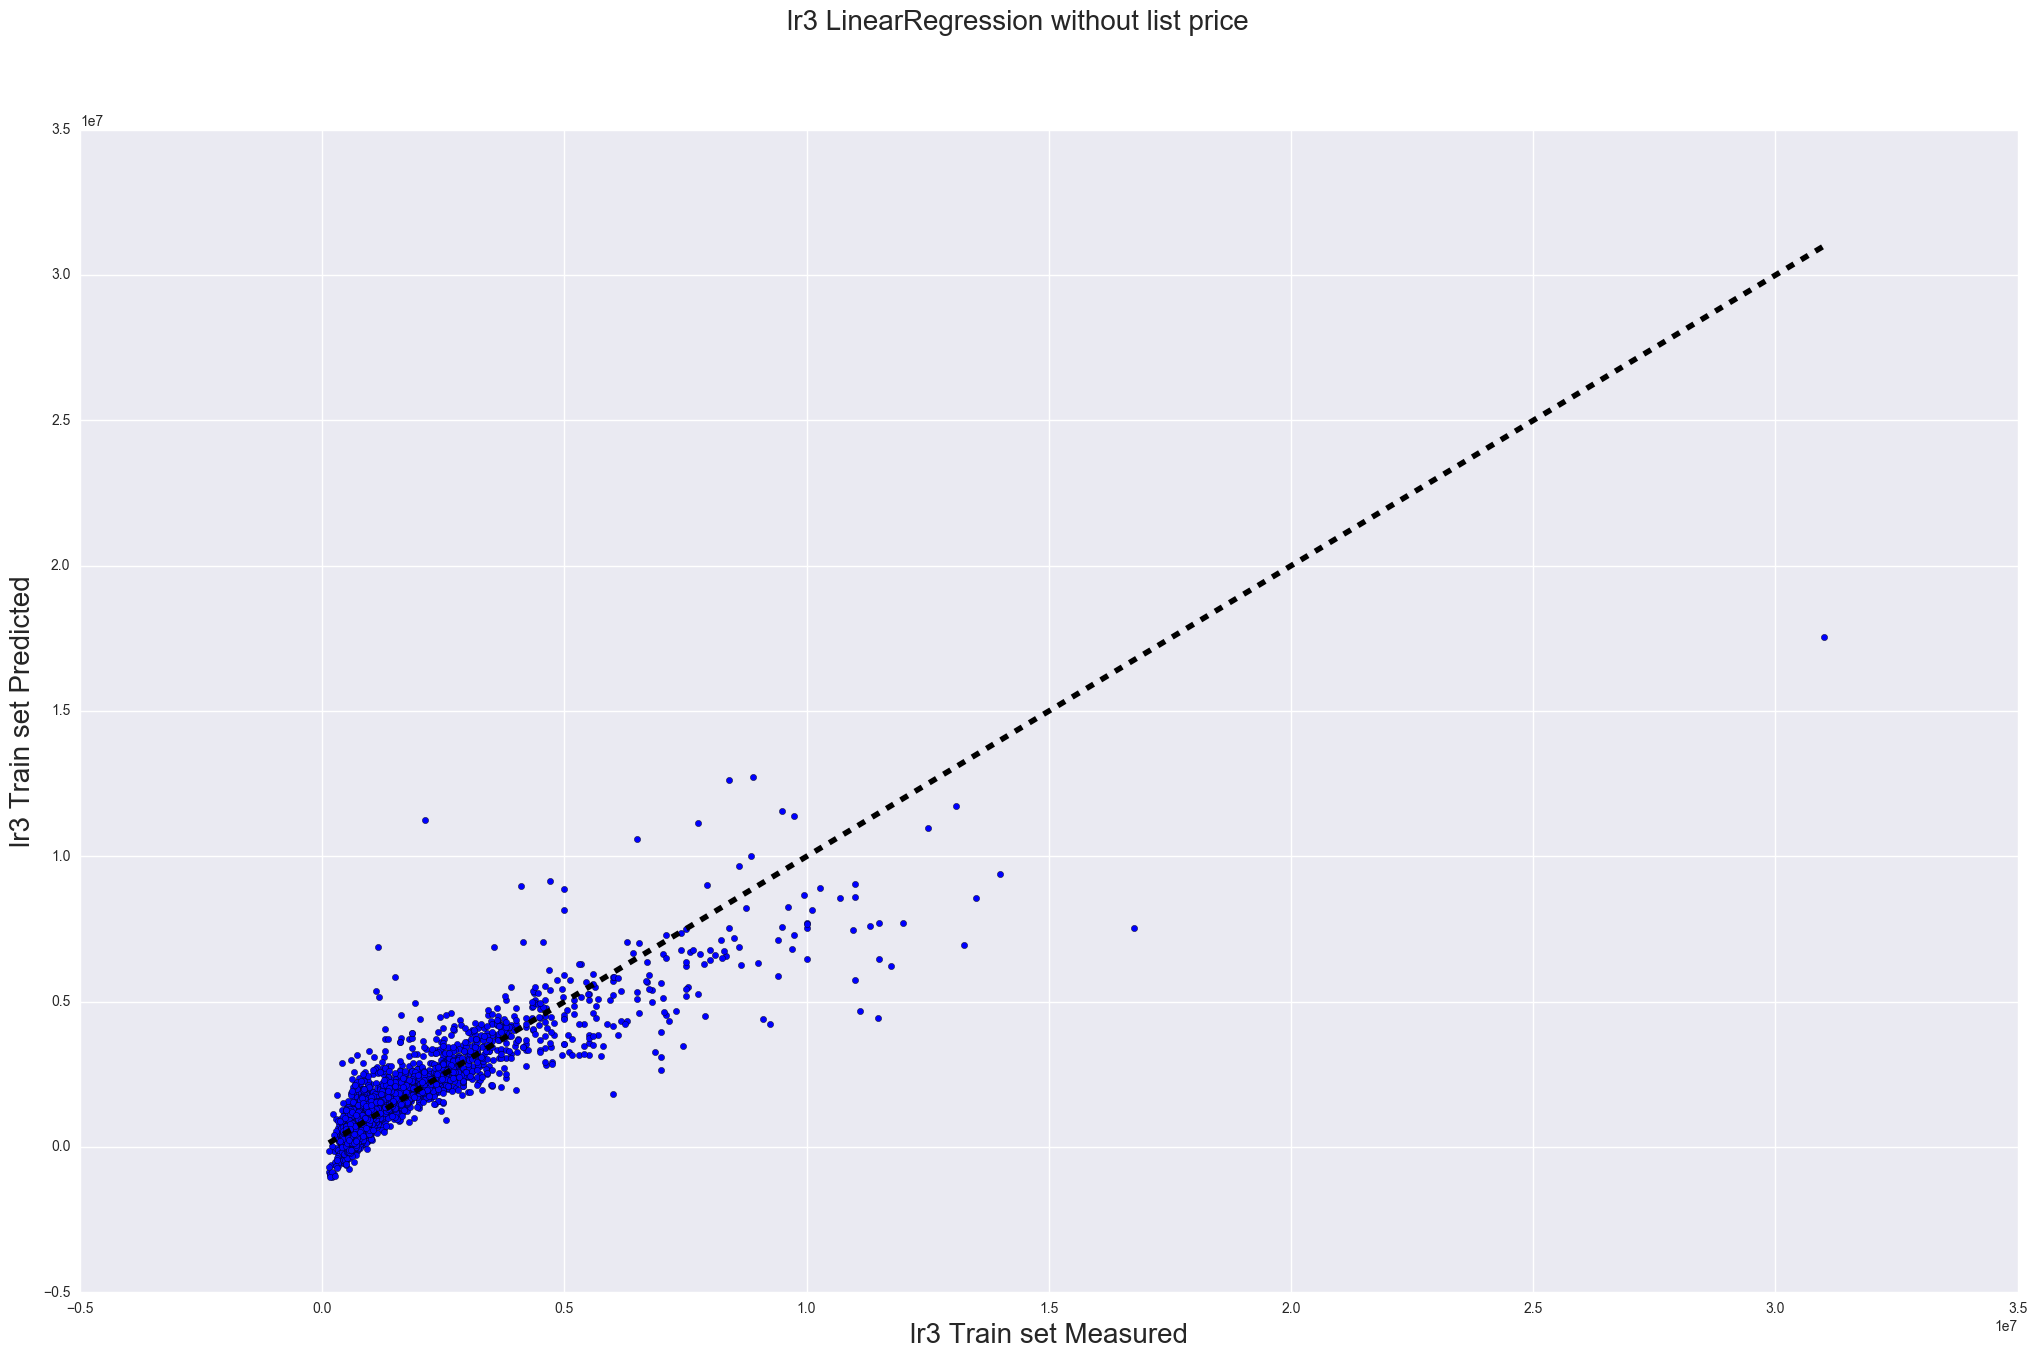

In [228]:
X_train.pop('list_price')
X_test.pop('list_price')
# Train

lr3 = linear_model.LinearRegression()
lr3.fit(X_train, y_train)

# The coefficients
print 'no list price Train Coefficients: \n', lr3.coef_
# Explained variance score: 1 is perfect prediction
print('no list price Train Variance score: %.2f' % lr3.score(X_train, y_train))

# Train
predicted_train3 = cross_val_predict(lr3, X_train, y_train, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr3 LinearRegression without list price', fontsize=20)
ax.scatter(y_train, predicted_train3)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('lr3 Train set Measured', fontsize=20)
ax.set_ylabel('lr3 Train set Predicted', fontsize=20)
plt.show()


lr3 Test Variance score: 0.77


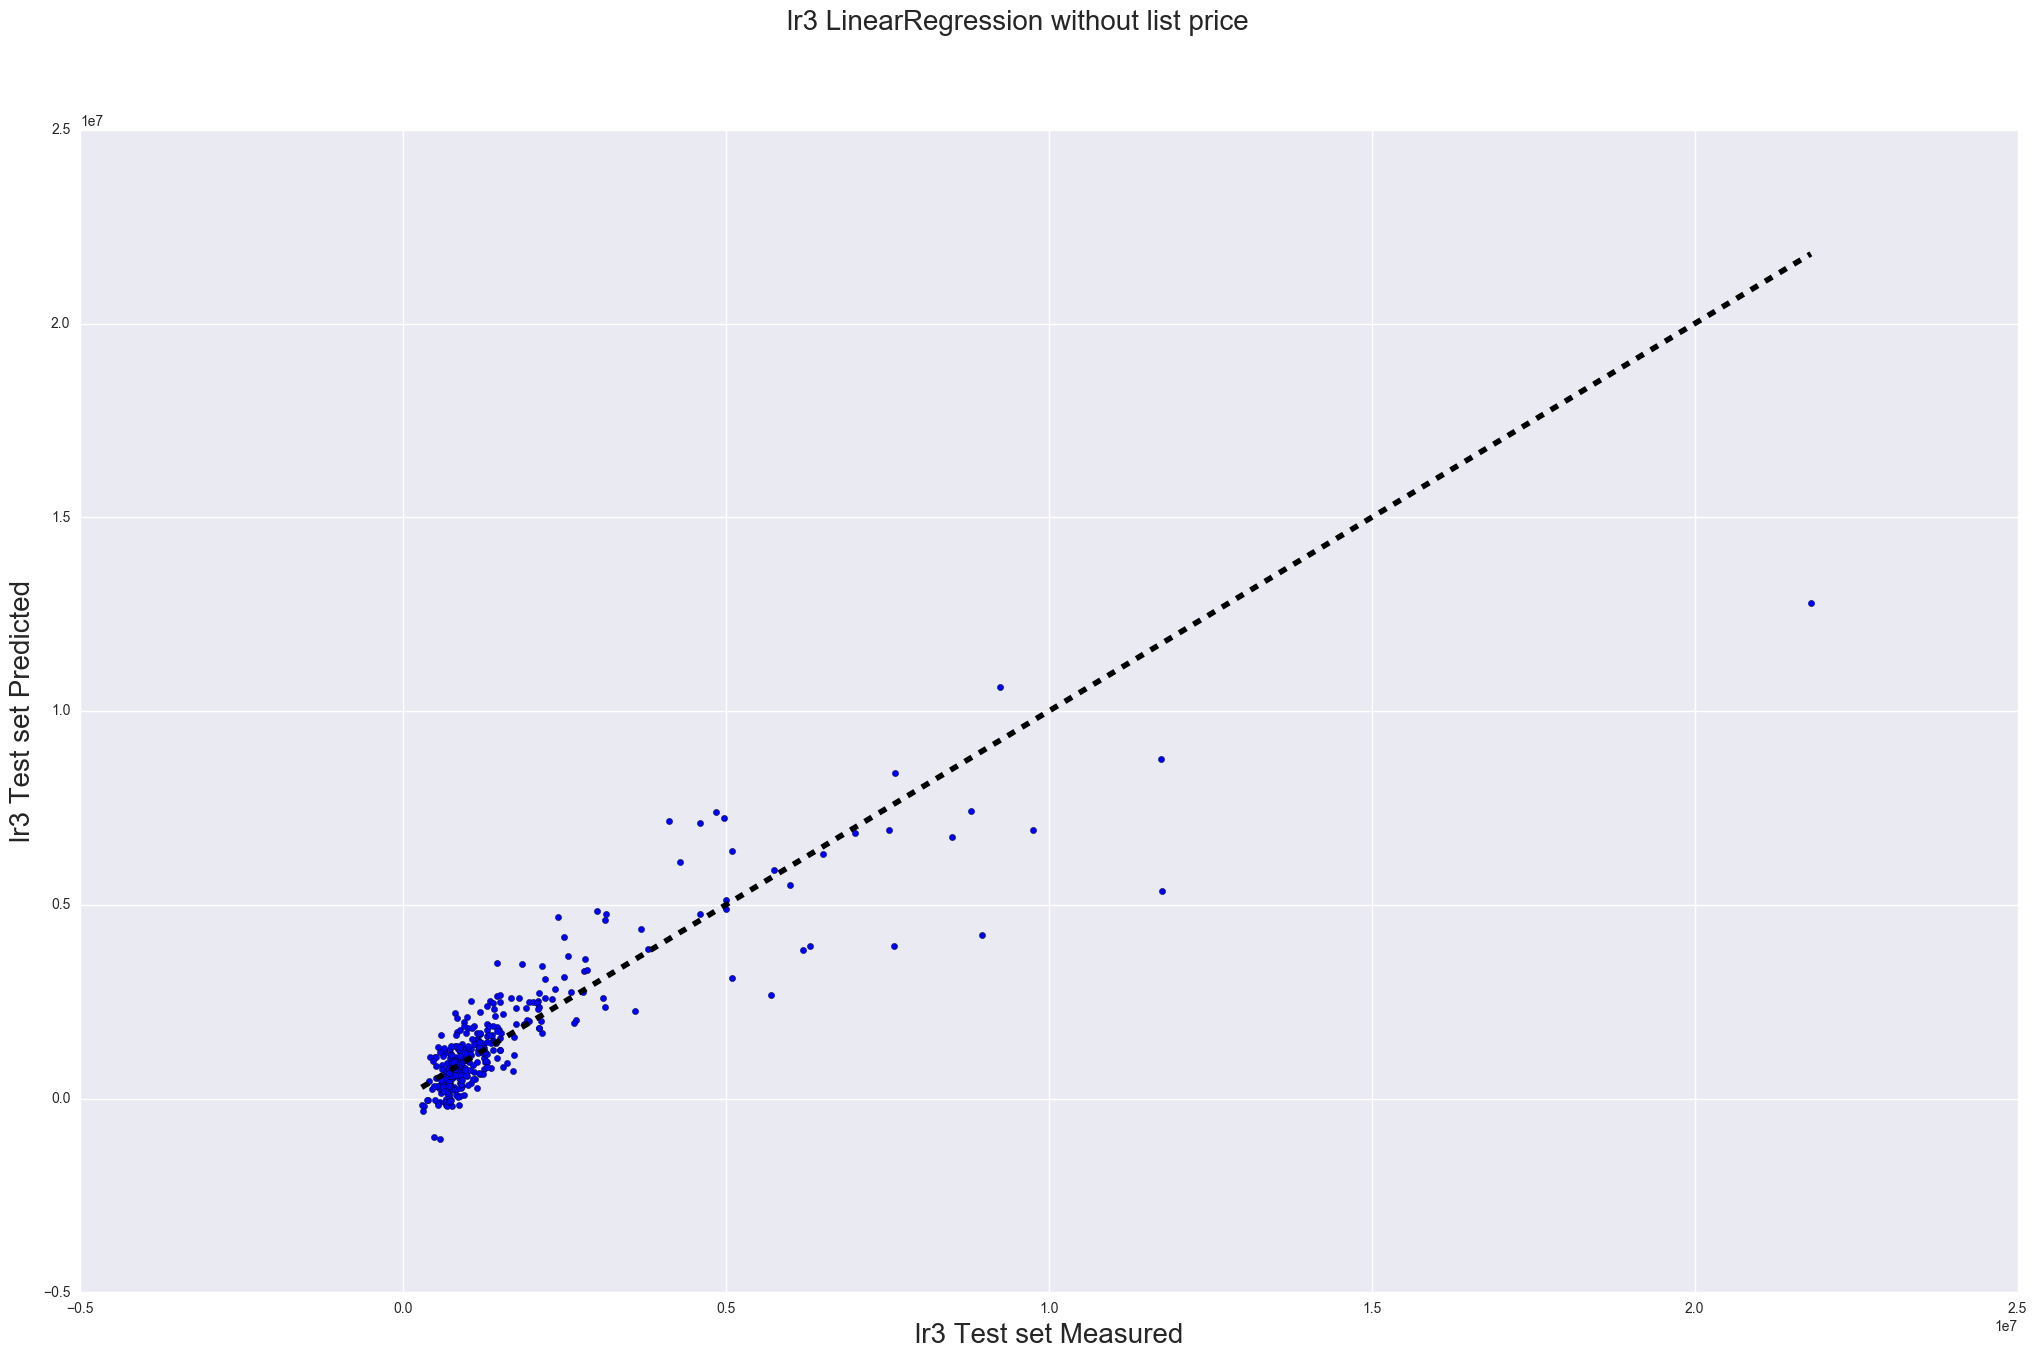

In [229]:
print('lr3 Test Variance score: %.2f' % lr3.score(X_test, y_test))

# Train
predicted_test3 = cross_val_predict(lr3, X_test, y_test, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr3 LinearRegression without list price', fontsize=20)
ax.scatter(y_test, predicted_test3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('lr3 Test set Measured', fontsize=20)
ax.set_ylabel('lr3 Test set Predicted', fontsize=20)
plt.show()

In [230]:
X_sold.head(1)

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,list_price,single_f_h,condo,dist_no,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,2,2.0,1,1456,565.0,38,1195000,0,1,8,...,0,0,0,0,0,0,0,0,0,0


In [231]:
y_sold.head(1)

sold
2013-11-12    1130000
Name: sale_price, dtype: int64

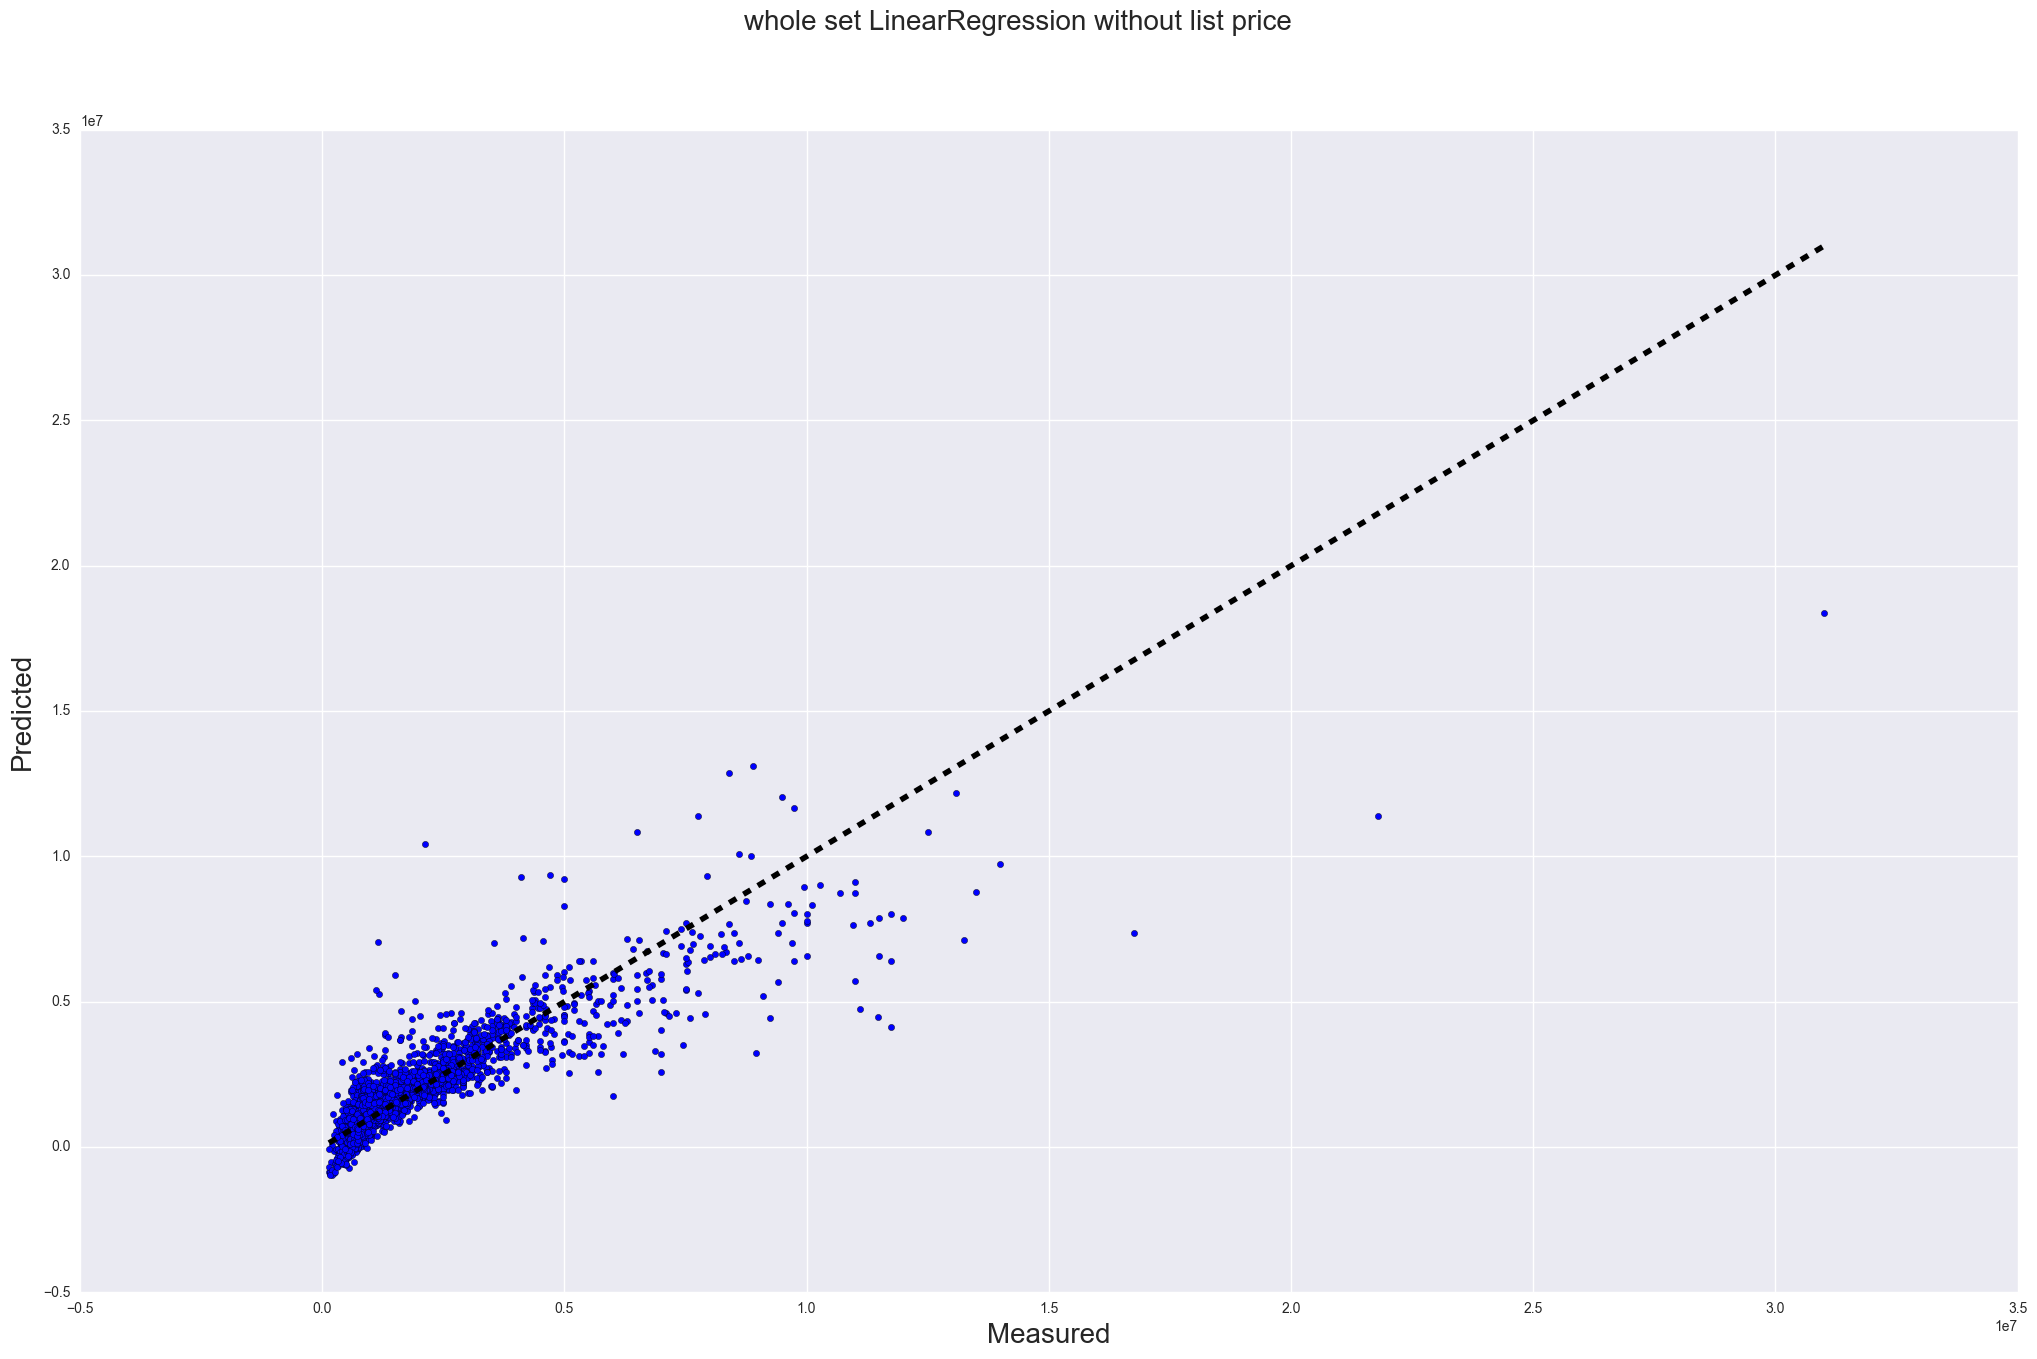

In [232]:
# The whole set
X_sold.pop('list_price')
predicted_all = cross_val_predict(lr3, X_sold, y_sold, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('whole set LinearRegression without list price', fontsize=20)
ax.scatter(y_sold, predicted_all)
ax.plot([y_sold.min(), y_sold.max()], [y_sold.min(), y_sold.max()], 'k--', lw=4)
ax.set_xlabel('Measured', fontsize=20)
ax.set_ylabel('Predicted', fontsize=20)
plt.show()

In [233]:
print('lr3 All Variance score: %.2f' % lr3.score(X_sold, y_sold))

lr3 All Variance score: 0.80


In [234]:
print 'Date        Square-Foot     Sale-price    Predicted price w LP   Predicted w/o LP    S-P error'
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', y_test[i], '     ', predicted_test2[i], '     ', predicted_test3[i], '    ', y_test[i]-predicted_test2[i]


Date        Square-Foot     Sale-price    Predicted price w LP   Predicted w/o LP    S-P error
2016-08-16       700       917500       1179648.0       1349046.67804      -262148.0
2016-08-16       1312       850000       720896.0       1055932.213      129104.0
2016-08-16       760       670000       524288.0       -15857.413444      145712.0
2016-08-16       1050       980000       983040.0       1301797.75862      -3040.0
2016-08-16       4617       9750000       8650752.0       6936240.33525      1099248.0
2016-08-17       1140       1100000       983040.0       687347.43916      116960.0
2016-08-17       1210       1050000       983040.0       403594.249367      66960.0
2016-08-17       1000       775000       655360.0       566029.959602      119640.0
2016-08-17       550       699000       917504.0       719862.401498      -218504.0
2016-08-17       527       385000       -65536.0       -47478.1680219      450536.0
2016-08-17       975       790000       589824.0       301756.661

In [235]:
print 'Date        Square-Foot     Sale-price  Pred. w LP   Pred. w/o LP    S-P error'
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', y_test[i], '     ', np.round(predicted_test2[i], 2), '     ', np.round(predicted_all[i], 2), '    ', np.round(y_test[i]-predicted_all[i], 2)

Date        Square-Foot     Sale-price  Pred. w LP   Pred. w/o LP    S-P error
2016-08-16       700       917500       1179648.0       1264019.52      -346519.52
2016-08-16       1312       850000       720896.0       353802.97      496197.03
2016-08-16       760       670000       524288.0       310675.35      359324.65
2016-08-16       1050       980000       983040.0       3862669.11      -2882669.11
2016-08-16       4617       9750000       8650752.0       191424.35      9558575.65
2016-08-17       1140       1100000       983040.0       925056.45      174943.55
2016-08-17       1210       1050000       983040.0       -325253.87      1375253.87
2016-08-17       1000       775000       655360.0       621196.98      153803.02
2016-08-17       550       699000       917504.0       493983.21      205016.79
2016-08-17       527       385000       -65536.0       2056042.0      -1671042.0
2016-08-17       975       790000       589824.0       -101076.35      891076.35
2016-08-18       129

In [236]:
X_train.head(3)

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,single_f_h,condo,dist_no,sold_year,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,2,2.0,1,1456,565.00,38,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,1.5,0,744,556.00,8,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,1,1.0,1,700,511.14,35,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0


In [237]:
y_train.head(3)


sold
2013-11-12    1130000
2013-11-12     595000
2013-11-12     610000
Name: sale_price, dtype: int64

In [238]:
X_train.shape

(4000, 35)

In [239]:
y_train.shape

(4000,)

In [240]:
X_test.shape

(339, 35)

In [241]:
y_test.shape

(339,)

In [242]:
np.log10(y_train).head(3)


sold
2013-11-12    6.053078
2013-11-12    5.774517
2013-11-12    5.785330
Name: sale_price, dtype: float64

lr_log Train Variance score: 0.86


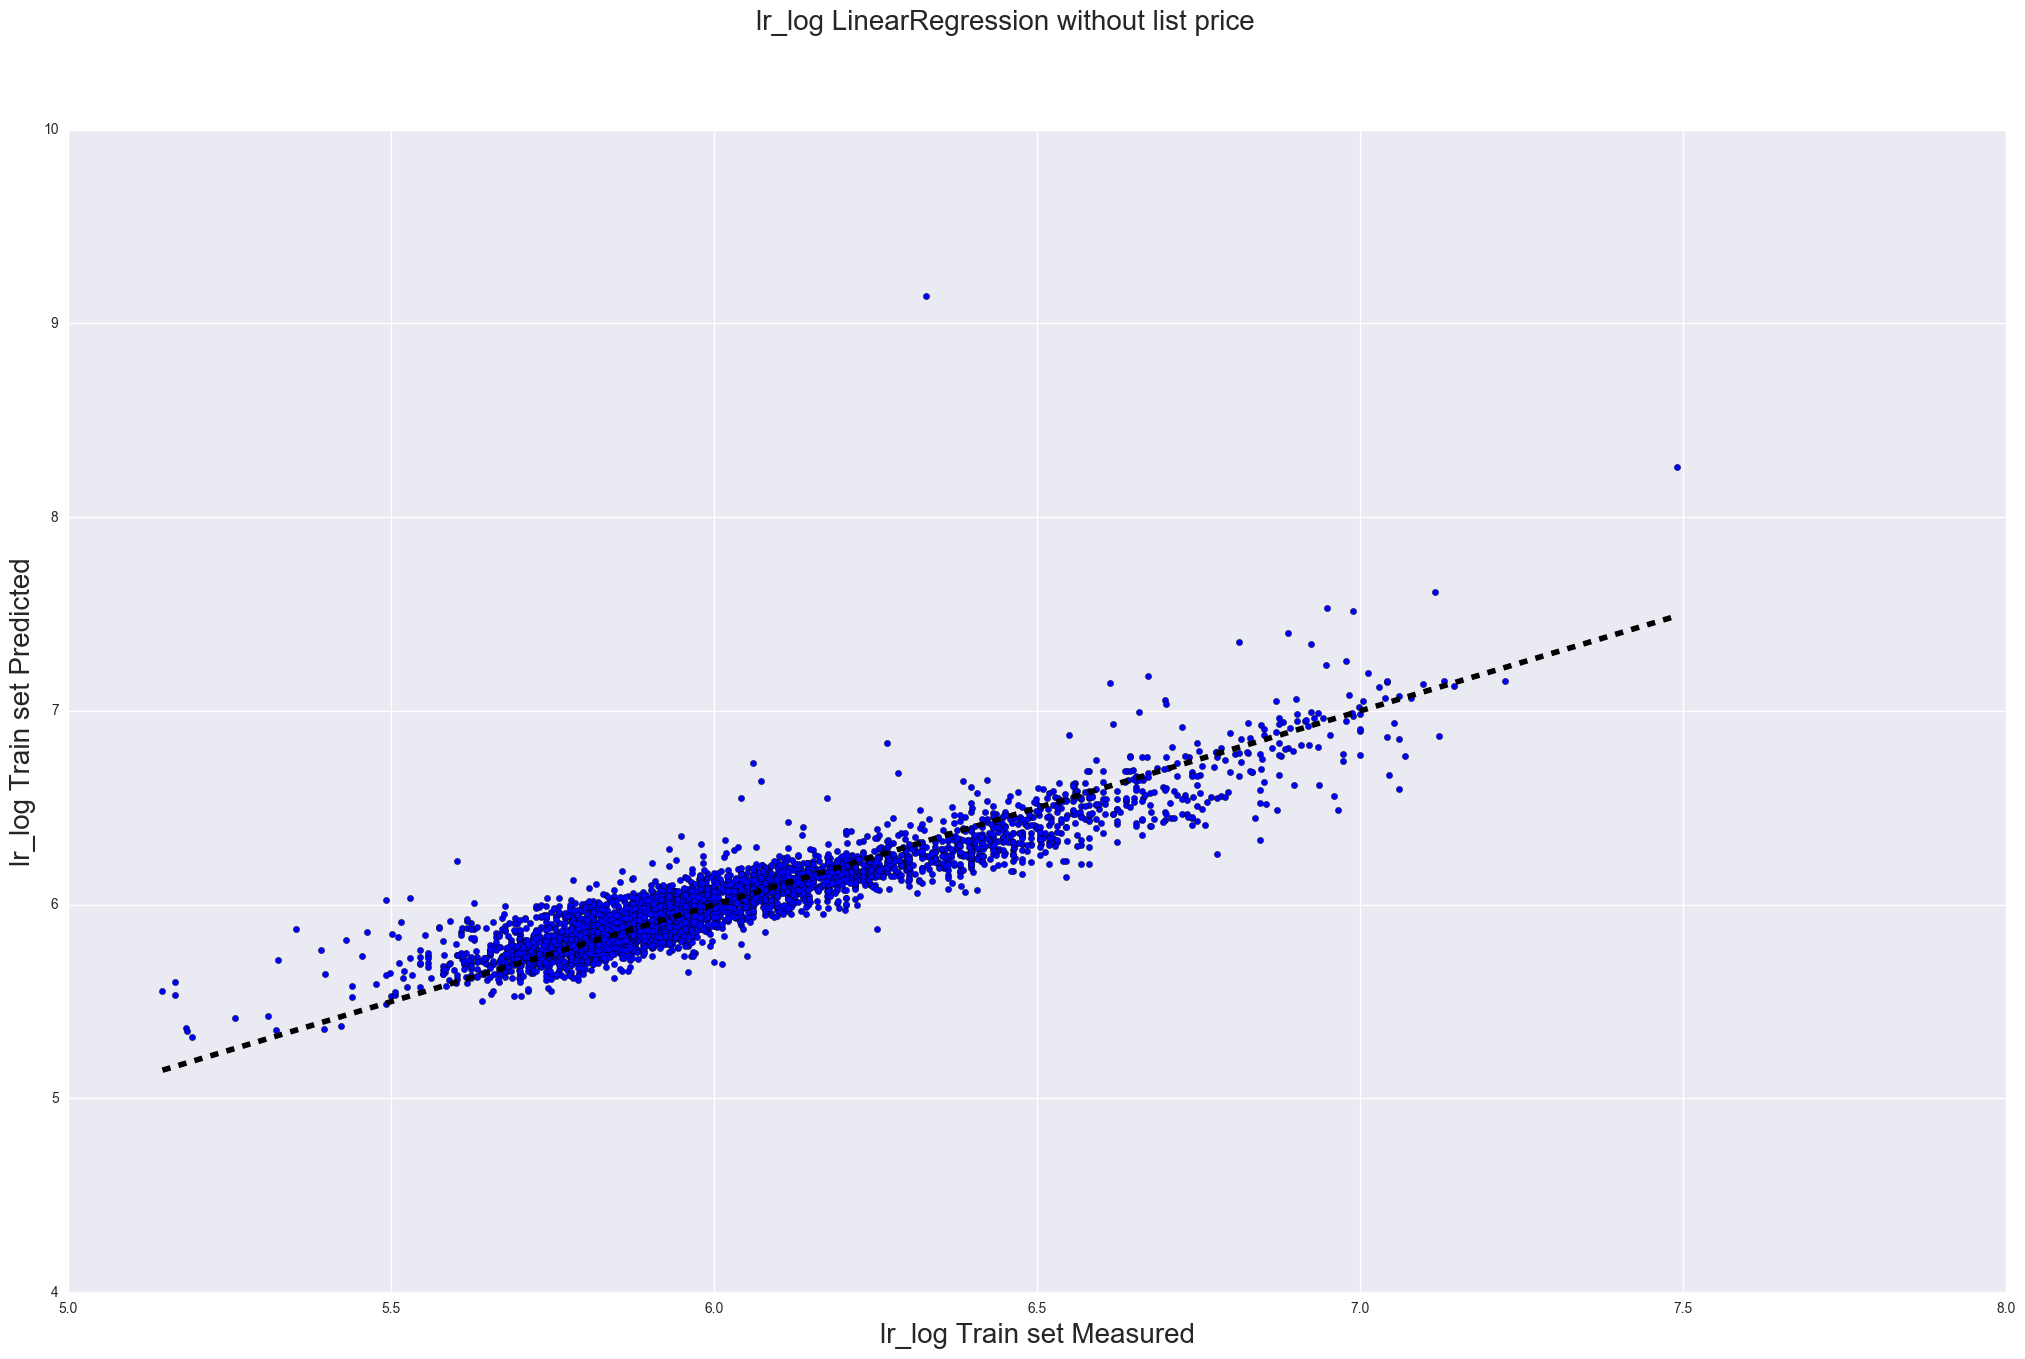

In [243]:
y_train_log = np.log10(y_train)
y_test_log = np.log10(y_test)

lr_log= linear_model.LinearRegression(normalize = True)
lr_log.fit(X_train, y_train_log)
# Train
print('lr_log Train Variance score: %.2f' % lr_log.score(X_train, y_train_log))
predicted_train_log = cross_val_predict(lr_log, X_train, y_train_log, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr_log LinearRegression without list price', fontsize=20)
ax.scatter(y_train_log, predicted_train_log)
ax.plot([y_train_log.min(), y_train_log.max()], [y_train_log.min(), y_train_log.max()], 'k--', lw=4)
ax.set_xlabel('lr_log Train set Measured', fontsize=20)
ax.set_ylabel('lr_log Train set Predicted', fontsize=20)
plt.show()


lr_log Test Variance score: 0.86


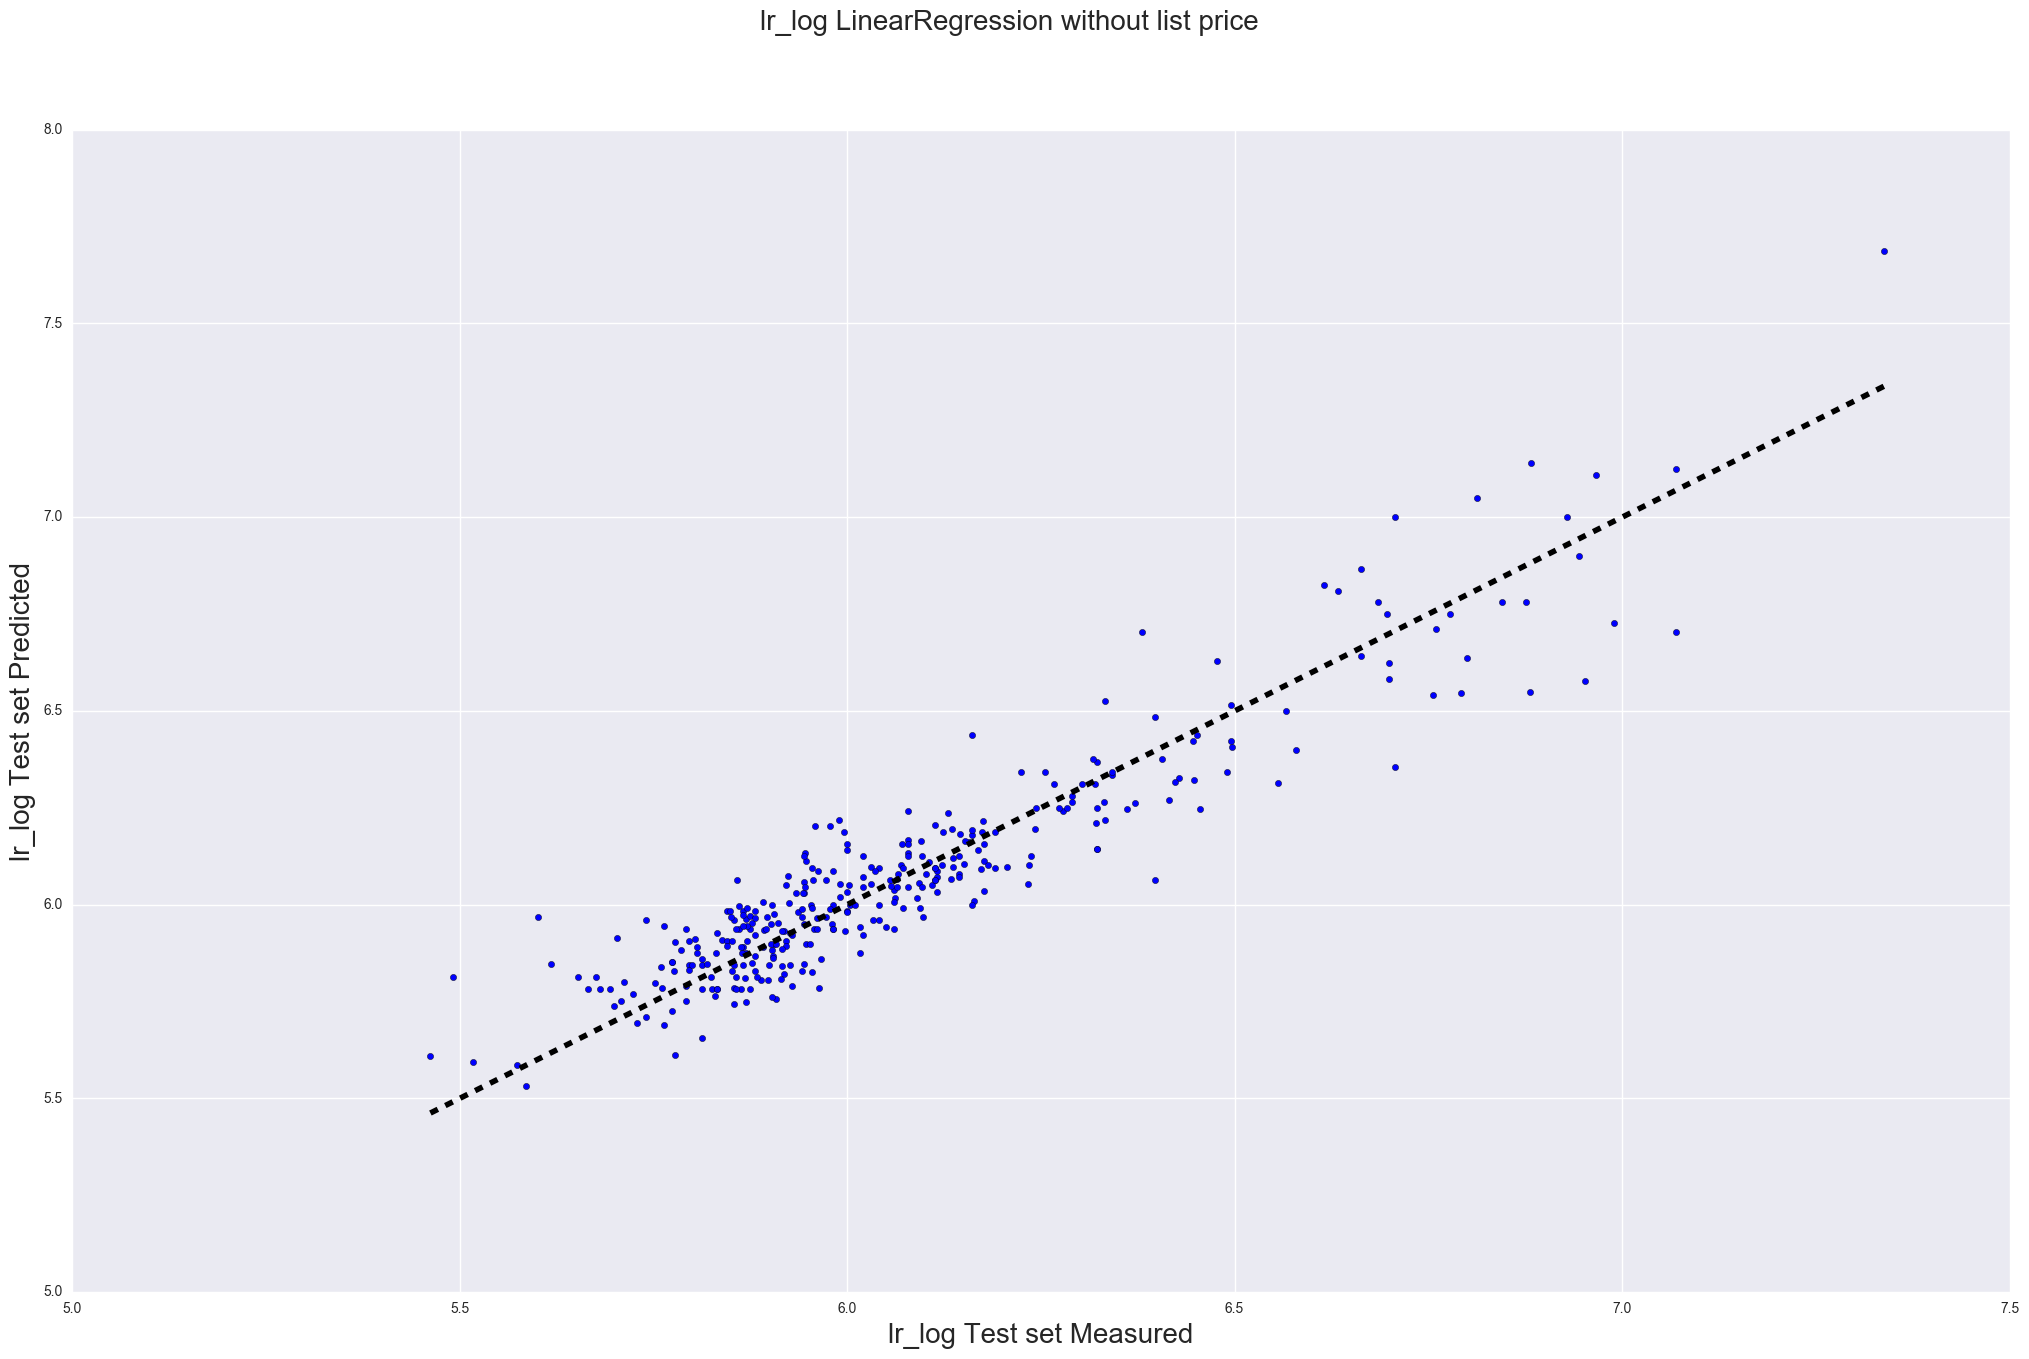

In [244]:
print('lr_log Test Variance score: %.2f' % lr_log.score(X_test, y_test_log))

# Train
predicted_test_log = cross_val_predict(lr_log, X_test, y_test_log, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('lr_log LinearRegression without list price', fontsize=20)
ax.scatter(y_test_log, predicted_test_log)
ax.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=4)
ax.set_xlabel('lr_log Test set Measured', fontsize=20)
ax.set_ylabel('lr_log Test set Predicted', fontsize=20)
plt.show()

In [245]:
print 'Date        Square-Foot     Sale-price    Predicted price '
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', np.power(10, y_test_log[i]), '     ', np.power(10, predicted_test_log[i]).round(2)

Date        Square-Foot     Sale-price    Predicted price 
2016-08-16       700       917500.0       1218814.18
2016-08-16       1312       850000.0       615265.41
2016-08-16       760       670000.0       604296.39
2016-08-16       1050       980000.0       1134194.4
2016-08-16       4617       9750000.0       5327978.95
2016-08-17       1140       1100000.0       1000000.0
2016-08-17       1210       1050000.0       835362.55
2016-08-17       1000       775000.0       637804.38
2016-08-17       550       699000.0       964661.62
2016-08-17       527       385000.0       339820.83
2016-08-17       975       790000.0       637804.38
2016-08-18       1290       755000.0       897687.13
2016-08-18       1841       1850000.0       2053525.03
2016-08-18       460       760000.0       835362.55
2016-08-18       1350       1475000.0       1382372.23
2016-08-19       1382       1450000.0       2738419.63
2016-08-19       825       595000.0       532797.89
2016-08-19       1394       805000.0

In [246]:
print 'Date        Sale price  Pred. with list p    W/o list p     W - W/o diff'
for i in xrange(30):
    print df_sold.index[4000+i].date(), '    ', df_sold.sale_price[4000+i], '    ', np.around(np.power(10, linreg3.fittedvalues[4000+i]), decimals = 2), '     ', np.around(np.power(10, linreg4.fittedvalues[4000+i]), decimals = 2), '    ',np.around(np.power(10,linreg3.fittedvalues[4000+i])-np.power(10,linreg4.fittedvalues[4000+i]), decimals = 2)

Date        Sale price  Pred. with list p    W/o list p     W - W/o diff
2016-08-16      917500      1025959.83       1193233.28      -167273.44
2016-08-16      850000      834018.92       680554.19      153464.73
2016-08-16      670000      653762.02       626866.74      26895.29
2016-08-16      980000      1040460.76       1322391.78      -281931.02
2016-08-16      9750000      9770958.09       6157536.68      3613421.42
2016-08-17      1100000      1065411.54       1314364.55      -248953.01
2016-08-17      1050000      1136881.33       932981.43      203899.9
2016-08-17      775000      806083.35       638109.24      167974.12
2016-08-17      699000      802734.47       1105665.1      -302930.62
2016-08-17      385000      366568.29       356501.1      10067.19
2016-08-17      790000      726309.25       646598.11      79711.14
2016-08-18      755000      726028.55       858409.46      -132380.9
2016-08-18      1850000      1846804.93       1827720.88      19084.05
2016-08-18      

In [247]:
X_sold.head(3)

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,single_f_h,condo,dist_no,sold_year,...,North Waterfront,Outer Mission,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,2,2.0,1,1456,565.00,38,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,2,1.5,0,744,556.00,8,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0
2013-11-12,1,1.0,1,700,511.14,35,0,1,8,2013,...,0,0,0,0,0,0,0,0,0,0


In [248]:
X_sold.columns

Index([               u'bedroom',                   u'bath',
                      u'parking',                   u'sqft',
                 u'home_own_ass',          u'day_on_market',
                   u'single_f_h',                  u'condo',
                      u'dist_no',              u'sold_year',
                   u'sold_month',      u'Bayview Heights  ',
                    u'Bayview  ',    u'Candlestick Point  ',
                 u'Cow Hollow  ',       u'Crocker Amazon  ',
                   u'Downtown  ',            u'Excelsior  ',
         u'Financial District  ',        u'Hunters Point  ',
           u'Little Hollywood  ',               u'Marina  ',
            u'Mission Terrace  ',             u'Nob Hill  ',
                u'North Beach  ',     u'North Waterfront  ',
              u'Outer Mission  ',      u'Pacific Heights  ',
                    u'Portola  ',     u'Presidio Heights  ',
               u'Russian Hill  ',       u'Silver Terrace  ',
             u'Telegraph

In [249]:
y_sold.head()

sold
2013-11-12    1130000
2013-11-12     595000
2013-11-12     610000
2013-11-13    3850000
2013-11-13     665000
Name: sale_price, dtype: int64

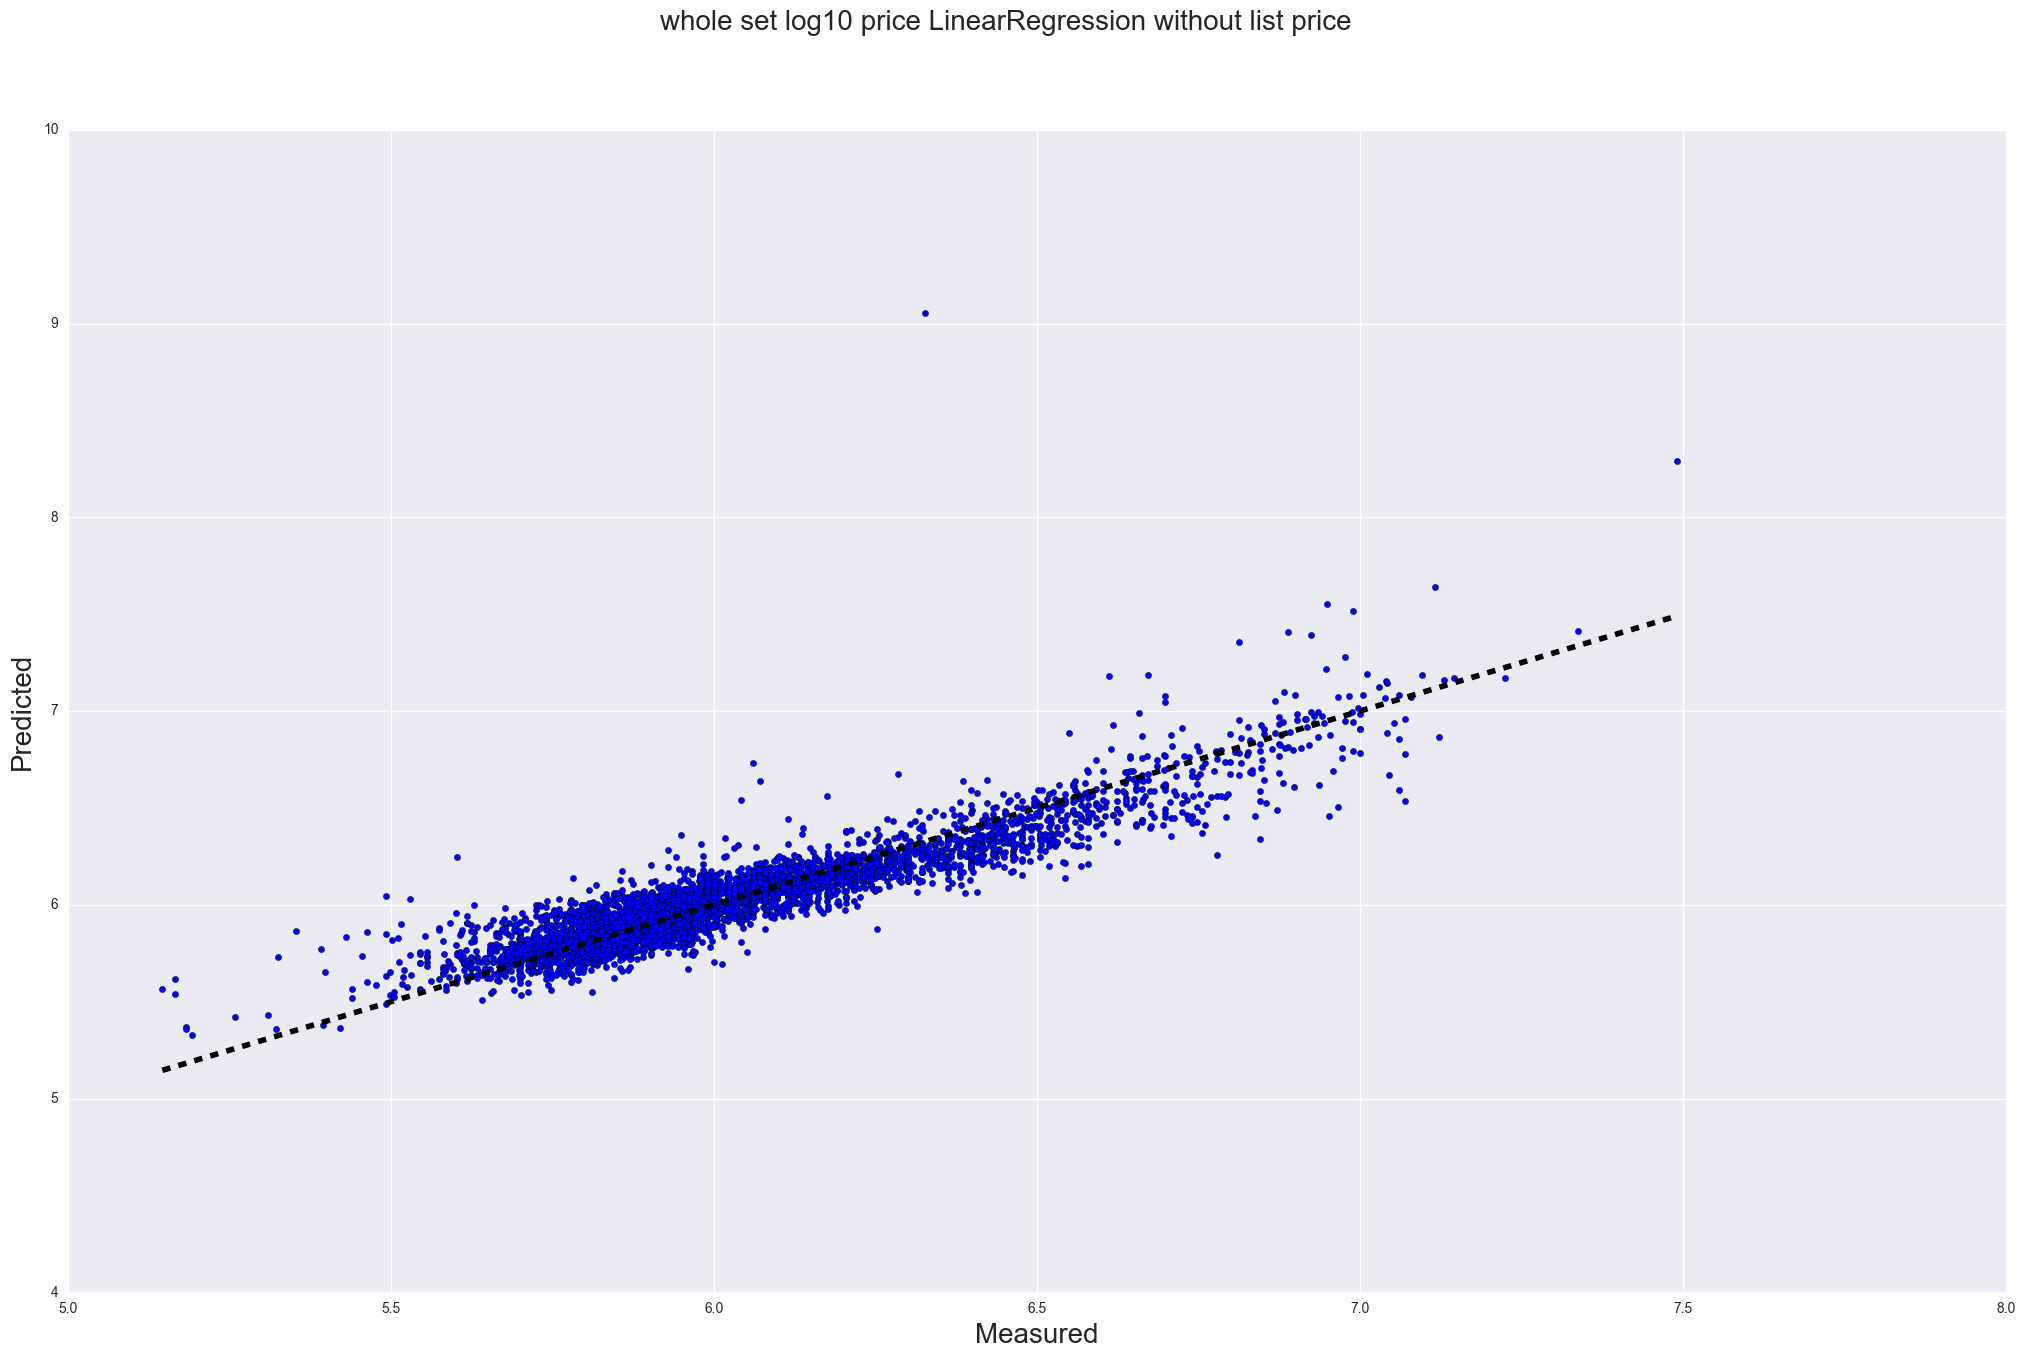

lr_log_all All Variance score: 0.86


In [250]:
y_sold_log = np.log10(y_sold)

lr_log_all= linear_model.LinearRegression(normalize = True)
lr_log_all.fit(X_sold, y_sold_log)
predicted_all_log = cross_val_predict(lr_log_all, X_sold, y_sold_log, cv=10)

fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle('whole set log10 price LinearRegression without list price', fontsize=20)
ax.scatter(y_sold_log, predicted_all_log)
ax.plot([y_sold_log.min(), y_sold_log.max()], [y_sold_log.min(), y_sold_log.max()], 'k--', lw=4)
ax.set_xlabel('Measured', fontsize=20)
ax.set_ylabel('Predicted', fontsize=20)
plt.show()

print('lr_log_all All Variance score: %.2f' % lr_log_all.score(X_sold, y_sold_log))

In [251]:
print np.power(10, y_test_log[0]), np.power(10, y_sold_log[4000])

917500.0 917500.0


In [252]:
print 'Date        Square-Foot     Sale-price    Predicted price '
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', np.power(10, y_test_log[i]), '     ', np.power(10, predicted_all_log[4000+i]).round(2)

Date        Square-Foot     Sale-price    Predicted price 
2016-08-16       700       917500.0       1214198.11
2016-08-16       1312       850000.0       690610.85
2016-08-16       760       670000.0       636282.39
2016-08-16       1050       980000.0       1351824.8
2016-08-16       4617       9750000.0       6199524.75
2016-08-17       1140       1100000.0       1348978.05
2016-08-17       1210       1050000.0       949062.74
2016-08-17       1000       775000.0       642211.71
2016-08-17       550       699000.0       1129898.81
2016-08-17       527       385000.0       362719.01
2016-08-17       975       790000.0       654696.53
2016-08-18       1290       755000.0       867913.74
2016-08-18       1841       1850000.0       1850691.3
2016-08-18       460       760000.0       983691.43
2016-08-18       1350       1475000.0       1605337.71
2016-08-19       1382       1450000.0       1536683.66
2016-08-19       825       595000.0       536102.76
2016-08-19       1394       805000.

In [253]:
print 'Date        Square-Foot     Sale-price    Predicted price '
for i in xrange(30):
    print X_test.index[i].date(),'     ', X_test.sqft[i],'     ', np.power(10, y_test_log[i]), '     ', np.power(10, predicted_test_log[i]).round(2)


Date        Square-Foot     Sale-price    Predicted price 
2016-08-16       700       917500.0       1218814.18
2016-08-16       1312       850000.0       615265.41
2016-08-16       760       670000.0       604296.39
2016-08-16       1050       980000.0       1134194.4
2016-08-16       4617       9750000.0       5327978.95
2016-08-17       1140       1100000.0       1000000.0
2016-08-17       1210       1050000.0       835362.55
2016-08-17       1000       775000.0       637804.38
2016-08-17       550       699000.0       964661.62
2016-08-17       527       385000.0       339820.83
2016-08-17       975       790000.0       637804.38
2016-08-18       1290       755000.0       897687.13
2016-08-18       1841       1850000.0       2053525.03
2016-08-18       460       760000.0       835362.55
2016-08-18       1350       1475000.0       1382372.23
2016-08-19       1382       1450000.0       2738419.63
2016-08-19       825       595000.0       532797.89
2016-08-19       1394       805000.0

In [254]:
df.head(1)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
0,2701 Broadway St,Pacific Heights,7,7.0,2,16400,1890.243902,2015-05-15,0.0,100,39000000,31000000,79.487179,1,0,7,2015,5


In [260]:
resids = linreg4.outlier_test()['student_resid']

In [261]:
resids.shape

(4339,)

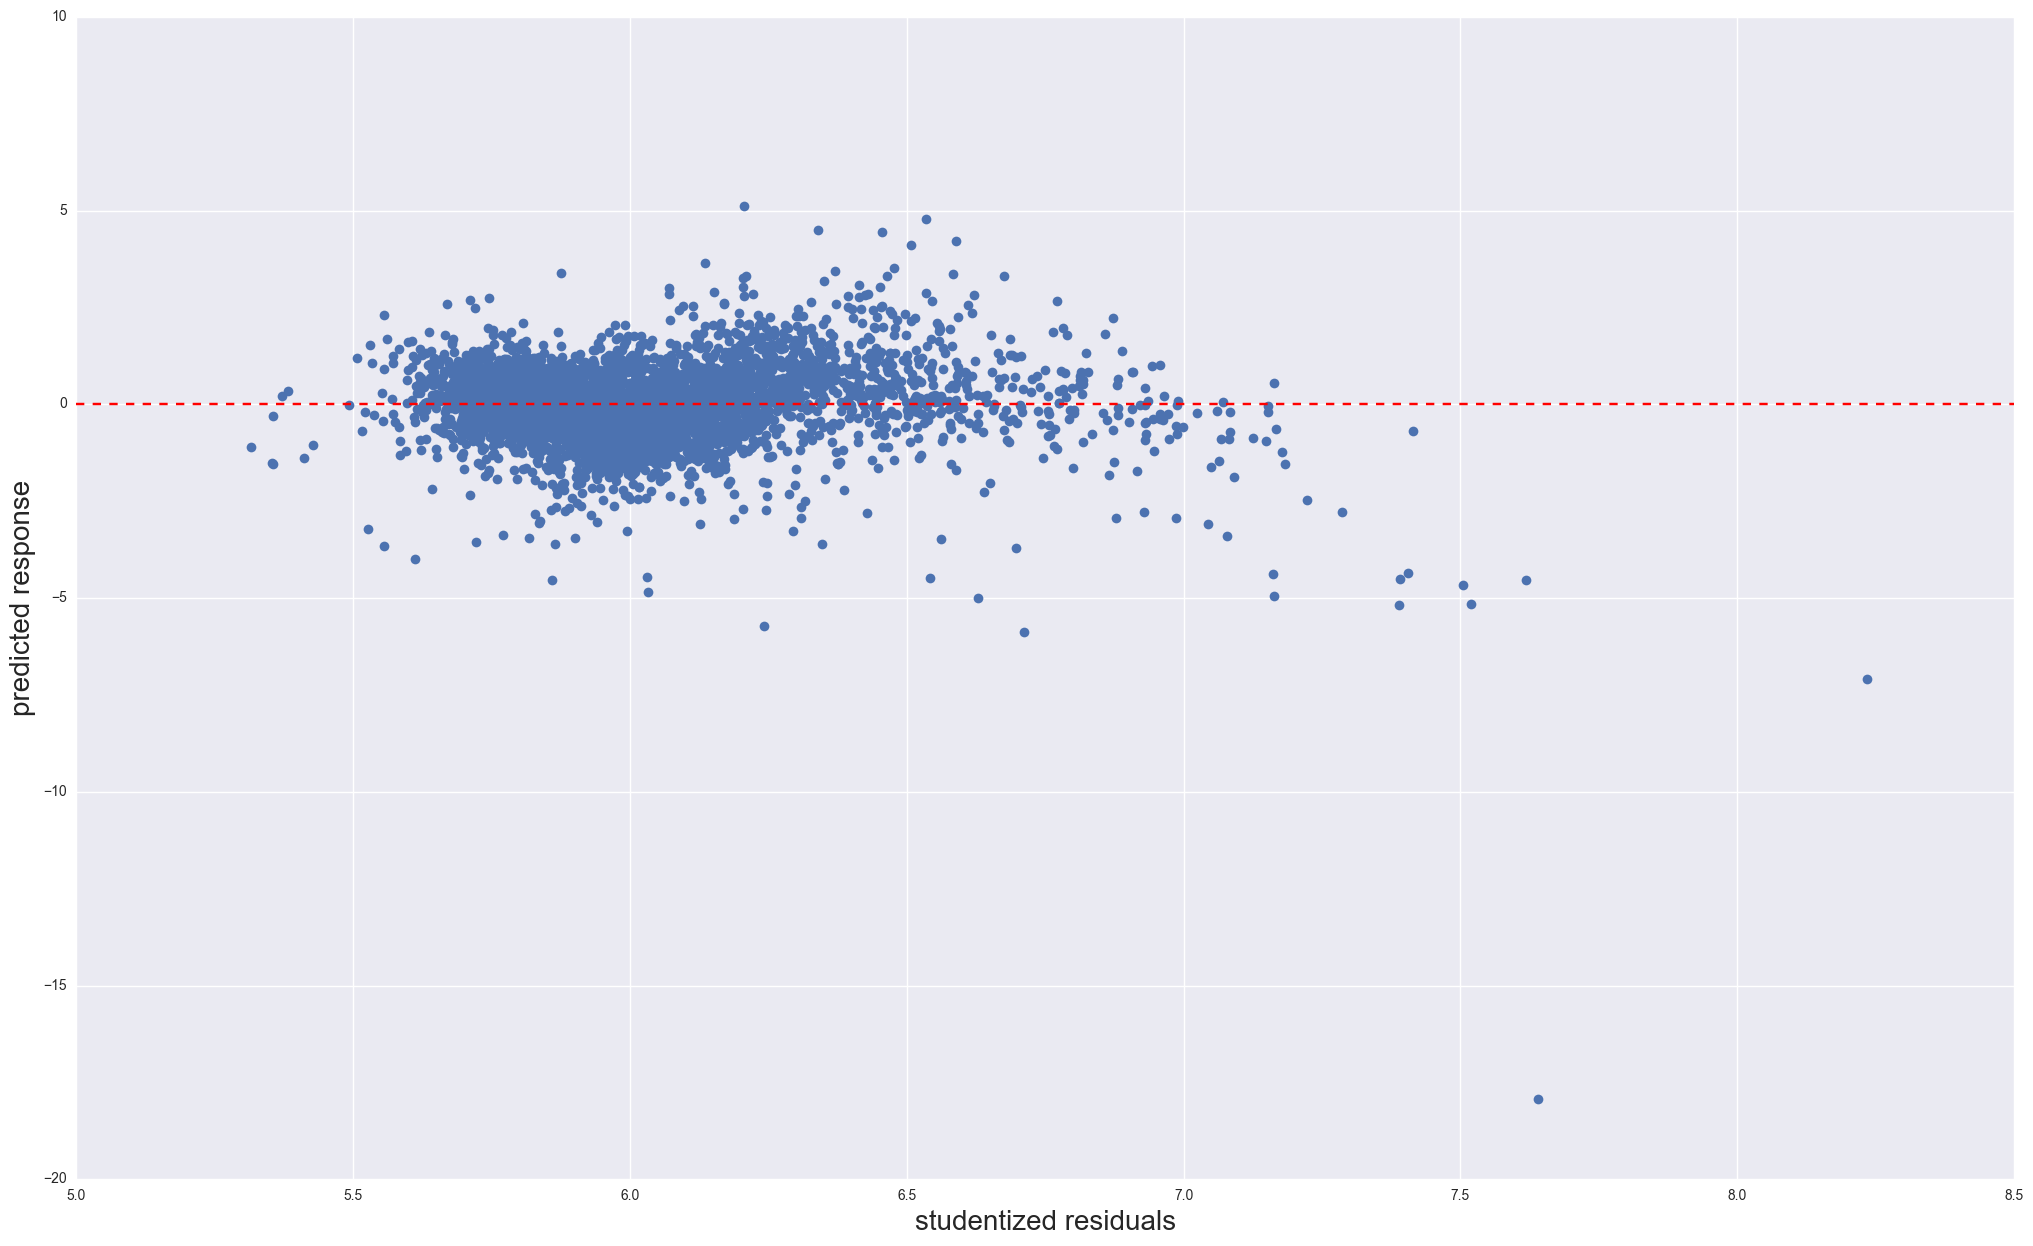

In [262]:
fig = plt.figure(figsize=(25,15))
plt.plot(linreg4.fittedvalues, resids, 'o')
plt.xlabel('studentized residuals', fontsize=20)
plt.ylabel('predicted response', fontsize=20)
plt.axhline(0, c='r', linestyle = '--')

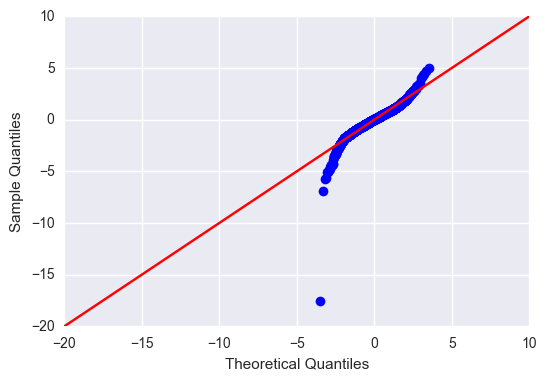

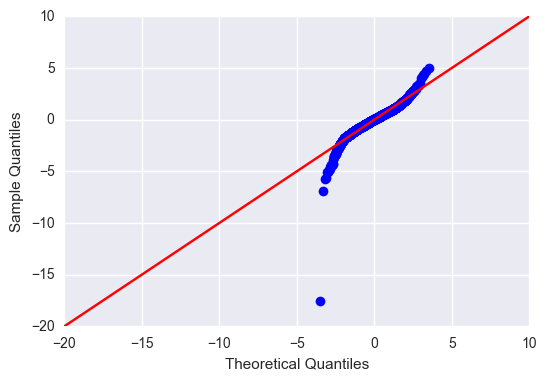

In [263]:
sm.graphics.qqplot(resids, line='45', fit=True)

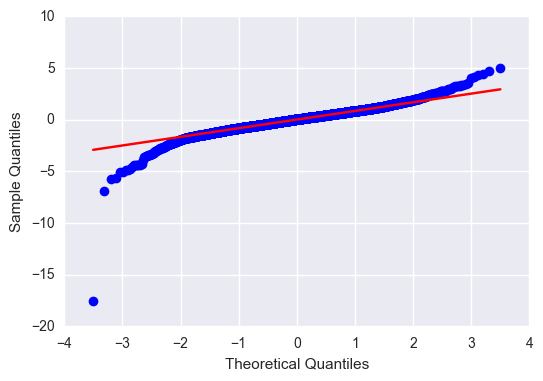

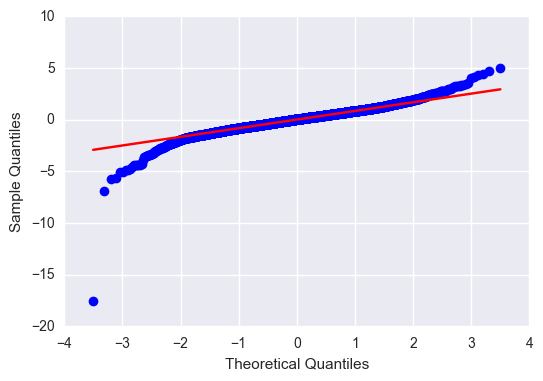

In [264]:
sm.graphics.qqplot(resids, line='q', fit=True)

In [265]:
from statsmodels.graphics import regressionplots as smg

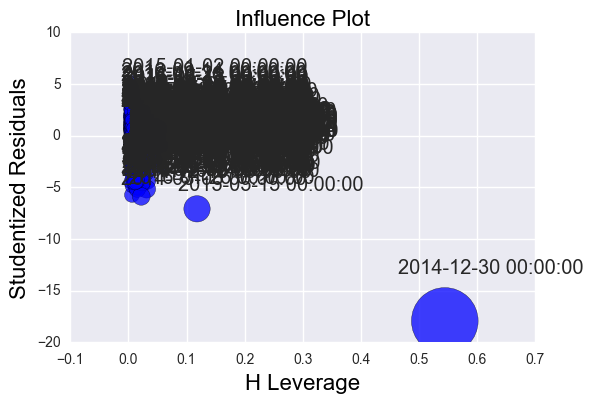

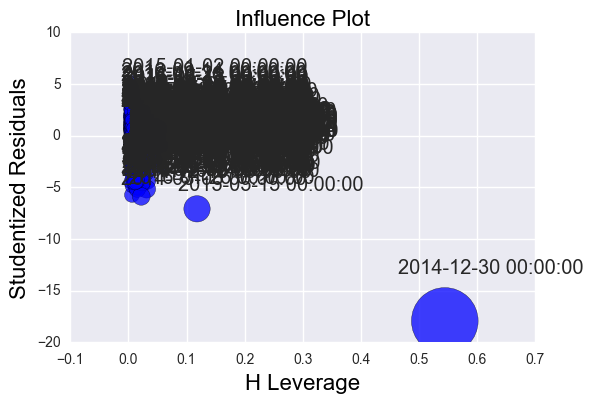

In [266]:
smg.influence_plot(linreg4)


In [164]:
df_sold.loc['2014-12-30']

,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2014-12-30,666 Post St #1601,Downtown,1,1.0,0,590,889.830508,445.41,32,525000,525000,100.000000,0,1,8,2014,12
2014-12-30,1037 Vallejo St,Russian Hill,3,2.5,2,2590,1563.706564,2867.68,80,4190000,4050000,96.658711,0,1,8,2014,12
2014-12-30,120 Wetmore St #5,Nob Hill,2,2.0,1,1219,902.378999,568.26,15,980000,1100000,112.244898,0,1,8,2014,12
2014-12-30,260 Niagara Ave,Outer Mission,2,1.0,3,1125,715.555556,0.00,0,749000,805000,107.476636,1,0,10,2014,12
2014-12-30,2179 Pacific Ave,Pacific Heights,4,2.5,1,2775,906.306306,600.00,87,2775000,2515000,90.630631,0,1,7,2014,12
2014-12-30,85 Casa Way,Marina,3,3.5,2,2550,984.313725,0.00,0,2500000,2510000,100.400000,1,0,7,2014,12
2014-12-30,1726 Keith St,Bayview,4,2.0,1,1495,468.227425,0.00,46,668000,700000,104.790419,1,0,10,2014,12
2014-12-30,1388 Gough St #703,Van Ness/Civic Cente,2,2.0,1,1192,868.288591,915.31,29,990000,1035000,104.545455,0,1,8,2014,12
2014-12-30,690 Market St #2101,Financial District,2,2.0,1,1515,1402.640264,31356.77,0,2195000,2125000,96.810934,0,1,8,2014,12


In [166]:
df_sold.loc['2016-07-14']

,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2016-07-14,1422 Palou Ave,Bayview,2,1.0,2,1200,608.333333,0.00,28,599000,730000,121.869783,1,0,10,2016,7
2016-07-14,3800-3810 Washington St,Presidio Heights,14,11.0,5,20516,767.693508,0.00,442,17995000,15750000,87.524312,1,0,7,2016,7
2016-07-14,1001 Pine St #503,Downtown,1,1.0,1,650,946.153846,488.15,14,595000,615000,103.361345,0,1,8,2016,7


In [137]:
X_sold.head()

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,list_price,single_f_h,condo,dist_no,...,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley,sin_month,cos_month
sold,,,,,,,,,,,,,,,,,,,,,
2013-11-12,2,2.0,1,1456,565.00,38,1195000,0,1,8,...,0,0,0,0,0,0,0,0,-0.5,0.866025
2013-11-12,1,1.0,1,700,511.14,35,599000,0,1,8,...,0,0,0,0,0,0,0,0,-0.5,0.866025
2013-11-12,2,1.5,0,744,556.00,8,500000,0,1,8,...,0,0,0,0,0,0,0,0,-0.5,0.866025
2013-11-13,2,1.5,1,1277,0.00,85,1299888,0,1,7,...,0,0,0,0,0,0,0,0,-0.5,0.866025
2013-11-13,1,1.0,1,605,434.75,22,589000,0,1,8,...,0,0,0,0,0,0,0,0,-0.5,0.866025


In [138]:
X_sold.columns

Index([               u'bedroom',                   u'bath',
                      u'parking',                   u'sqft',
                 u'home_own_ass',          u'day_on_market',
                   u'list_price',             u'single_f_h',
                        u'condo',                u'dist_no',
                    u'sold_year',      u'Bayview Heights  ',
                    u'Bayview  ',    u'Candlestick Point  ',
                 u'Cow Hollow  ',       u'Crocker Amazon  ',
                   u'Downtown  ',            u'Excelsior  ',
       u'Financial District/B  ',        u'Hunters Point  ',
           u'Little Hollywood  ',               u'Marina  ',
            u'Mission Terrace  ',             u'Nob Hill  ',
                u'North Beach  ',     u'North Waterfront  ',
              u'Outer Mission  ',      u'Pacific Heights  ',
                    u'Portola  ',     u'Presidio Heights  ',
               u'Russian Hill  ',       u'Silver Terrace  ',
             u'Telegraph

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_sold, y_sold, test_size=0.4, random_state=0)

In [147]:
X_train.shape

(2604, 37)

In [148]:
X_test.shape

(1736, 37)

In [149]:
y_train.shape

(2604,)

In [150]:
y_test.shape

(1736,)

In [151]:
lr1 = linear_model.LinearRegression()

In [152]:
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [ ]:
#print clf.score(X_test, y_test)  

In [ ]:
#clf[0]

In [ ]:
#type(clf)

In [ ]:
#from sklearn.svm import SVC

In [ ]:
#np.log(df_sold.sale_price)


In [155]:
print('Coefficients: \n', lr1.coef_)

('Coefficients: \n', array([ -3.83884834e+03,   7.13008741e+04,   3.11747317e+04,
         2.35837989e+01,   2.02927010e+01,  -2.38186813e+03,
         8.34750527e-01,   9.81987962e+04,  -9.81987962e+04,
        -1.00021982e+05,   1.51510132e+04,   1.16693171e+04,
        -1.71588632e+04,   8.82084650e+04,  -1.78826785e+04,
        -2.09880068e+04,  -3.84745289e+04,  -1.99000404e+04,
        -1.27817884e+04,   7.22996908e+04,   1.27589692e+04,
        -4.19426975e+04,   1.91653104e+04,   2.72472414e+04,
        -1.61092956e+04,  -5.60105111e+04,  -3.33650212e+04,
         1.82750065e+04,  -3.90454205e+04,   9.97636649e+04,
         1.08446326e+05,  -2.50202272e+04,  -1.66290132e+04,
        -3.29973821e+04,  -6.95285167e+04,   7.56154807e+03,
        -7.78807436e+03]))


In [156]:
print("Mean squared error: %.2f"
      % np.mean((lr1.predict(X_test) - y_test) ** 2))

Mean squared error: 56578297781.02


In [93]:
np.power(10, np.power(10, 0.76))

568066.75446238264

In [94]:
np.power(10, np.power(10, 0.78))

1060708.0399892735

In [95]:
np.power(10, np.power(10, 0.78))-np.power(10, np.power(10, 0.76))

492641.28552689089

In [157]:
print('Variance score: %.2f' % lr1.score(X_test, y_test))

Variance score: 0.98


In [159]:
predicted = cross_val_predict(lr1, X_train, y_train, cv=10)

In [161]:
y_train.shape

(2604,)

In [162]:
predicted.shape

(2604,)

In [163]:
y_test.shape

(1736,)

In [165]:
X_test.head()

,bedroom,bath,parking,sqft,home_own_ass,day_on_market,list_price,single_f_h,condo,dist_no,...,Pacific Heights,Portola,Presidio Heights,Russian Hill,Silver Terrace,Telegraph Hill,Van Ness/Civic Cente,Visitacion Valley,sin_month,cos_month
sold,,,,,,,,,,,,,,,,,,,,,
2015-04-02,2,1.0,1,1050,0.00,33,699000,1,0,10,...,0,1,0,0,0,0,0,0,0.866025,-0.500000
2014-07-21,2,2.0,4,1245,0.00,11,249000,1,0,10,...,0,0,0,0,0,0,0,0,-0.500000,-0.866025
2014-10-21,1,1.0,1,1115,564.49,11,995000,0,1,7,...,1,0,0,0,0,0,0,0,-0.866025,0.500000
2014-04-01,2,1.0,1,750,194.00,24,139500,0,1,10,...,0,0,0,0,0,0,0,0,0.866025,-0.500000
2015-08-04,3,2.5,1,1980,230.54,0,1849000,0,1,8,...,0,0,0,0,0,0,0,0,-0.866025,-0.500000


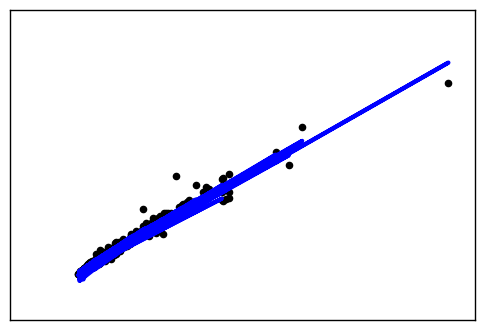

In [168]:
plt.scatter(X_test.list_price, y_test,  color='black')
plt.plot(X_test.list_price, lr1.predict(X_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

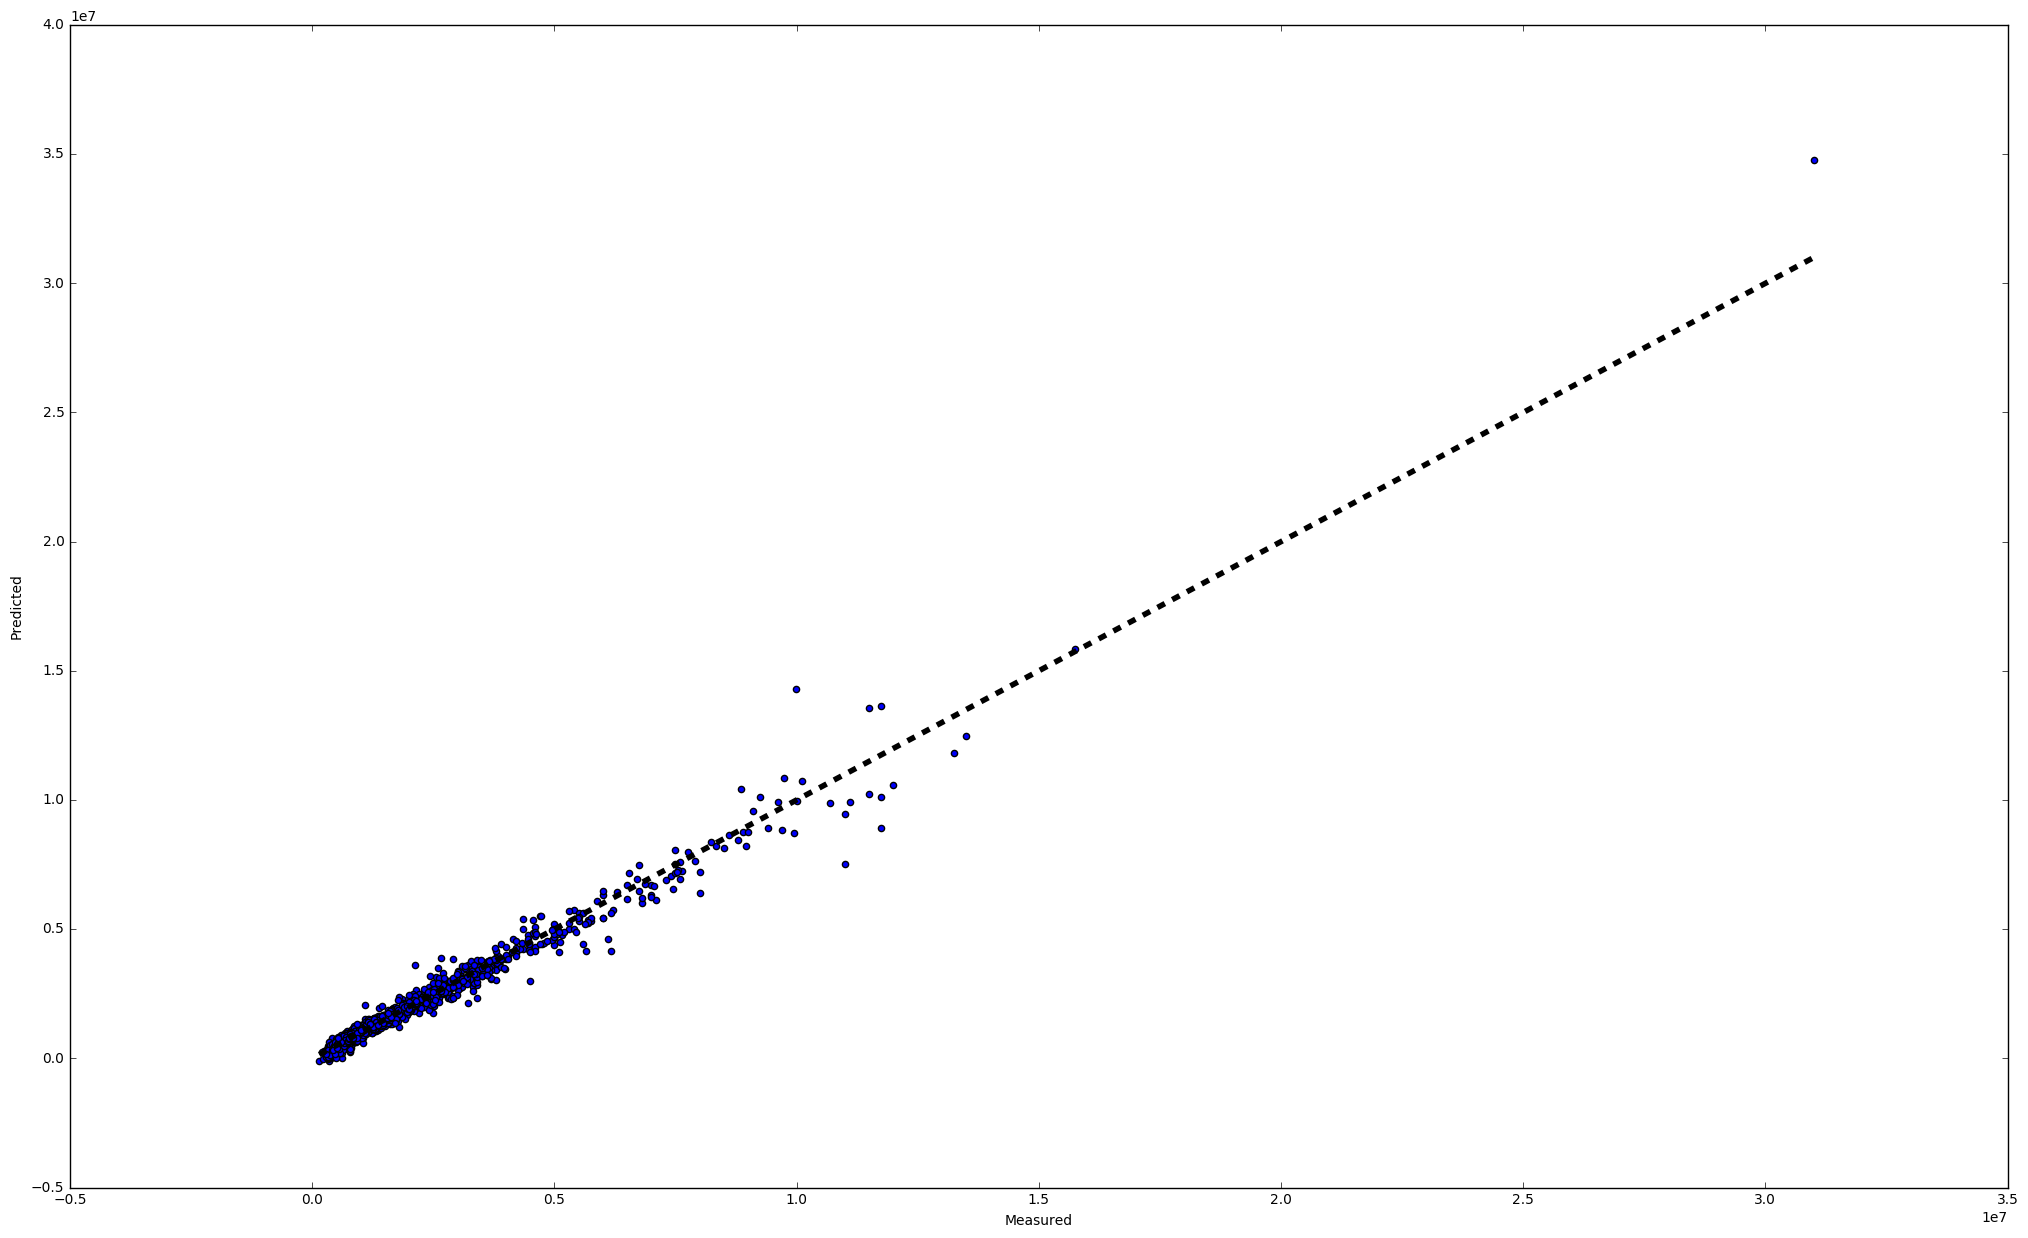

In [169]:
fig, ax = plt.subplots(figsize=(25,15))
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

NameError: name 'y_test' is not defined